# GETTING THE DATA READY 
I have used excel to manipulate the data into a valuable set theta i would use. Using the FactInternetSales datasets I broke it down into a suitable sustainable form.

###  CustomerKey
The customer key gives us a leeway into the DimCustomer table. from here we get 29 columns but not all will be of interest for this aanlysis. we used the VLOOKUP function in excel to get the exact geography key for every custommer based on the customerkey. The CustomerAlternateKey	Title	FirstName	MiddleName	LastName	NameStyle columns re not that necesary for this analysis incomparison to the content they store. we have an interest in sales  and everything feasible about the sales and customers. The birthdate will be important in geting the customers age rane and understand the buying patterns of different agegroups. Gender is also important in understanding what goods are common among diferent genders. Email adress are not necesary for analysis. YearlyIncome	TotalChildren	NumberChildrenAtHome are all important to understand customers buying the specific goods and know how the number of children will affect the buuying patterns and what they will buy.EnglishEducation will help us understanding the buying behavour based on the level of education. HouseOwnerFlag	NumberCarsOwned CommuteDistance are also eseantial in this analysis as they will prob further understandingt he buying pattersn based on cars owned and if the disytance has a significant affect on buying behavior. from the DimCustomer table we  will only pick thee mentioned tables.

###  ProductKey
the Product key gives as an insight into the dimProduct data. from this data we only get the actual products name so that we can have an exact product names instead of product keys. in this we also use the VLOOKUP function to get the ecact key along with its name onto the FactinternetSales data.

### DimProductSubcategoryKey
This gives us the leeway to  DimProductSubcategory dataset where we get the subcategory names of each datasset into our datset.

###   DimSalesTerritoryKey

DimSalesTerritoryKey allows for the matching of data in the DimSalesTerritory data and get the Teritory names for each teritory location.

###     geography key
this key points us to DimGeography where we  get cityy country and locations in general of the customers.

###   CurrencyKey

DimCurrency is directe related to this key where we get curency name used instead of  having the curency keys.

     -  **these are the datasets chosen with their respective columns. these tables are merged into the FactinternetSales data table**

###   SalesTerritoryKey
this column helps in getting the sales by teritory for the sakes agenst and also get the targets set fro them in the  FactSalesTargets dataset. 

###   TABLES NOT CHOSEM
    - DimAccount helps in understanding the account types for customers which is not a point of interest in this analysis. 
    - DimDate is dates stored with weekid and names of the weeks which can still be imported from python without the need of the table being added into the dataset.
    - DimDepartmentGroup  is the departmental grouping of thedepartments in the  DimOrganization ddata.
    - DimPromotion DimReseller DimSalesReason DimScenario FactCallCenter FactCurrencyRate FactFinance 

Examining the summary statistics for the selected columns from the merged 'Geography' and 'DimCustomer' tables, I find insightful details about various customer attributes. Beginning with 'YearlyIncome,' the dataset encompasses 18,484 entries, reflecting a diverse range of annual incomes. The average yearly income stands at approximately $57,305.78, with a notable standard deviation of $32,285.84, indicating considerable variability in income levels.

Moving on to family-related attributes, 'TotalChildren' showcases an average of 1.84 children per customer, while 'NumberChildrenAtHome' indicates an average of about 1.00 child residing at home. Both metrics exhibit some degree of variability, with customers having up to 5 children. 'HouseOwnerFlag' reveals that, on average, about 68% of customers own a house, with a minimum value of 0 indicating non-homeownership for some individuals.

Considering lifestyle indicators, 'NumberCarsOwned' illustrates that customers own an average of 1.50 cars, with some not owning any and others having up to 4 cars. Lastly, 'SalesTerritoryKey' provides insights into the distribution of sales territory keys, with an average of approximately 5.90. These metrics, each offering unique perspectives on customer characteristics, collectively contribute to a comprehensive understanding of the merged dataset, excluding 'GeographyKey' and 'CustomerKey' columns.

In [1]:
from pyspark.sql import SparkSession
import os

# Initialize a Spark session
spark = SparkSession.builder.appName("CSVLoader").getOrCreate()

# Path to the folder containing CSV files
folder_path = r'C:\Users\neste\OneDrive\Desktop\karanja\DataSet_final\DataSet_final'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Create variables for each DataFrame
for csv_file in csv_files:
    # Use the file name (without extension) as the variable name
    df_name = os.path.splitext(csv_file)[0]
    # Read the CSV file into a DataFrame
    globals()[df_name] = spark.read.csv(os.path.join(folder_path, csv_file), header=True, inferSchema=True)

# Show the contents of each DataFrame
DimGeography.show()
DimAccount.show()
DimCurrency.show()
DimCustomer.show()
DimDate.show()
DimDepartmentGroup.show()
DimOrganization.show()
DimProduct.show()
DimProductCategory.show()
DimProductSubcategory.show()
DimPromotion.show()
DimReseller.show()
DimSalesReason.show()
DimSalesTerritory.show()
DimScenario.show()
FactCallCenter.show()
FactCurrencyRate.show()
FactInternetSales.show()



+------------+--------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|GeographyKey|          City|StateProvinceCode|StateProvinceName|CountryRegionCode|EnglishCountryRegionName|SpanishCountryRegionName|FrenchCountryRegionName|PostalCode|SalesTerritoryKey|IpAddressLocator|
+------------+--------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|           1|    Alexandria|              NSW|  New South Wales|               AU|               Australia|               Australia|              Australie|      2015|                9|    198.51.100.2|
|           2| Coffs Harbour|              NSW|  New South Wales|               AU|               Australia|               Australia|              Australie|      2450|                

# data cleaning 

here we merge the dataset into a suitable one first we get product name from the dimproduct table into the factinternetsales

from dimCustomer we get the followin columns uning the CustomerKey. GeographyKey | BirthDate MaritalStatus Gender TotalChildren NumberChildrenAtHome   EnglishEducation HouseOwnerFlag NumberCarsOwned

fromthe DimPromotion we get the EnglishPromotionName into the df.

from the dimCurency we get the CurrencyKey column whhich helps us to get the Curency names from the dimCurency table.

from dim salesTertoy we use the saleyterirorykey to join SalesTerritoryRegion	SalesTerritoryCountry	SalesTerritoryGroup columns to the df. thee following columns are droped ["GeographyKey", "SalesTerritoryKey", "CurrencyKey", "PromotionKey", "CustomerKey", "ProductKey", "OrderDateKey", "DueDateKey", "ShipDateKey", "SalesOrderNumber", "CarrierTrackingNumber", "CustomerPONumber", "OrderDate", "DueDate", "ShipDate"]

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import concat_ws, substring
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_unixtime, unix_timestamp, date_format, year, month, dayofweek
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_unixtime, unix_timestamp, year, month, dayofweek, datediff, lit

# Select only the necessary columns from DimProduct
DimProductSubset = DimProduct.select("ProductKey", "EnglishProductName")

# Perform the join based on the ProductKey column
joined_df = FactInternetSales.join(DimProductSubset, "ProductKey", "inner")


# Select only the necessary columns from DimCustomer
DimCustomerSubset = DimCustomer.select("CustomerKey", "GeographyKey", "BirthDate", "MaritalStatus",
                                       "Gender", "TotalChildren", "NumberChildrenAtHome","CommuteDistance",
                                       "EnglishEducation", "HouseOwnerFlag", "NumberCarsOwned")

# Perform the join based on the CustomerKey column and overwrite joined_df
joined_df = joined_df.join(DimCustomerSubset, "CustomerKey", "inner")
# Select only the necessary columns from DimPromotion
DimPromotionSubset = DimPromotion.select("PromotionKey", "EnglishPromotionName")

# Perform the join with DimPromotion based on the PromotionKey column
joined_df = joined_df.join(DimPromotionSubset, "PromotionKey", "inner")

# Select only the necessary columns from DimCurrency
DimCurrencySubset = DimCurrency.select("CurrencyKey", "CurrencyName")

# Perform the join with DimCurrency based on the CurrencyKey column
joined_df = joined_df.join(DimCurrencySubset, "CurrencyKey", "inner")


# Select only the necessary columns from DimSalesTerritory
DimSalesTerritorySubset = DimSalesTerritory.select("SalesTerritoryKey", "SalesTerritoryRegion", 
                                                   "SalesTerritoryCountry", "SalesTerritoryGroup")

# Perform the join with DimSalesTerritory based on the SalesTerritoryKey column
joined_df = joined_df.join(DimSalesTerritorySubset, "SalesTerritoryKey", "inner")
# Select only the necessary columns from DimGeography
DimGeographySubset = DimGeography.select("GeographyKey", "StateProvinceName", 
                                         "EnglishCountryRegionName", "City")

# Perform the join with DimGeography based on the GeographyKey column
joined_df = joined_df.join(DimGeographySubset, "GeographyKey", "inner")

# Add a "/" after the first four digits and the next two digits in OrderDateKey
joined_df = joined_df.withColumn("OrderDateKey", 
                                 concat_ws("/", 
                                            substring("OrderDateKey", 1, 4),
                                            substring("OrderDateKey", 5, 2),
                                            substring("OrderDateKey", 7, 2)))

# Convert OrderDateKey to a timestamp column
joined_df = joined_df.withColumn("OrderDate", 
                                 from_unixtime(unix_timestamp(joined_df["OrderDateKey"], "yyyy/MM/dd")))

# Extract year, month, and day of week from OrderDate
joined_df = joined_df.withColumn("OrderYear", year("OrderDate"))
joined_df = joined_df.withColumn("OrderMonth", month("OrderDate"))
joined_df = joined_df.withColumn("DayOfWeek", dayofweek("OrderDate"))

# Convert BirthDate to a timestamp column
joined_df = joined_df.withColumn("BirthDate", 
                                 from_unixtime(unix_timestamp(joined_df["BirthDate"], "yyyy-MM-dd")))

# Extract year, month, and day of week from BirthDate
joined_df = joined_df.withColumn("BirthYear", year("BirthDate"))
joined_df = joined_df.withColumn("BirthMonth", month("BirthDate"))
joined_df = joined_df.withColumn("BirthDayOfWeek", dayofweek("BirthDate"))

# Calculate age at the year 2014
current_year = 2014
joined_df = joined_df.withColumn("Age", lit(current_year) - year("BirthDate"))

# Drop the original BirthDate column if needed
joined_df = joined_df.drop("BirthDate")


# Drop specified columns
columns_to_drop = ["GeographyKey", "SalesTerritoryKey", "CurrencyKey", "PromotionKey", 
                    "CustomerKey", "ProductKey", "OrderDateKey", "DueDateKey", "ShipDateKey", 
                    "SalesOrderNumber", "CarrierTrackingNumber", "CustomerPONumber", 
                    "OrderDate", "DueDate", "ShipDate","SalesOrderLineNumber","RevisionNumber","OrderQuantity"]

joined_df = joined_df.drop(*columns_to_drop)

# Show the result
joined_df.show()

+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+--------------------+-------------+------+-------------+--------------------+---------------+-------------------+--------------+---------------+--------------------+--------------------+--------------------+---------------------+-------------------+-------------------+------------------------+-------------+---------+----------+---------+---------+----------+--------------+----+
|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|  EnglishProductName|MaritalStatus|Gender|TotalChildren|NumberChildrenAtHome|CommuteDistance|   EnglishEducation|HouseOwnerFlag|NumberCarsOwned|EnglishPromotionName|        CurrencyName|SalesTerritoryRegion|SalesTerritoryCountry|SalesTerritoryGroup|  StateProvinceName|EnglishCountryRegionName|         City|OrderYear|OrderMonth|DayOfWeek|BirthYear|BirthMonth|Bir

## mapping the data
here we mapp th e categorical value to integers mapping them to numericla values

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql.types import StringType

# Specify the categorical columns to convert
categorical_columns = ["EnglishProductName", "MaritalStatus", "Gender", "CommuteDistance", 
                        "EnglishEducation", "EnglishPromotionName", "CurrencyName", 
                        "SalesTerritoryRegion", "SalesTerritoryCountry", "SalesTerritoryGroup", 
                        "StateProvinceName", "EnglishCountryRegionName", "City"]

# Create a dictionary to store the mapping of index to original values for each column
index_mapping = {}

for col_name in categorical_columns:
    # Create a StringIndexer for each categorical column
    indexer = StringIndexer(inputCol=col_name, outputCol=f"{col_name}_index", handleInvalid="keep")
    
    # Fit the indexer and transform the data
    indexed_data = indexer.fit(joined_df).transform(joined_df)
    
    # Collect unique values and their corresponding index
    index_mapping[col_name] = indexed_data.select(f"{col_name}", f"{col_name}_index").distinct()

# Show the mapping of index to original values
for col_name, mapping_df in index_mapping.items():
    print(f"Mapping for {col_name}:")
    mapping_df.show(truncate=False)
    



Mapping for EnglishProductName:
+--------------------------+------------------------+
|EnglishProductName        |EnglishProductName_index|
+--------------------------+------------------------+
|Long-Sleeve Logo Jersey, L|29.0                    |
|Road-250 Red, 58          |48.0                    |
|Mountain-500 Silver, 48   |113.0                   |
|Touring-1000 Blue, 60     |79.0                    |
|Touring-1000 Yellow, 60   |81.0                    |
|Mountain-500 Black, 48    |109.0                   |
|Touring-1000 Blue, 54     |74.0                    |
|Women's Mountain Shorts, M|42.0                    |
|Mountain-100 Silver, 38   |105.0                   |
|Road-550-W Yellow, 42     |49.0                    |
|Mountain-500 Black, 40    |118.0                   |
|Mountain-400-W Silver, 40 |85.0                    |
|Sport-100 Helmet, Red     |4.0                     |
|Women's Mountain Shorts, S|50.0                    |
|Road-550-W Yellow, 40     |61.0                  

In [4]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

# Specify the categorical columns to convert
categorical_columns = ["EnglishProductName", "MaritalStatus", "Gender", "CommuteDistance", 
                        "EnglishEducation", "EnglishPromotionName", "CurrencyName", 
                        "SalesTerritoryRegion", "SalesTerritoryCountry", "SalesTerritoryGroup", 
                        "StateProvinceName", "EnglishCountryRegionName", "City"]

# Identify non-categorical columns
non_categorical_columns = [col for col in joined_df.columns if col not in categorical_columns]

# Create a StringIndexer for each categorical column
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep") for col in categorical_columns]

# Create a pipeline to apply the StringIndexers
pipeline = Pipeline(stages=indexers)

# Fit and transform the pipeline
joined_df_transformed = pipeline.fit(joined_df).transform(joined_df)

# Select non-categorical columns and the indexed columns
selected_columns = non_categorical_columns + [f"{col}_index" for col in categorical_columns]
joined_df_transformed = joined_df_transformed.select(selected_columns)

# Show the result
joined_df_transformed.show()


+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+-------------+--------------------+--------------+---------------+---------+----------+---------+---------+----------+--------------+----+------------------------+-------------------+------------+---------------------+----------------------+--------------------------+------------------+--------------------------+---------------------------+-------------------------+-----------------------+------------------------------+----------+
|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|TotalChildren|NumberChildrenAtHome|HouseOwnerFlag|NumberCarsOwned|OrderYear|OrderMonth|DayOfWeek|BirthYear|BirthMonth|BirthDayOfWeek| Age|EnglishProductName_index|MaritalStatus_index|Gender_index|CommuteDistance_index|EnglishEducation_index|EnglishPromotionName_index|CurrencyName_index|SalesTerritoryRegion_i

# DESCREPTIVE STATISTICS

1. **SalesOrderLineNumber:**
   - This column represents the line number of each sales order.
   - In real life, it's crucial for tracking and organizing orders. Higher line numbers may indicate more items or a more complex order.

2. **RevisionNumber:**
   - All values are 1, indicating no revisions to the orders.
   - In practical terms, this suggests that the sales orders underwent no changes or modifications after initial creation.

3. **OrderQuantity:**
   - The average order quantity is 1, with a standard deviation of 0.
   - This implies that most orders consist of a single item, but some may have more. Understanding average quantities helps in inventory planning.

4. **UnitPrice:**
   - The average unit price is $486.09, with a considerable standard deviation.
   - This suggests a diverse range of products with varying prices. High standard deviation may indicate the presence of both low and high-cost items.

5. **ExtendedAmount:**
   - This column mirrors the unit price values, indicating the total amount for each order.
   - Businesses can analyze this to understand revenue patterns and identify high-value transactions.

6. **UnitPriceDiscountPct:**
   - All values are 0, indicating no unit price discounts.
   - In a real-world scenario, this could mean that the company does not typically offer discounts on unit prices.

7. **DiscountAmount:**
   - All values are 0, indicating no discounts applied.
   - Businesses may use this information to assess the effectiveness of discount strategies.

8. **ProductStandardCost:**
   - The average product standard cost is $286.07.
   - This cost data is essential for calculating profit margins, helping businesses optimize pricing strategies.

9. **TotalProductCost:**
   - Similar to the standard cost, this represents the total cost for each product in an order.
   - Analyzing this can provide insights into overall costs associated with fulfilling orders.

10. **SalesAmount:**
    - The average sales amount is $486.09, matching the average unit price.
    - This reaffirms the understanding that sales amount is influenced by unit price.

11. **TaxAmt:**
    - The average tax amount is $38.89.
    - This information is crucial for compliance and financial planning.

12. **Freight:**
    - The average freight cost is $12.15.
    - This cost is associated with shipping and logistics, impacting overall expenses.

13. **Other Columns:**
    - The summary provides statistical measures for various categorical and numerical columns, offering insights into customer demographics, education, and order details.

In conclusion, this sales data summary provides a comprehensive view of the orders, their quantities, prices, costs, and associated financial aspects. Analyzing this information can guide strategic decision-making, such as pricing adjustments, inventory management, and the optimization of discount strategies.

In [5]:
joined_df.summary().show()

+-------+------------------+------------------+--------------------+--------------+-------------------+------------------+------------------+------------------+------------------+--------------------+-------------+------+------------------+--------------------+---------------+-------------------+-------------------+------------------+--------------------+--------------------+--------------------+---------------------+-------------------+-----------------+------------------------+-------+------------------+------------------+------------------+---------+----------+--------------+----+
|summary|         UnitPrice|    ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|  TotalProductCost|       SalesAmount|            TaxAmt|           Freight|  EnglishProductName|MaritalStatus|Gender|     TotalChildren|NumberChildrenAtHome|CommuteDistance|   EnglishEducation|     HouseOwnerFlag|   NumberCarsOwned|EnglishPromotionName|        CurrencyName|SalesTerritoryRegion|SalesTerri

# VISUALIZAION
We created a barplot of the count of the content of the following columns  'EnglishProductName', 'MaritalStatus', 'Gender', 'TotalChildren', 'NumberChildrenAtHome',    'CommuteDistance', 'EnglishEducation', 'HouseOwnerFlag', 'NumberCarsOwned',     'EnglishPromotionName', 'CurrencyName', 'SalesTerritoryRegion', 'SalesTerritoryCountry',     'SalesTerritoryGroup', 'StateProvinceName', 'EnglishCountryRegionName', 'City',     'OrderYear', 'OrderMonth', 'DayOfWeek'

 `EnglishProductName`
- **Top Products:**
  - The product "Water Bottle - 30 oz." has the highest count, indicating it is a popular item with 4244 sales.
  - Other popular items include "Patch Kit/8 Patches," "Mountain Tire Tube," and "Road Tire Tube."

- **Helmet Sales:**
  - Helmets, such as "Sport-100 Helmet, Black" and "Sport-100 Helmet, Red," are also among the top-selling products.
  - This suggests a significant demand for safety gear, which could be influenced by the type of customers or specific promotions.

- **Tire Tubes:**
  - Both "Mountain Tire Tube" and "Road Tire Tube" are well-represented in the top products, indicating a demand for bicycle maintenance accessories.

- **Bottle Cages:**
  - "Mountain Bottle Cage" and "Road Bottle Cage" are popular, reflecting interest in accessories for bike customization.

- **Tire Varieties:**
  - Different tire types, including "HL Mountain Tire," "ML Mountain Tire," "LL Road Tire," and others, demonstrate diversity in the product offering.

- **Promotional Products:**
  - Products like "AWC Logo Cap" and "Bike Wash - Dissolver" also have a substantial count, suggesting they may be associated with promotions or branding efforts.



- **Marital Status:**
  - The majority of customers are married (M), comprising 55% of the dataset, indicating a significant presence of families within the customer base. Single customers (S) constitute the remaining 45%.

- **Gender:**
  - The gender distribution is almost evenly split, with 50.3% male (M) customers and 49.7% female (F) customers. This balance suggests a diverse customer demographic.

- **Total Children:**
  - The distribution of the total number of children showcases a range of family sizes. The dataset contains customers with 0 to 5 children, with a concentration around 0 and 2 children.

- **Number of Children at Home:**
  - The majority of customers have no children at home, while the count decreases as the number of children at home increases. This pattern aligns with expectations, as households with children tend to be less common.

- **Commute Distance:**
  - The analysis of commute distances reveals that a substantial number of customers have short commutes (0-1 miles). This information could be crucial for targeting local marketing efforts.

- **Education Level:**
  - The educational background of customers varies, with the most common levels being Bachelors and Partial College. This diversity suggests a broad range of consumer demographics.

- **House Owner Flag:**
  - More than two-thirds of customers own houses, as indicated by HouseOwnerFlag = 1. This insight can be valuable for businesses catering to homeowners.

- **Number of Cars Owned:**
  - The distribution of the number of cars owned reflects a diverse customer base. A significant portion owns 2 cars, while a sizable group has 0 or 1 car.

- **Promotion Name:**
  - The majority of transactions (97%) occur with no associated discounts. However, there are instances of volume discounts and specific promotions, highlighting the potential impact of promotional strategies on sales.

- **Currency Name:**
  - US Dollar is the dominant currency used for transactions, with more than half of the orders denominated in USD. This information is crucial for financial reporting and analysis.

- **Sales Territory Region, Country, and Group:**
  - North America, particularly the United States, emerges as the dominant sales region and country. The majority of sales territory groups belong to North America and Europe, providing insights into geographical sales distribution.

- **State Province Name and Country Region Name:**
  - The count of orders from specific state provinces, such as California and British Columbia, indicates geographic concentration. This can inform targeted marketing and inventory strategies for these regions.

- **City:**
  - London stands out with a significant count, suggesting a notable presence of customers from this city. Further investigation into London-specific trends may reveal valuable insights.

- **Order Year and Month:**
  - Most orders (88%) are from the year 2013, with December exhibiting the highest order count. This aligns with common retail trends, indicating potential holiday-related sales peaks during this month.

- **Day of Week:**
  - The distribution of orders across different days of the week appears relatively consistent, with no significant variations. This information can be valuable for logistical and operational planning.

These intensive insights provide a nuanced understanding of customer demographics, purchasing behavior, and sales dynamics, enabling businesses to tailor their strategies more effectively. If you have specific aspects you'd like to explore further or additional questions, feel free to let me know!


Count Table for EnglishProductName:
+--------------------+-----+
|  EnglishProductName|count|
+--------------------+-----+
|Water Bottle - 30...| 4244|
| Patch Kit/8 Patches| 3191|
|  Mountain Tire Tube| 3095|
|      Road Tire Tube| 2376|
|Sport-100 Helmet,...| 2230|
|        AWC Logo Cap| 2190|
|Sport-100 Helmet,...| 2125|
|Fender Set - Moun...| 2121|
|Sport-100 Helmet,...| 2085|
|Mountain Bottle Cage| 2025|
|    Road Bottle Cage| 1712|
|   Touring Tire Tube| 1488|
|    HL Mountain Tire| 1396|
|    ML Mountain Tire| 1161|
|        LL Road Tire| 1044|
|        Touring Tire|  935|
|        ML Road Tire|  926|
|Bike Wash - Disso...|  908|
|    LL Mountain Tire|  862|
|        HL Road Tire|  858|
+--------------------+-----+
only showing top 20 rows



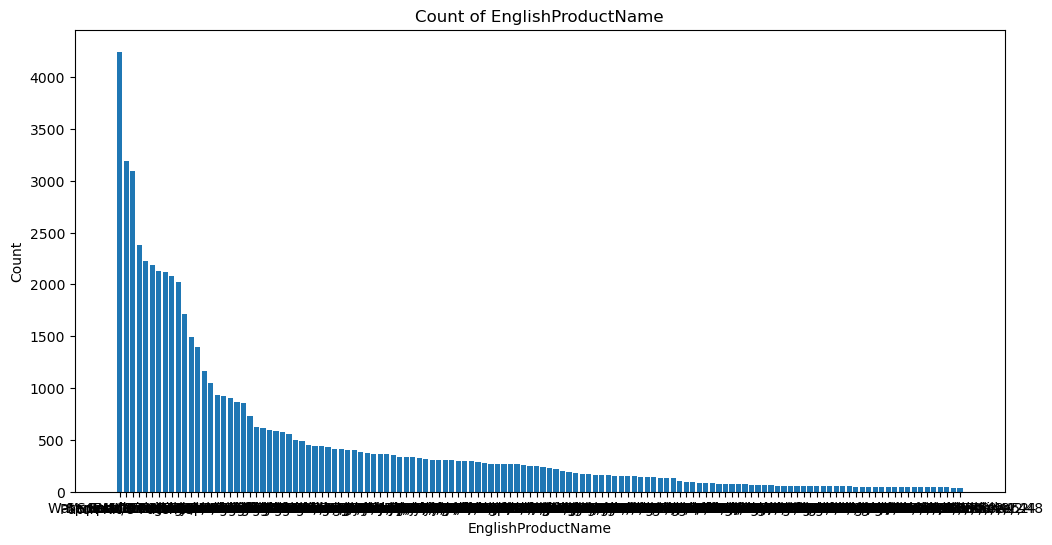

Count Table for MaritalStatus:
+-------------+-----+
|MaritalStatus|count|
+-------------+-----+
|            M|33273|
|            S|27125|
+-------------+-----+



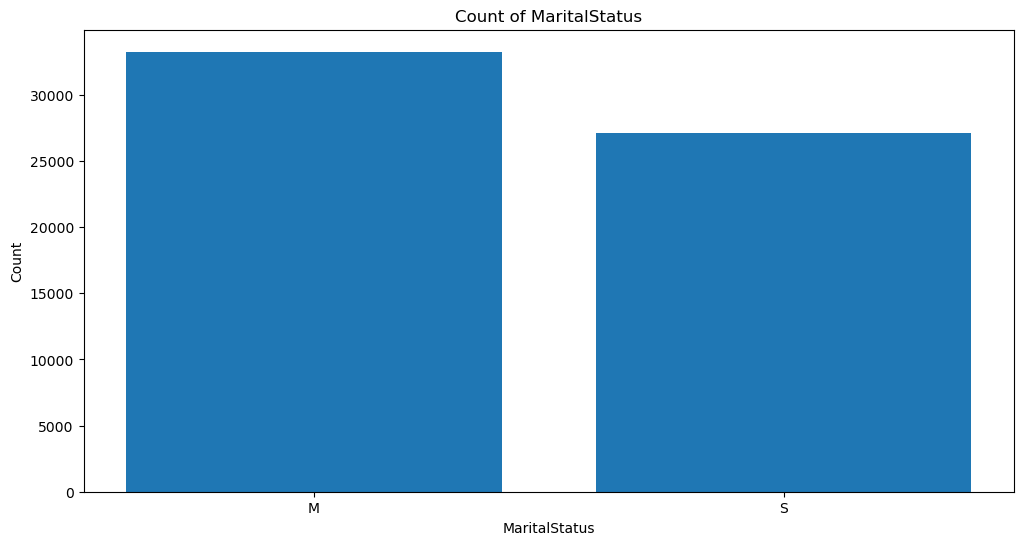

Count Table for Gender:
+------+-----+
|Gender|count|
+------+-----+
|     M|30381|
|     F|30017|
+------+-----+



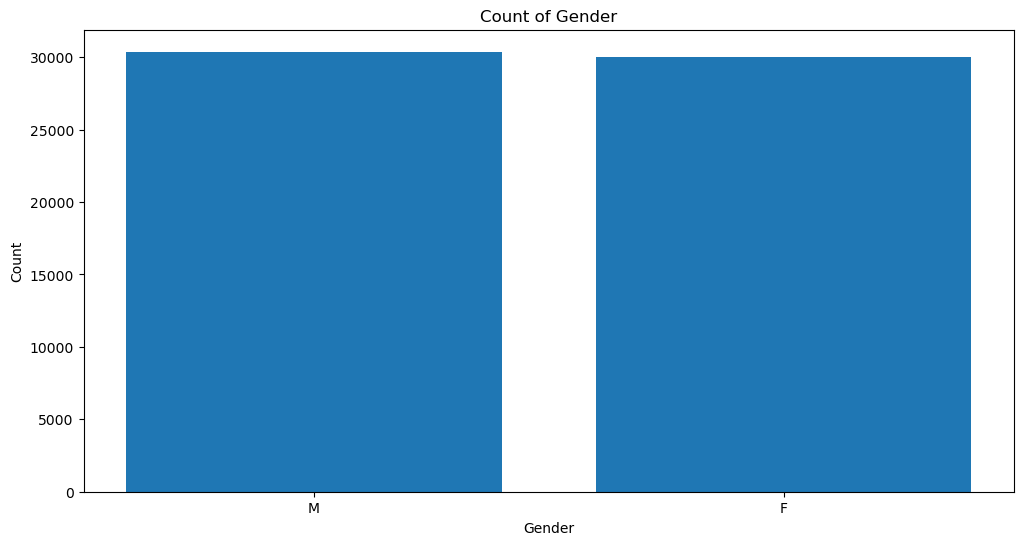

Count Table for TotalChildren:
+-------------+-----+
|TotalChildren|count|
+-------------+-----+
|            0|17048|
|            2|12285|
|            1|11561|
|            4| 7748|
|            3| 7061|
|            5| 4695|
+-------------+-----+



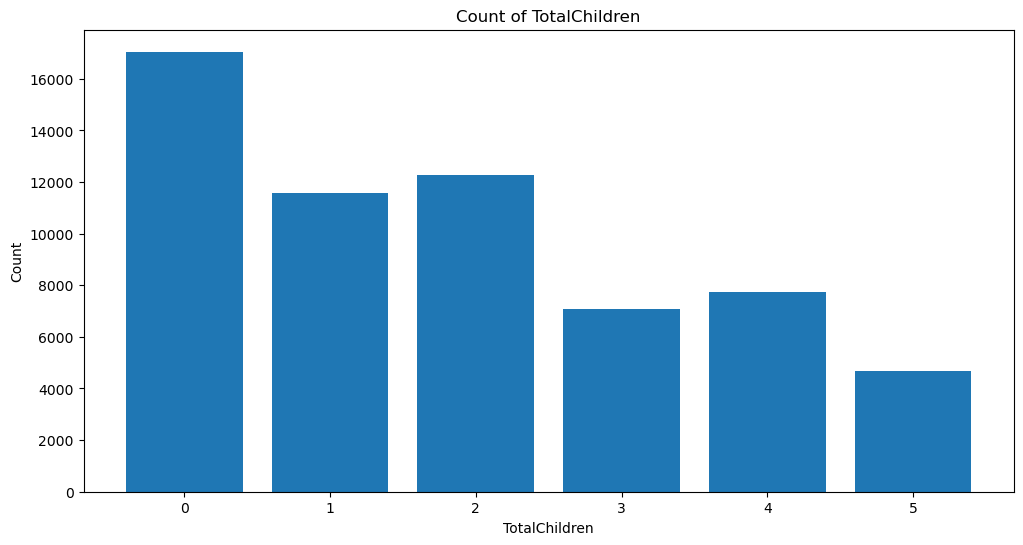

Count Table for NumberChildrenAtHome:
+--------------------+-----+
|NumberChildrenAtHome|count|
+--------------------+-----+
|                   0|35535|
|                   1| 7695|
|                   2| 5338|
|                   4| 4216|
|                   3| 4028|
|                   5| 3586|
+--------------------+-----+



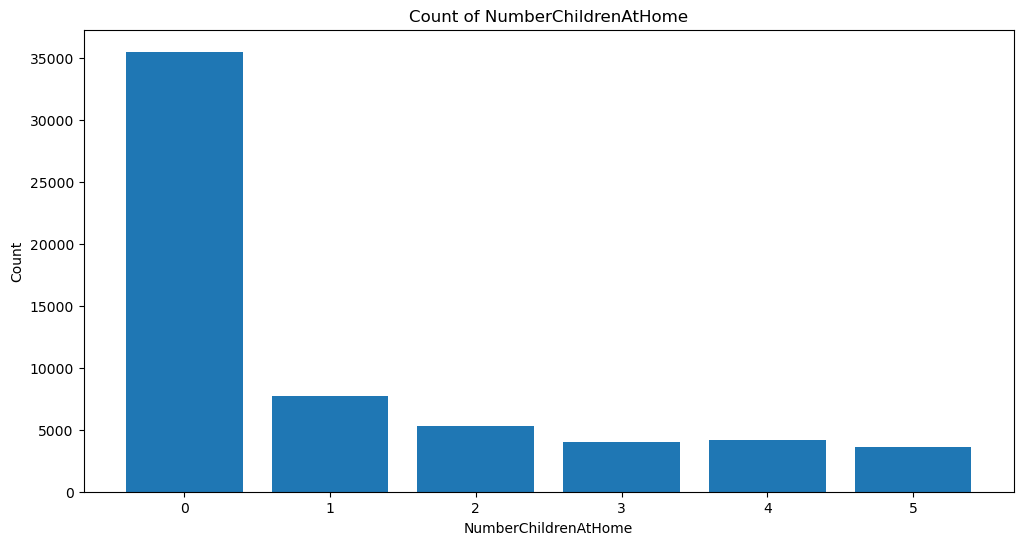

Count Table for CommuteDistance:
+---------------+-----+
|CommuteDistance|count|
+---------------+-----+
|      0-1 Miles|21307|
|     5-10 Miles|10615|
|      1-2 Miles|10170|
|      2-5 Miles|10084|
|      10+ Miles| 8222|
+---------------+-----+



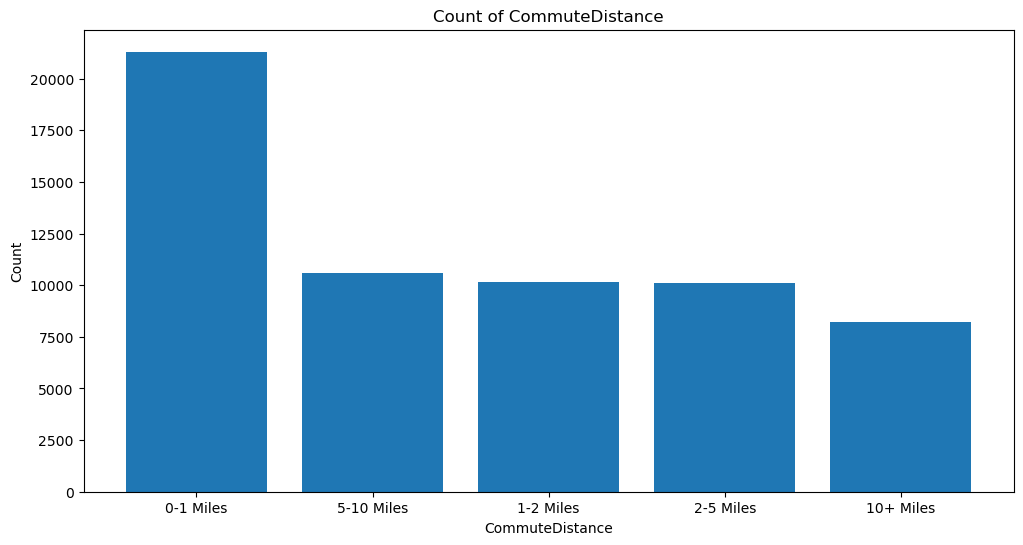

Count Table for EnglishEducation:
+-------------------+-----+
|   EnglishEducation|count|
+-------------------+-----+
|          Bachelors|18144|
|    Partial College|16623|
|    Graduate Degree|10603|
|        High School|10320|
|Partial High School| 4708|
+-------------------+-----+



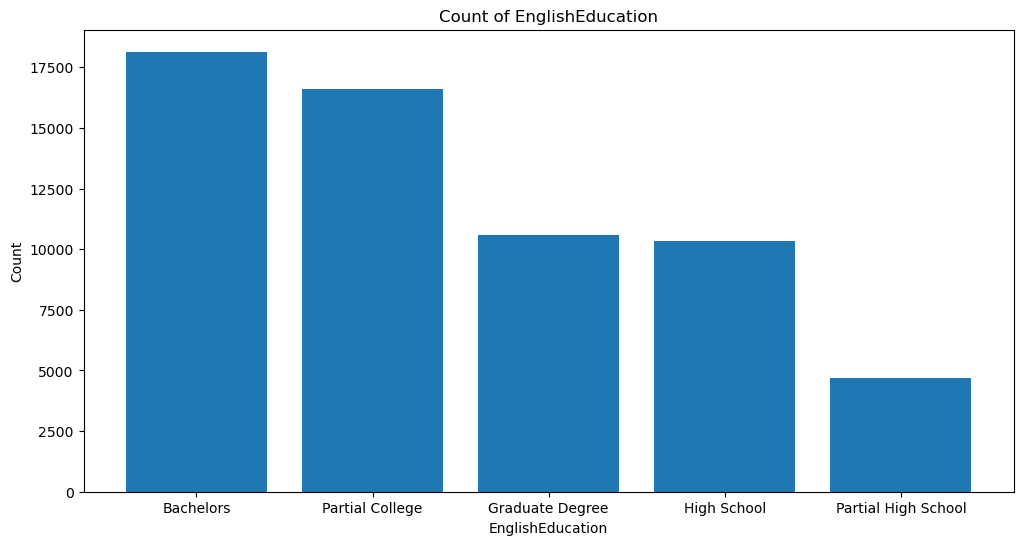

Count Table for HouseOwnerFlag:
+--------------+-----+
|HouseOwnerFlag|count|
+--------------+-----+
|             1|41699|
|             0|18699|
+--------------+-----+



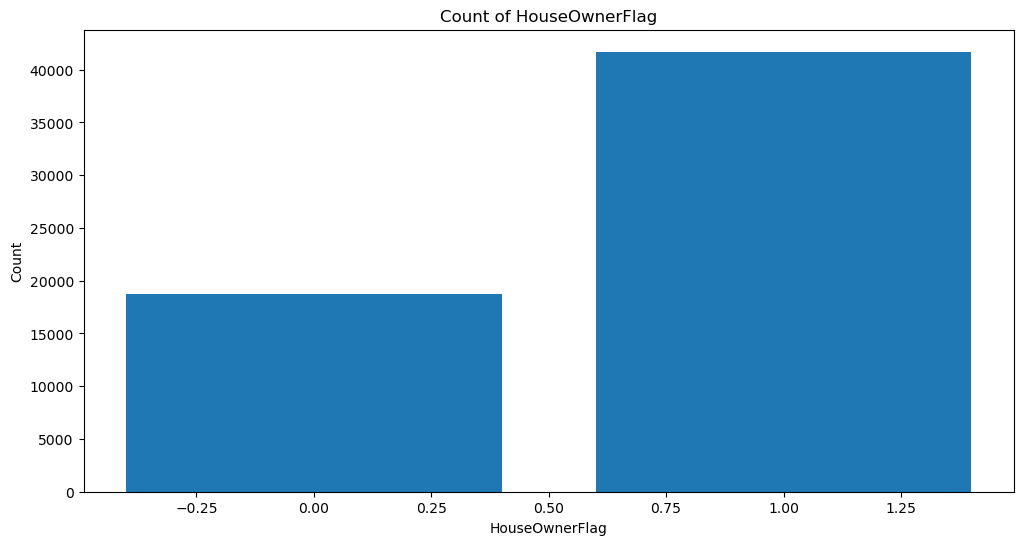

Count Table for NumberCarsOwned:
+---------------+-----+
|NumberCarsOwned|count|
+---------------+-----+
|              2|20522|
|              1|15812|
|              0|14068|
|              3| 5688|
|              4| 4308|
+---------------+-----+



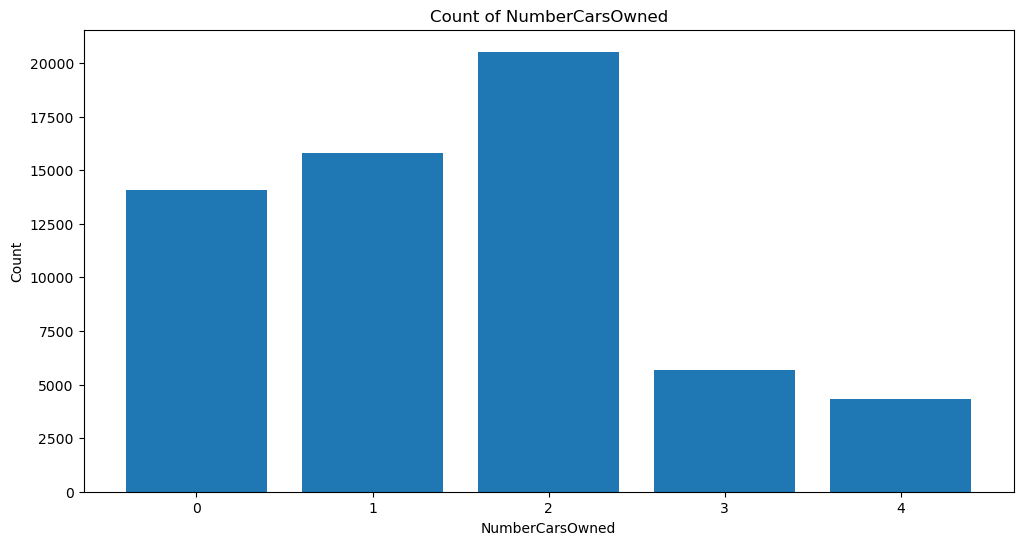

Count Table for EnglishPromotionName:
+--------------------+-----+
|EnglishPromotionName|count|
+--------------------+-----+
|         No Discount|58247|
|Volume Discount 1...| 2118|
|Touring-3000 Prom...|   20|
|Touring-1000 Prom...|   13|
+--------------------+-----+



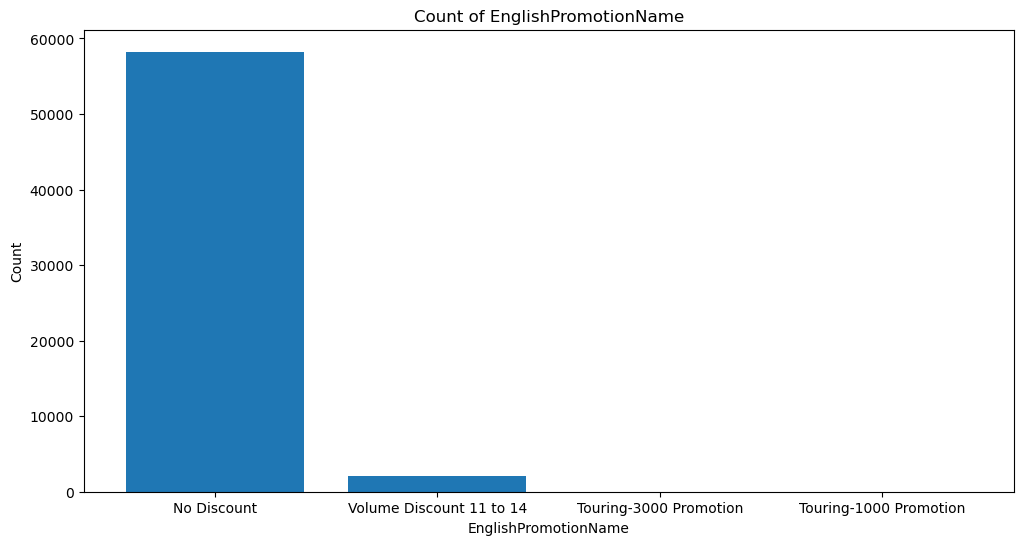

Count Table for CurrencyName:
+--------------------+-----+
|        CurrencyName|count|
+--------------------+-----+
|           US Dollar|33400|
|   Australian Dollar|12988|
|     Canadian Dollar| 7135|
|United Kingdom Pound| 6740|
|       Deutsche Mark|   76|
|        French Franc|   59|
+--------------------+-----+



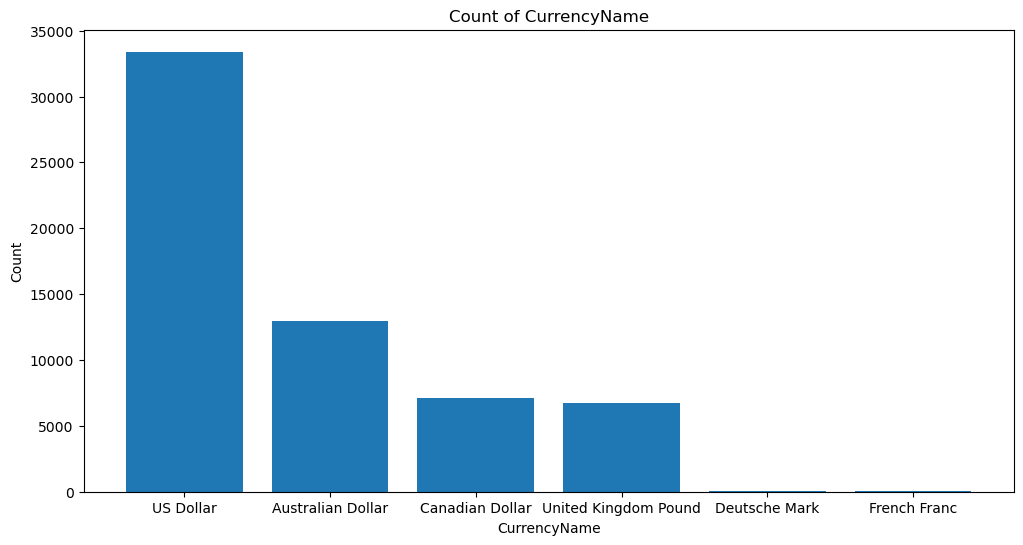

Count Table for SalesTerritoryRegion:
+--------------------+-----+
|SalesTerritoryRegion|count|
+--------------------+-----+
|           Australia|13345|
|           Southwest|12265|
|           Northwest| 8993|
|              Canada| 7620|
|      United Kingdom| 6906|
|             Germany| 5625|
|              France| 5558|
|           Southeast|   39|
|           Northeast|   27|
|             Central|   20|
+--------------------+-----+



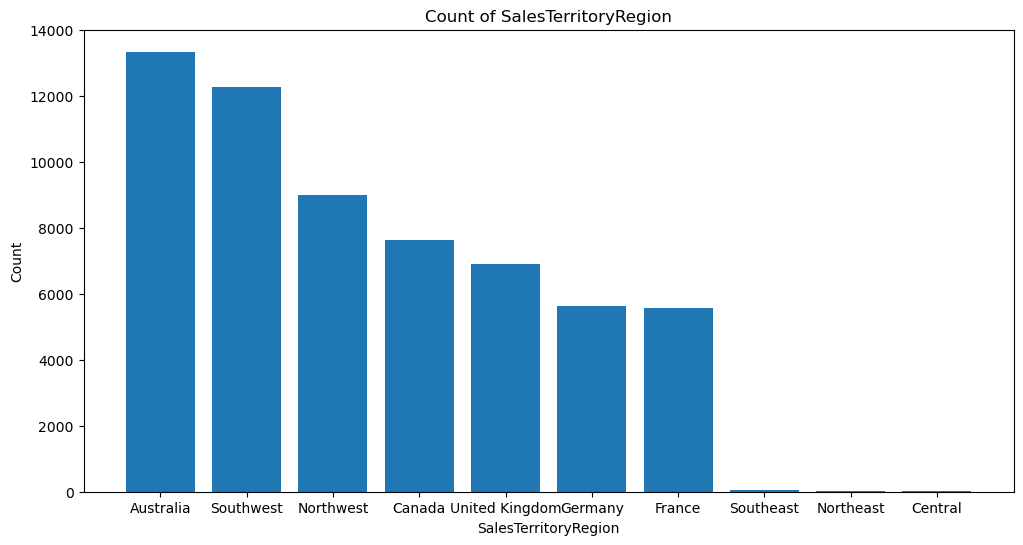

Count Table for SalesTerritoryCountry:
+---------------------+-----+
|SalesTerritoryCountry|count|
+---------------------+-----+
|        United States|21344|
|            Australia|13345|
|               Canada| 7620|
|       United Kingdom| 6906|
|              Germany| 5625|
|               France| 5558|
+---------------------+-----+



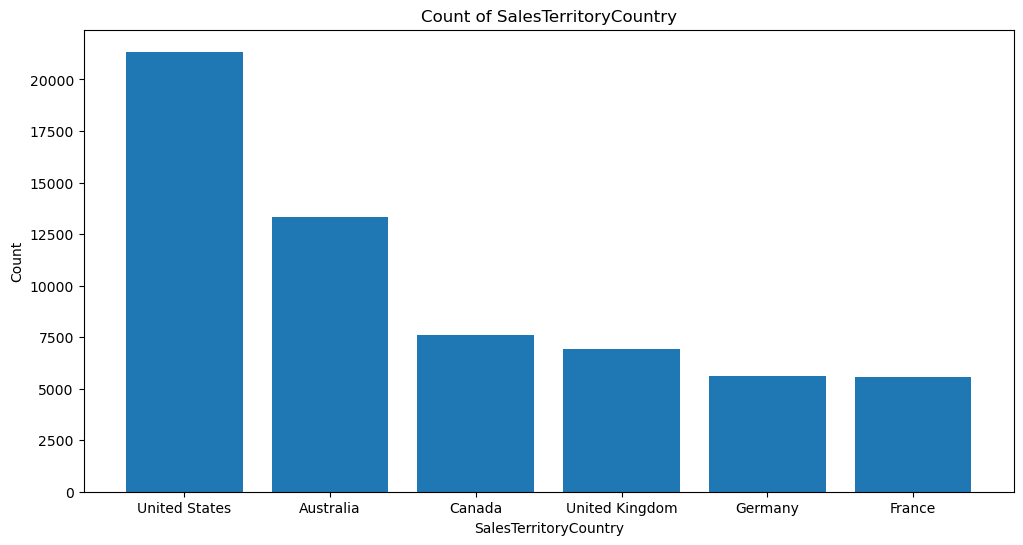

Count Table for SalesTerritoryGroup:
+-------------------+-----+
|SalesTerritoryGroup|count|
+-------------------+-----+
|      North America|28964|
|             Europe|18089|
|            Pacific|13345|
+-------------------+-----+



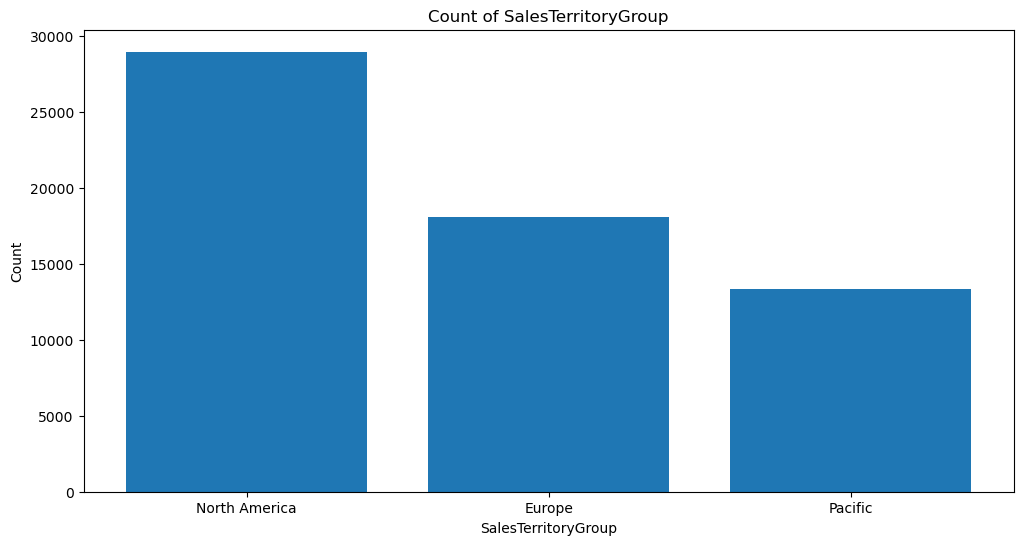

Count Table for StateProvinceName:
+-------------------+-----+
|  StateProvinceName|count|
+-------------------+-----+
|         California|12248|
|   British Columbia| 7584|
|            England| 6906|
|         Washington| 6101|
|    New South Wales| 5839|
|           Victoria| 3343|
|         Queensland| 2903|
|             Oregon| 2876|
|           Saarland| 1403|
|Nordrhein-Westfalen| 1257|
|             Hessen| 1210|
|      Seine (Paris)| 1174|
|            Hamburg|  926|
|    South Australia|  867|
|  Seine Saint Denis|  847|
|               Nord|  844|
|             Bayern|  729|
|     Hauts de Seine|  549|
|            Essonne|  505|
|            Yveline|  484|
+-------------------+-----+
only showing top 20 rows



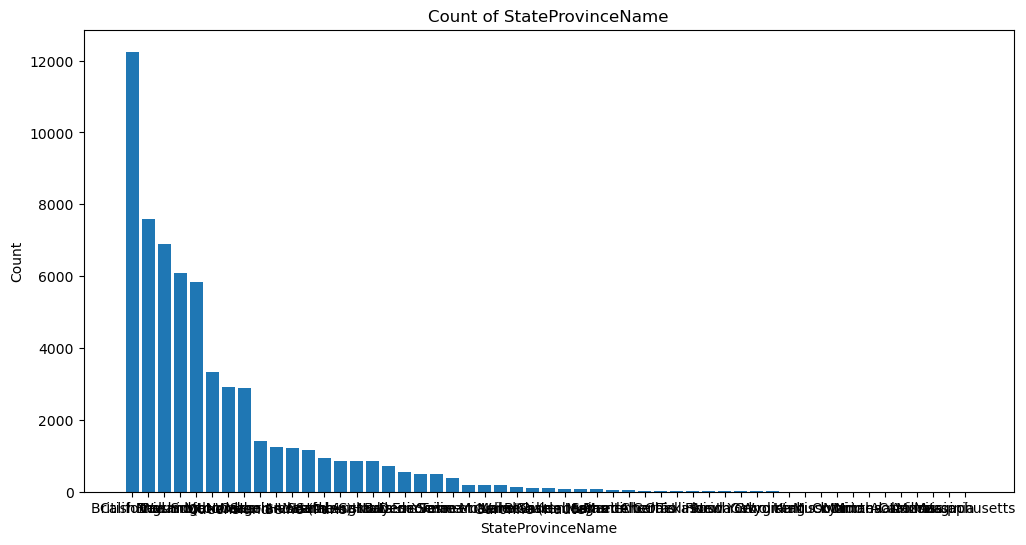

Count Table for EnglishCountryRegionName:
+------------------------+-----+
|EnglishCountryRegionName|count|
+------------------------+-----+
|           United States|21344|
|               Australia|13345|
|                  Canada| 7620|
|          United Kingdom| 6906|
|                 Germany| 5625|
|                  France| 5558|
+------------------------+-----+



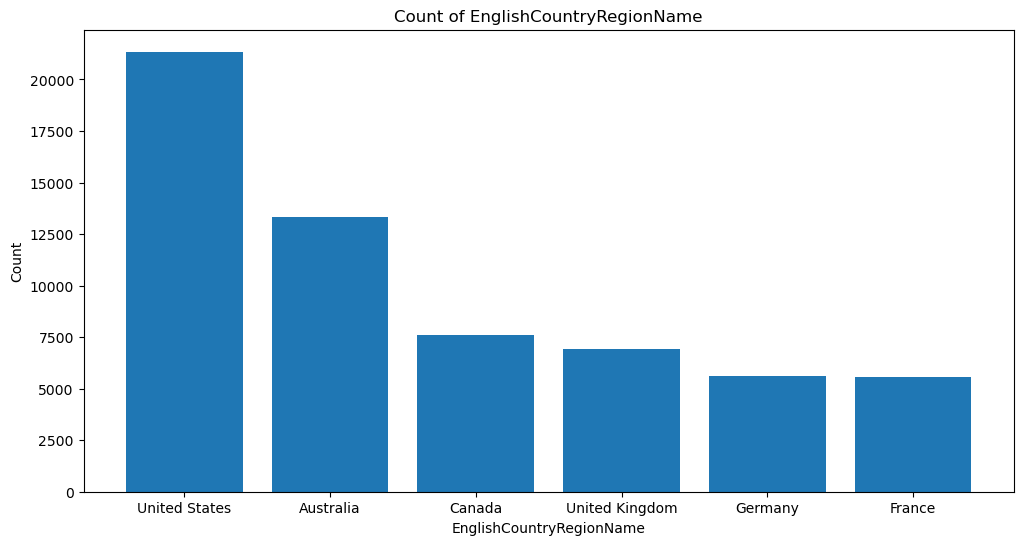

Count Table for City:
+-------------+-----+
|         City|count|
+-------------+-----+
|       London| 1579|
|        Paris| 1174|
|    Cliffside|  918|
|  Chula Vista|  583|
|       Berlin|  583|
|       Burien|  579|
|     Berkeley|  567|
|   Bellingham|  566|
|      Shawnee|  563|
|      Concord|  559|
| N. Vancouver|  552|
|    Beaverton|  547|
|   Bellflower|  537|
|   Burlingame|  535|
|      Burbank|  532|
|      Langley|  516|
|    Metchosin|  503|
| Port Hammond|  502|
|    Bremerton|  494|
|Beverly Hills|  485|
+-------------+-----+
only showing top 20 rows



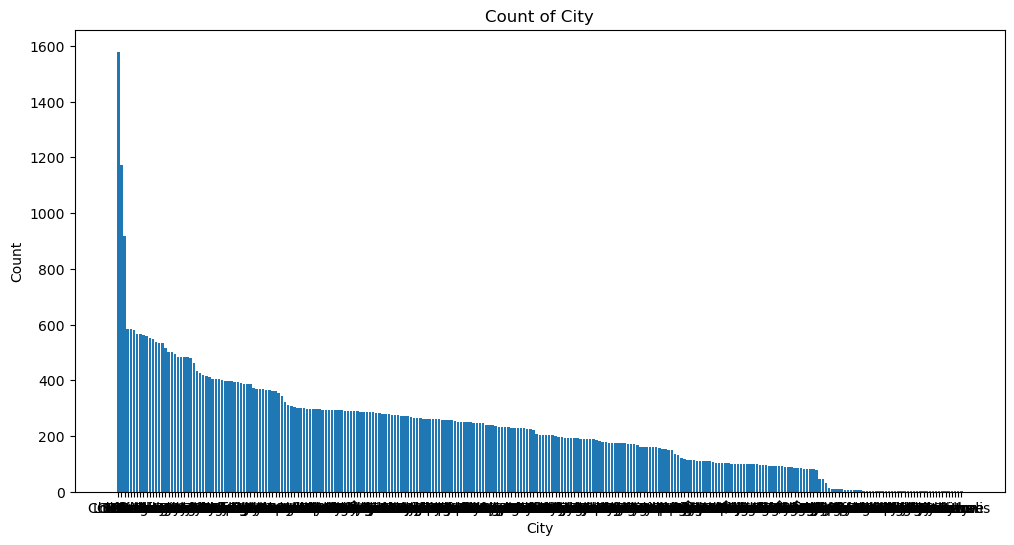

Count Table for OrderYear:
+---------+-----+
|OrderYear|count|
+---------+-----+
|     2013|52801|
|     2012| 3397|
|     2011| 2216|
|     2014| 1970|
|     2010|   14|
+---------+-----+



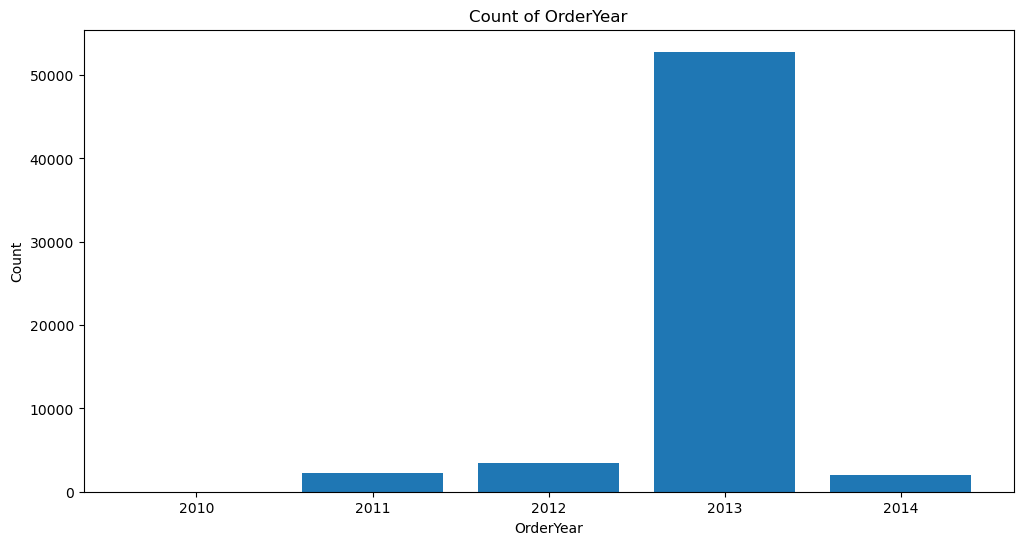

Count Table for OrderMonth:
+----------+-----+
|OrderMonth|count|
+----------+-----+
|        12| 6239|
|        10| 5834|
|        11| 5756|
|         6| 5573|
|         8| 5352|
|         7| 5105|
|         9| 5070|
|         5| 4780|
|         3| 4449|
|         4| 4355|
|         1| 4028|
|         2| 3857|
+----------+-----+



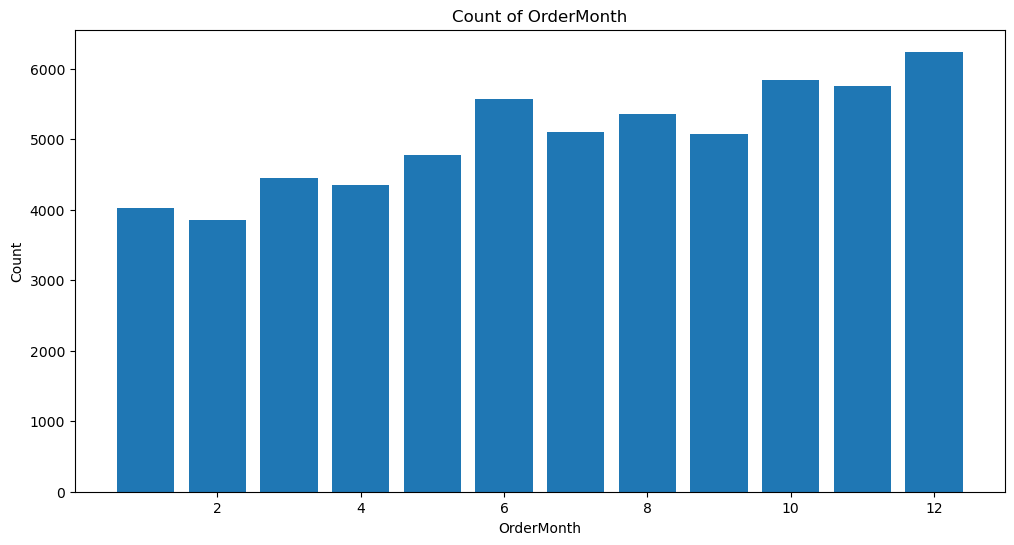

Count Table for DayOfWeek:
+---------+-----+
|DayOfWeek|count|
+---------+-----+
|        3| 8949|
|        2| 8732|
|        1| 8596|
|        4| 8585|
|        5| 8550|
|        6| 8504|
|        7| 8482|
+---------+-----+



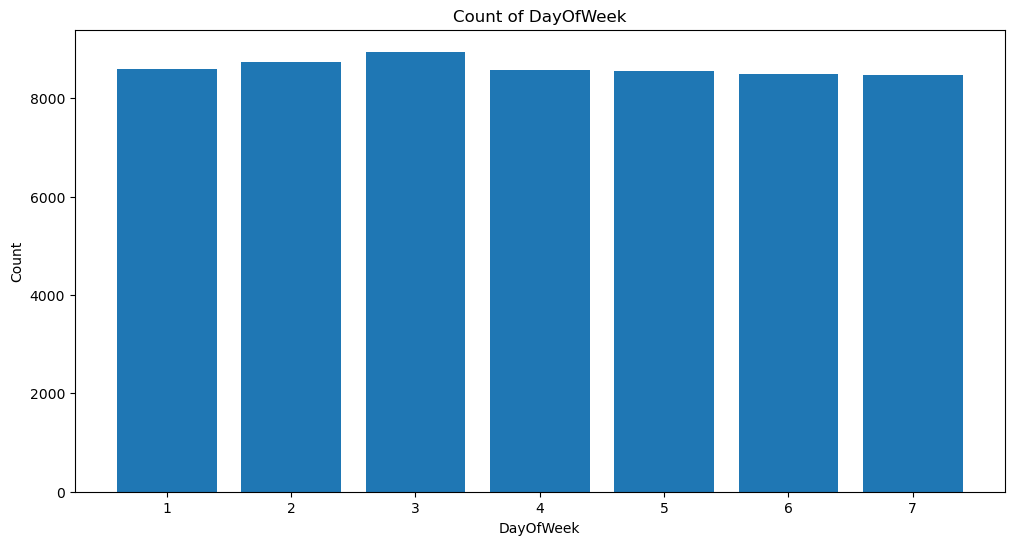

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt


# List of columns to consider
columns_of_interest = [
    'EnglishProductName', 'MaritalStatus', 'Gender', 'TotalChildren', 'NumberChildrenAtHome',
    'CommuteDistance', 'EnglishEducation', 'HouseOwnerFlag', 'NumberCarsOwned',
    'EnglishPromotionName', 'CurrencyName', 'SalesTerritoryRegion', 'SalesTerritoryCountry',
    'SalesTerritoryGroup', 'StateProvinceName', 'EnglishCountryRegionName', 'City',
    'OrderYear', 'OrderMonth', 'DayOfWeek'
]

# Create a count table and bar plot for each column
for column in columns_of_interest:
    # Count table
    count_table = joined_df.groupBy(column).count().orderBy('count', ascending=False)
    
    # Display count table
    print(f"Count Table for {column}:")
    count_table.show()

    # Convert the Spark DataFrame column to a Pandas DataFrame for plotting
    column_data = count_table.toPandas()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(column_data[column], column_data['count'])
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [7]:
joined_df.columns

['UnitPrice',
 'ExtendedAmount',
 'UnitPriceDiscountPct',
 'DiscountAmount',
 'ProductStandardCost',
 'TotalProductCost',
 'SalesAmount',
 'TaxAmt',
 'Freight',
 'EnglishProductName',
 'MaritalStatus',
 'Gender',
 'TotalChildren',
 'NumberChildrenAtHome',
 'CommuteDistance',
 'EnglishEducation',
 'HouseOwnerFlag',
 'NumberCarsOwned',
 'EnglishPromotionName',
 'CurrencyName',
 'SalesTerritoryRegion',
 'SalesTerritoryCountry',
 'SalesTerritoryGroup',
 'StateProvinceName',
 'EnglishCountryRegionName',
 'City',
 'OrderYear',
 'OrderMonth',
 'DayOfWeek',
 'BirthYear',
 'BirthMonth',
 'BirthDayOfWeek',
 'Age']


- **Age:** This column represents the different age groups for which the average unit price is calculated.

- **AverageUnitPrice:** This column shows the calculated average unit price for each corresponding age group. It is the mean value of the 'UnitPrice' column for each age group.

Insights:

1. **High Average Unit Prices:** Age groups 45, 58, 56, 60, and 89 have relatively higher average unit prices, indicating that products purchased by individuals in these age groups tend to be more expensive on average.

2. **Low Average Unit Prices:** Age groups 103, 91, 93, 96, and 87 have lower average unit prices, suggesting that products purchased by individuals in these age groups tend to be less expensive on average.

3. **Varied Spending Patterns:** The table reflects a wide range of average unit prices across different age groups, indicating diverse spending patterns among customers of different ages.

4. **Outliers:** Some age groups, such as 45, have notably high average unit prices, potentially indicating a preference for premium or luxury products in that age group.

5. **Age 104:** There is only one entry for age 104, and it has a relatively high average unit price. However, interpretations for such small sample sizes should be made cautiously.

These insights can be valuable for marketing and sales strategies, helping businesses understand the purchasing behavior of different age groups and tailor their offerings accordingly.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
from pyspark.sql.types import IntegerType

# Assuming 'joined_df' is your DataFrame
# Replace 'joined_df' with your actual DataFrame name

# Calculate the average UnitPrice by Age
average_unit_price_by_age = joined_df.groupBy("Age").agg(avg("UnitPrice").alias("AverageUnitPrice"))

# Drop rows with null values in 'Age' or 'AverageUnitPrice' columns
average_unit_price_by_age = average_unit_price_by_age.na.drop(subset=["Age", "AverageUnitPrice"])

# Cast 'Age' column to IntegerType
average_unit_price_by_age = average_unit_price_by_age.withColumn("Age", average_unit_price_by_age["Age"].cast(IntegerType()))

# Convert PySpark DataFrame to Pandas DataFrame
average_unit_price_by_age_pd = average_unit_price_by_age.toPandas()

try:
    # Check if the DataFrame is not empty
    if average_unit_price_by_age_pd.empty:
        raise ValueError("DataFrame is empty. No data to plot.")

    # Set the style of seaborn for better visualization
    sns.set(style="whitegrid")

    # Create a bar plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Age', y='AverageUnitPrice', data=average_unit_price_by_age_pd, palette='viridis')
    plt.title('Average UnitPrice by Age (Descending Order)')
    plt.xlabel('Age')
    plt.ylabel('Average UnitPrice')

    # Add labels to the bars
    for index, value in enumerate(average_unit_price_by_age_pd['AverageUnitPrice']):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

    plt.show()

    # Display the table of the group by 'Age' and average unit price
    average_unit_price_by_age.show(300)

except Exception as e:
    print("Error:", str(e))
    # Handle the error as needed


Error: DataFrame is empty. No data to plot.




- **EnglishProductName:** This column represents the names of different products.

- **AveragePrice:** This column represents the average price of each product.

The table is sorted in descending order based on the 'AveragePrice' column, meaning the products with the highest average price are listed first. Here are a few observations:

1. **Mountain-200 Black, 46:** This product has the highest average price, indicating that it is relatively expensive compared to other products.

2. **Touring-1000 Yellow, 46:** This product also has a high average price, making it one of the more expensive items.

3. **Touring-1000 Blue, 46:** Similar to the yellow variant, the blue version of the Touring-1000 has a high average price.

4. **Short-Sleeve Classic Jersey, M:** This is an example of a product with a lower average price.

5. **Women's Mountain Shorts, M:** Another product with a relatively lower average price.

The table provides insights into the pricing distribution across different product categories, helping you identify products with varying price points.

+--------------------+------------------+
|  EnglishProductName|      AveragePrice|
+--------------------+------------------+
|Mountain-200 Blac...|2220.1011293159568|
|Touring-1000 Yell...|2384.0700000000043|
|Touring-1000 Blue...|2384.0700000000043|
|Short-Sleeve Clas...|53.989999999999824|
|Women's Mountain ...| 69.98999999999984|
|Long-Sleeve Logo ...| 49.98999999999983|
|Mountain-400-W Si...| 769.4899999999998|
|     Racing Socks, M| 8.990000000000007|
|Mountain-100 Silv...| 3399.990000000001|
|Mountain-200 Silv...| 2245.418879999995|
|  Road-750 Black, 58| 539.9900000000009|
|Half-Finger Glove...| 24.48999999999988|
|Road-350-W Yellow...|1700.9899999999989|
|Mountain-400-W Si...| 769.4899999999997|
|Mountain-100 Silv...|           3399.99|
|Mountain Bottle Cage|  9.98999999999984|
|Touring-1000 Blue...|2384.0700000000047|
|Mountain-500 Silv...| 564.9899999999999|
|    HL Mountain Tire|              35.0|
|Mountain-400-W Si...| 769.4899999999998|
|Bike Wash - Disso...|  7.94999999

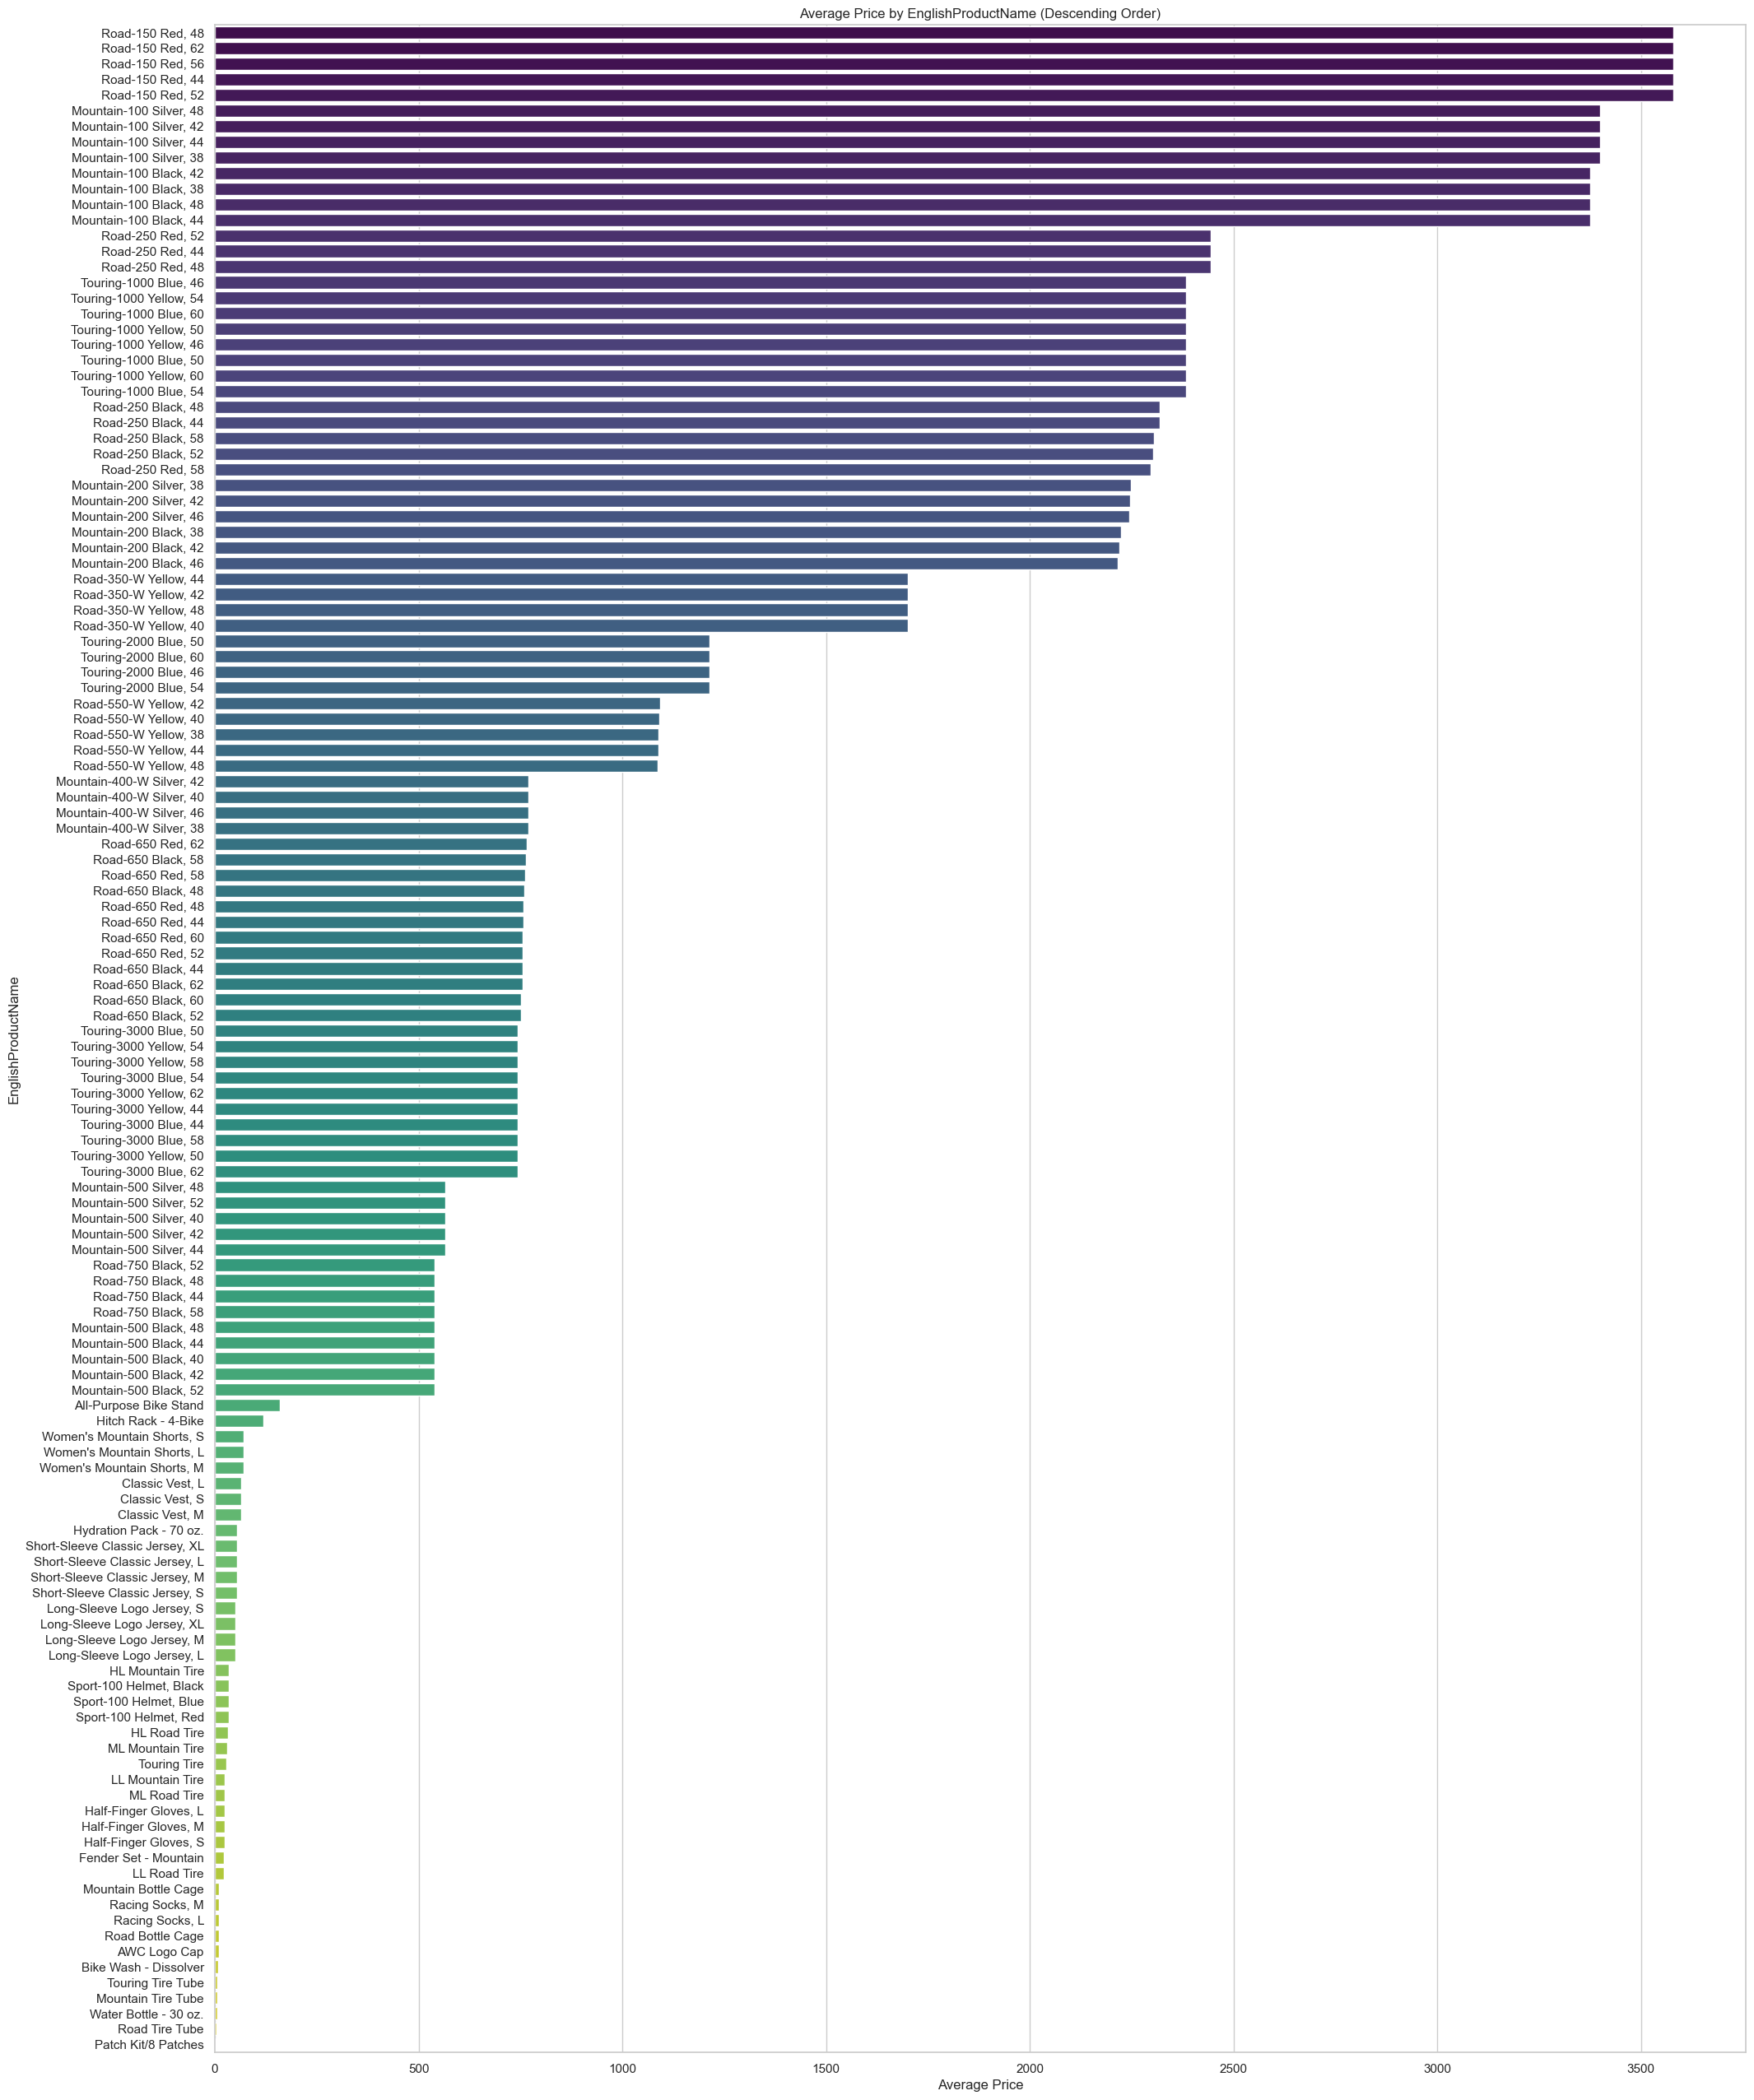

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg


# Calculate the average price by 'EnglishProductName'
average_price_by_product = joined_df.groupBy("EnglishProductName").agg(avg("UnitPrice").alias("AveragePrice"))
average_price_by_product.show(300)
# Convert PySpark DataFrame to Pandas DataFrame
average_price_by_product_pd = average_price_by_product.toPandas()

# Sort the Pandas DataFrame by AveragePrice in descending order
average_price_by_product_pd = average_price_by_product_pd.sort_values(by='AveragePrice', ascending=False)

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(24, 32))
sns.barplot(x='AveragePrice', y='EnglishProductName', data=average_price_by_product_pd, palette='viridis')
plt.title('Average Price by EnglishProductName (Descending Order)')
plt.xlabel('Average Price')
plt.ylabel('EnglishProductName')
plt.show()


Certainly! Let's delve deeper into the insights and draw real-world implications:

1. **MaritalStatus:**
   - Customers with MaritalStatus 'S' might have higher disposable income, as they are not supporting a family. Targeting promotions or products that appeal to independent individuals could be beneficial.

2. **Gender:**
   - The slightly higher average expenditure by female customers could indicate a potential market for premium or personalized products tailored to female preferences.

3. **TotalChildren and NumberChildrenAtHome:**
   - Customers with one or two children seem to spend more. This insight can guide marketing strategies, such as family-oriented promotions or bundles.

4. **CommuteDistance:**
   - Customers with a shorter commute distance might be more willing to spend on convenience. Products tailored to this group, such as home delivery services, could be explored.

5. **EnglishEducation:**
   - Customers with a 'Bachelors' education level may value quality and brand reputation. Marketing efforts can focus on highlighting these aspects to attract similar customers.

6. **HouseOwnerFlag:**
   - Homeowners might be more stable in their living situation, allowing for greater willingness to invest in higher-priced items or home-related products.

7. **NumberCarsOwned:**
   - Customers without cars may allocate more of their budget to other lifestyle categories. Marketing efforts could emphasize products that enhance their non-driving experiences.

8. **EnglishPromotionName:**
   - The success of the 'Touring-1000 Promotion' suggests that exclusive or limited-time promotions can drive higher spending. Similar strategies could be employed for other products.

9. **CurrencyName:**
   - Customers using 'Deutsche Mark' and 'French Franc' might be international travelers or expatriates. Tailoring products or services to this demographic can enhance their experience.

10. **SalesTerritoryRegion and SalesTerritoryCountry:**
    - Regions or countries with higher average unit prices could be targeted for premium product launches or marketing campaigns.

11. **SalesTerritoryGroup:**
    - The 'Pacific' group, with the highest average unit prices, might represent a wealthier market. Customizing offerings to meet the preferences of this group could lead to increased sales.

12. **StateProvinceName:**
    - States with higher average unit prices could be prioritized for marketing campaigns focusing on premium or exclusive products.

13. **OrderMonth and DayOfWeek:**
    - Higher spending in June and on Thursdays suggests potential patterns in consumer behavior. Seasonal promotions or mid-week specials could be tailored to these trends.

Understanding these insights allows businesses to make informed decisions regarding product development, marketing strategies, and customer targeting. By tailoring approaches based on customer characteristics, businesses can enhance the overall customer experience and drive increased sales.

Count Table for EnglishProductName:
+--------------------+-----+
|  EnglishProductName|count|
+--------------------+-----+
|Water Bottle - 30...| 4244|
| Patch Kit/8 Patches| 3191|
|  Mountain Tire Tube| 3095|
|      Road Tire Tube| 2376|
|Sport-100 Helmet,...| 2230|
|        AWC Logo Cap| 2190|
|Sport-100 Helmet,...| 2125|
|Fender Set - Moun...| 2121|
|Sport-100 Helmet,...| 2085|
|Mountain Bottle Cage| 2025|
|    Road Bottle Cage| 1712|
|   Touring Tire Tube| 1488|
|    HL Mountain Tire| 1396|
|    ML Mountain Tire| 1161|
|        LL Road Tire| 1044|
|        Touring Tire|  935|
|        ML Road Tire|  926|
|Bike Wash - Disso...|  908|
|    LL Mountain Tire|  862|
|        HL Road Tire|  858|
+--------------------+-----+
only showing top 20 rows



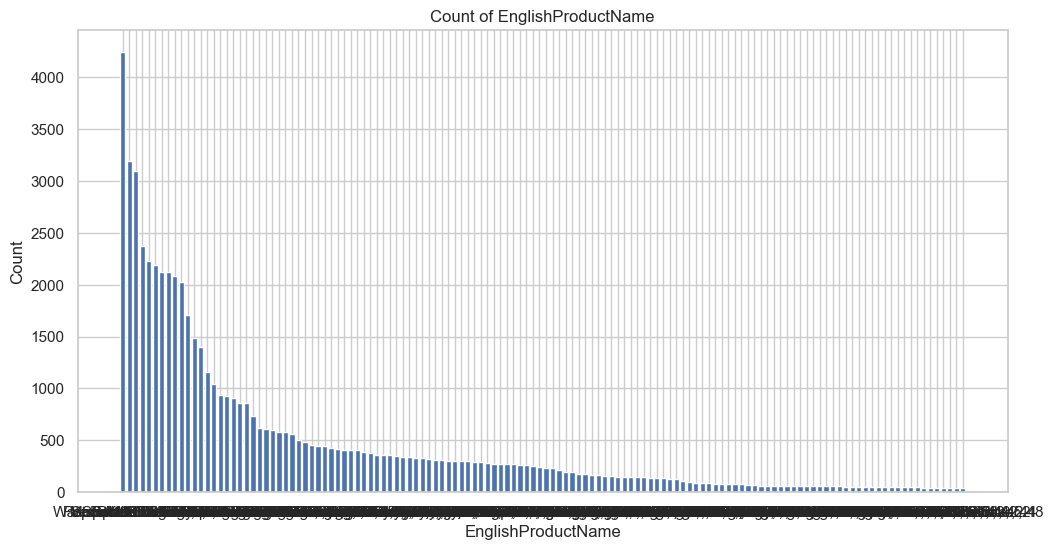

Count Table for MaritalStatus:
+-------------+-----+
|MaritalStatus|count|
+-------------+-----+
|            M|33273|
|            S|27125|
+-------------+-----+



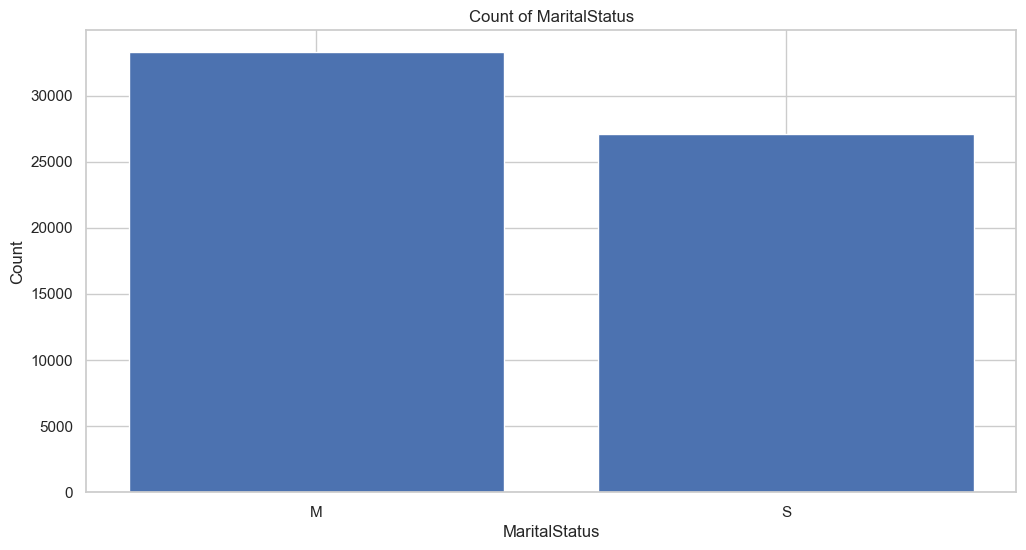

Count Table for Gender:
+------+-----+
|Gender|count|
+------+-----+
|     M|30381|
|     F|30017|
+------+-----+



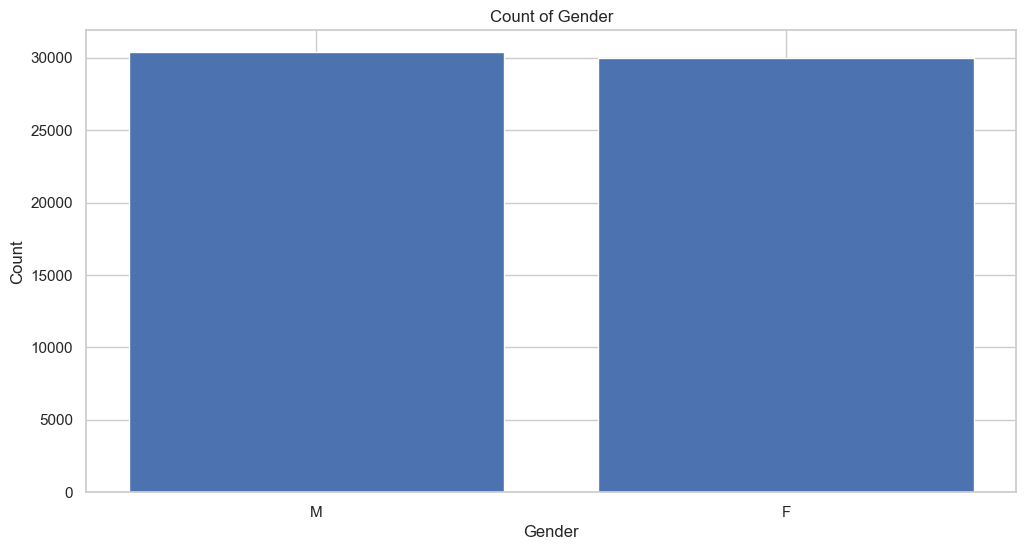

Count Table for TotalChildren:
+-------------+-----+
|TotalChildren|count|
+-------------+-----+
|            0|17048|
|            2|12285|
|            1|11561|
|            4| 7748|
|            3| 7061|
|            5| 4695|
+-------------+-----+



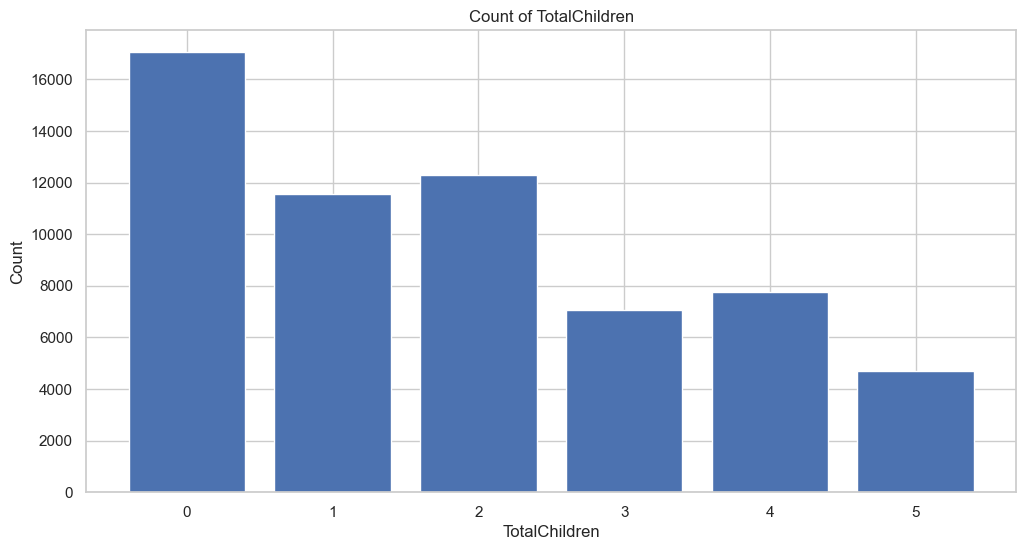

Count Table for NumberChildrenAtHome:
+--------------------+-----+
|NumberChildrenAtHome|count|
+--------------------+-----+
|                   0|35535|
|                   1| 7695|
|                   2| 5338|
|                   4| 4216|
|                   3| 4028|
|                   5| 3586|
+--------------------+-----+



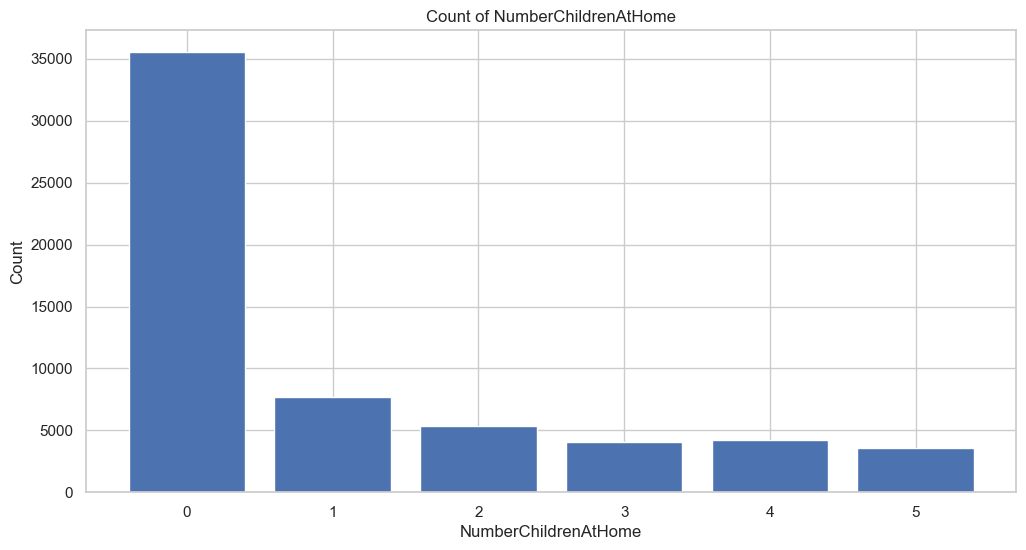

Count Table for CommuteDistance:
+---------------+-----+
|CommuteDistance|count|
+---------------+-----+
|      0-1 Miles|21307|
|     5-10 Miles|10615|
|      1-2 Miles|10170|
|      2-5 Miles|10084|
|      10+ Miles| 8222|
+---------------+-----+



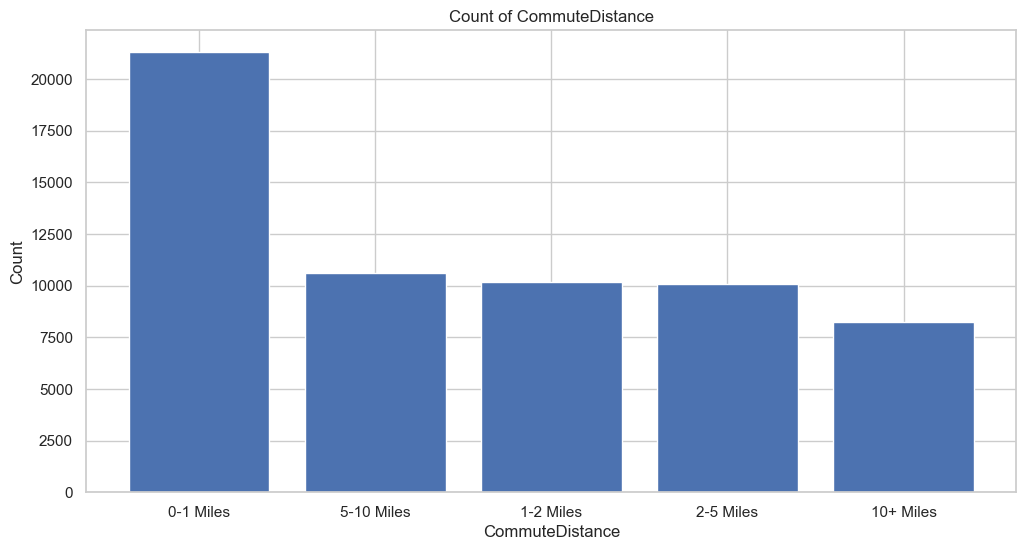

Count Table for EnglishEducation:
+-------------------+-----+
|   EnglishEducation|count|
+-------------------+-----+
|          Bachelors|18144|
|    Partial College|16623|
|    Graduate Degree|10603|
|        High School|10320|
|Partial High School| 4708|
+-------------------+-----+



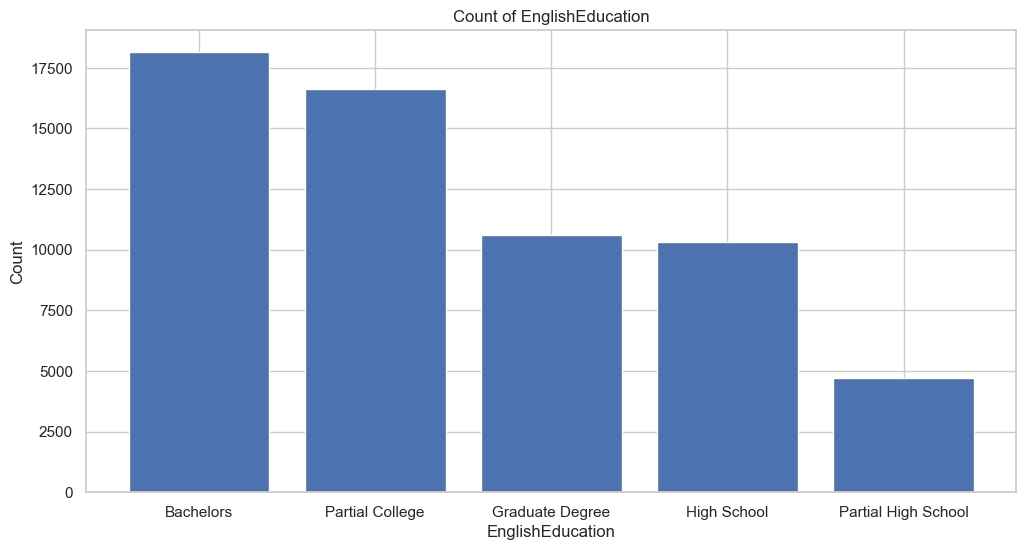

Count Table for HouseOwnerFlag:
+--------------+-----+
|HouseOwnerFlag|count|
+--------------+-----+
|             1|41699|
|             0|18699|
+--------------+-----+



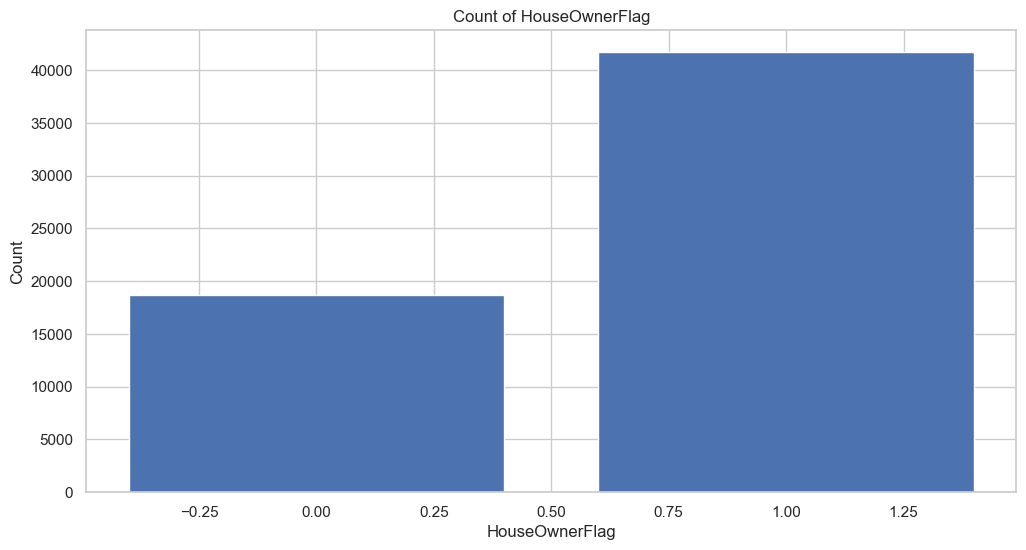

Count Table for NumberCarsOwned:
+---------------+-----+
|NumberCarsOwned|count|
+---------------+-----+
|              2|20522|
|              1|15812|
|              0|14068|
|              3| 5688|
|              4| 4308|
+---------------+-----+



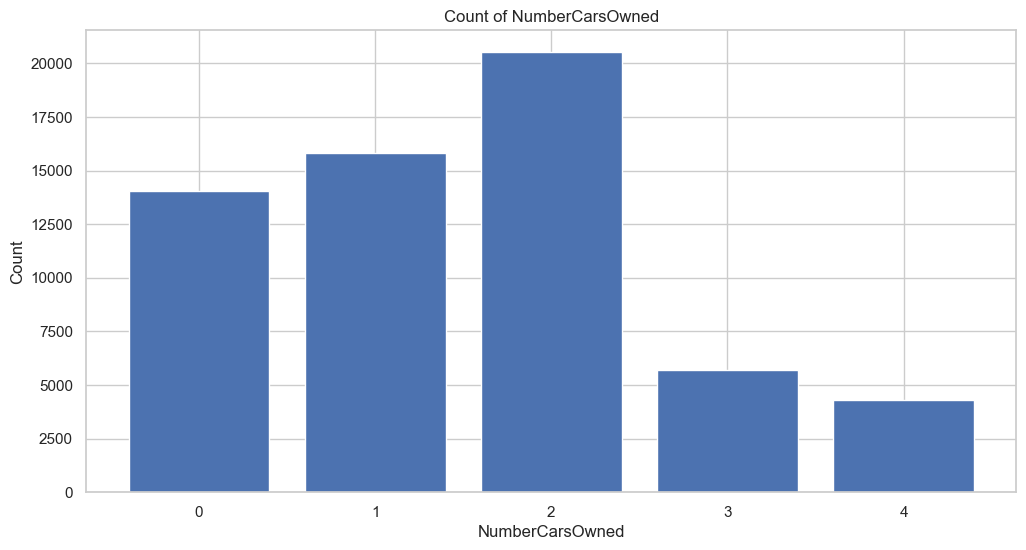

Count Table for EnglishPromotionName:
+--------------------+-----+
|EnglishPromotionName|count|
+--------------------+-----+
|         No Discount|58247|
|Volume Discount 1...| 2118|
|Touring-3000 Prom...|   20|
|Touring-1000 Prom...|   13|
+--------------------+-----+



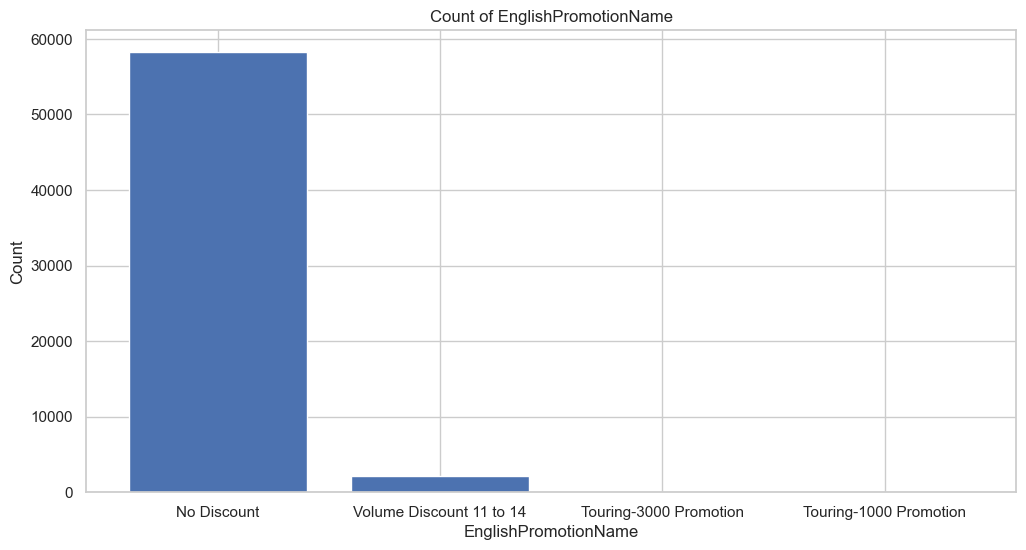

Count Table for CurrencyName:
+--------------------+-----+
|        CurrencyName|count|
+--------------------+-----+
|           US Dollar|33400|
|   Australian Dollar|12988|
|     Canadian Dollar| 7135|
|United Kingdom Pound| 6740|
|       Deutsche Mark|   76|
|        French Franc|   59|
+--------------------+-----+



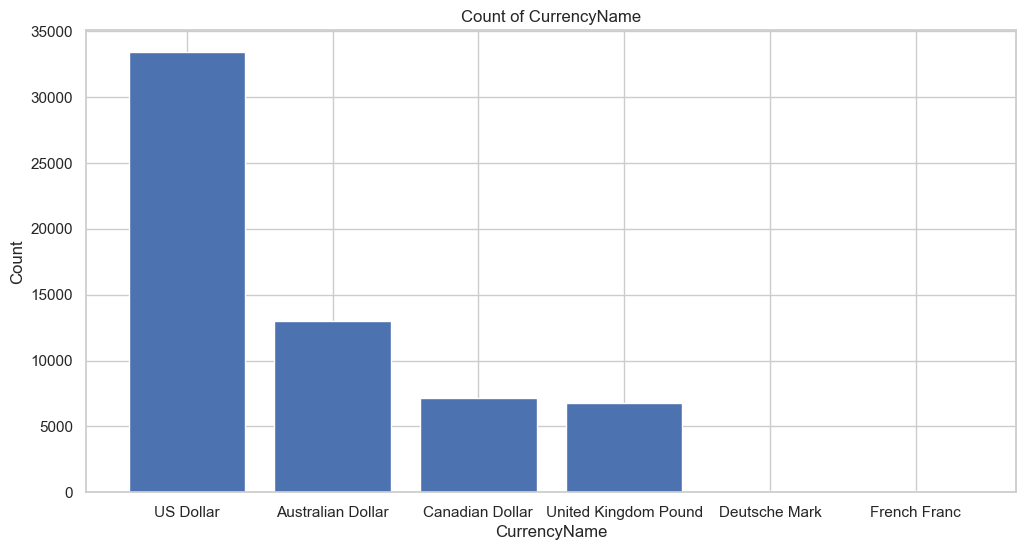

Count Table for SalesTerritoryRegion:
+--------------------+-----+
|SalesTerritoryRegion|count|
+--------------------+-----+
|           Australia|13345|
|           Southwest|12265|
|           Northwest| 8993|
|              Canada| 7620|
|      United Kingdom| 6906|
|             Germany| 5625|
|              France| 5558|
|           Southeast|   39|
|           Northeast|   27|
|             Central|   20|
+--------------------+-----+



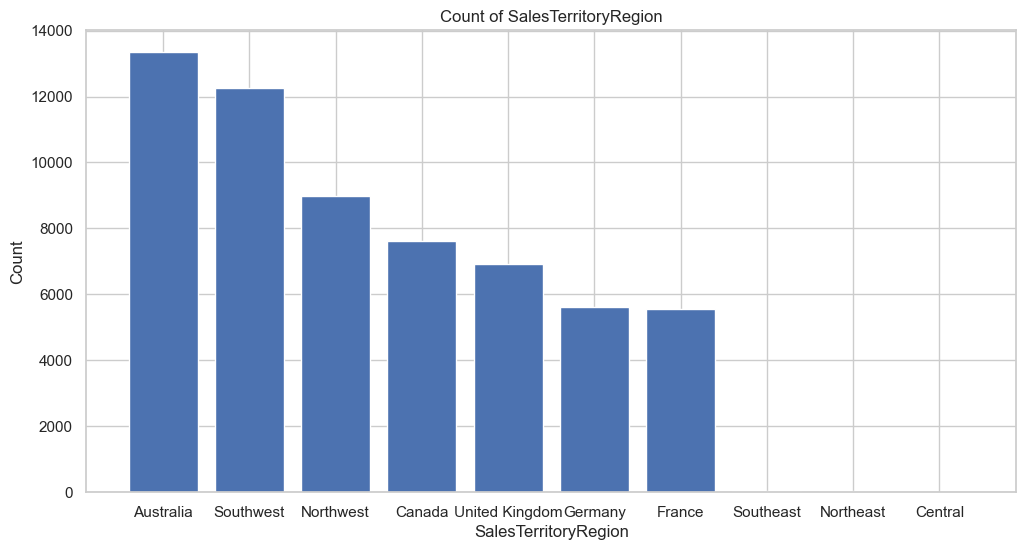

Count Table for SalesTerritoryCountry:
+---------------------+-----+
|SalesTerritoryCountry|count|
+---------------------+-----+
|        United States|21344|
|            Australia|13345|
|               Canada| 7620|
|       United Kingdom| 6906|
|              Germany| 5625|
|               France| 5558|
+---------------------+-----+



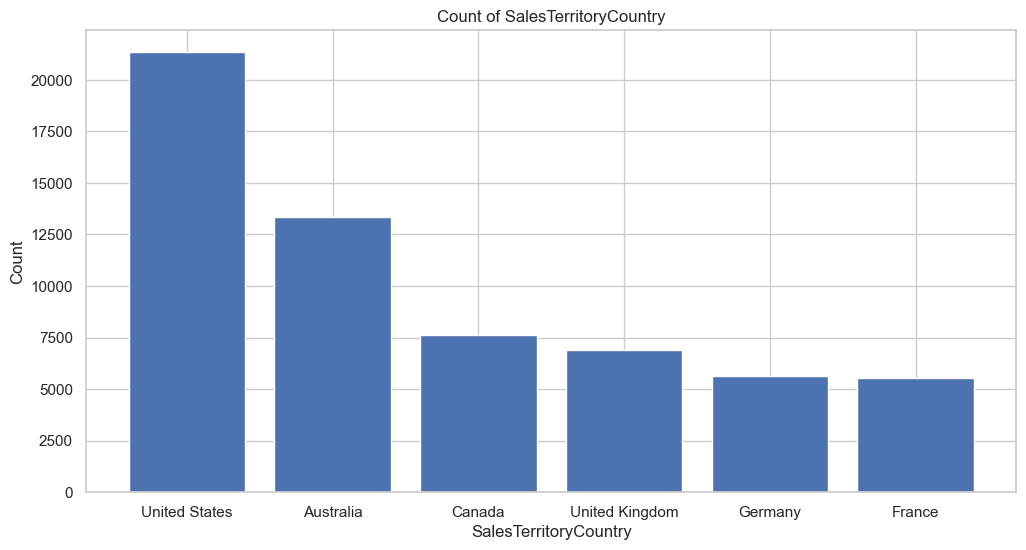

Count Table for SalesTerritoryGroup:
+-------------------+-----+
|SalesTerritoryGroup|count|
+-------------------+-----+
|      North America|28964|
|             Europe|18089|
|            Pacific|13345|
+-------------------+-----+



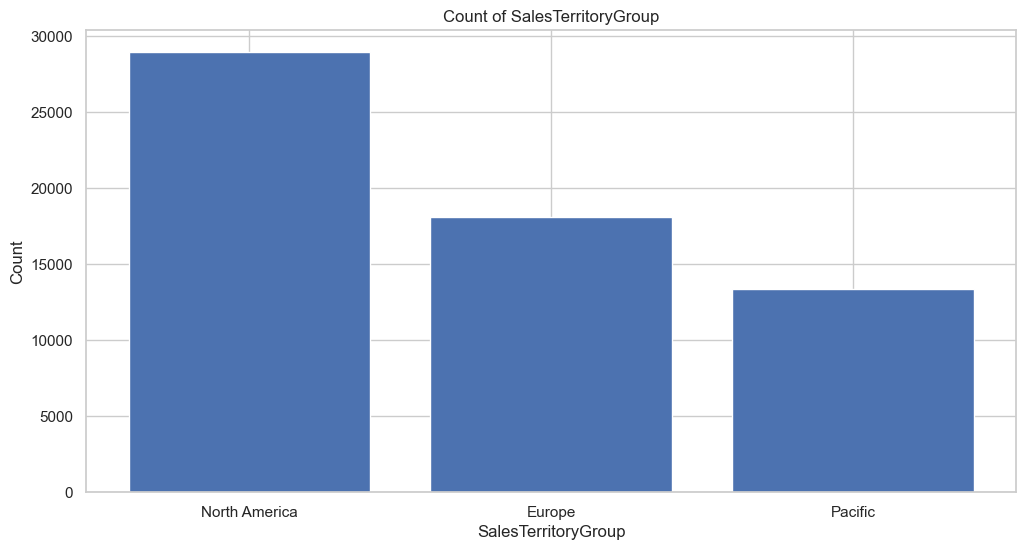

Count Table for StateProvinceName:
+-------------------+-----+
|  StateProvinceName|count|
+-------------------+-----+
|         California|12248|
|   British Columbia| 7584|
|            England| 6906|
|         Washington| 6101|
|    New South Wales| 5839|
|           Victoria| 3343|
|         Queensland| 2903|
|             Oregon| 2876|
|           Saarland| 1403|
|Nordrhein-Westfalen| 1257|
|             Hessen| 1210|
|      Seine (Paris)| 1174|
|            Hamburg|  926|
|    South Australia|  867|
|  Seine Saint Denis|  847|
|               Nord|  844|
|             Bayern|  729|
|     Hauts de Seine|  549|
|            Essonne|  505|
|            Yveline|  484|
+-------------------+-----+
only showing top 20 rows



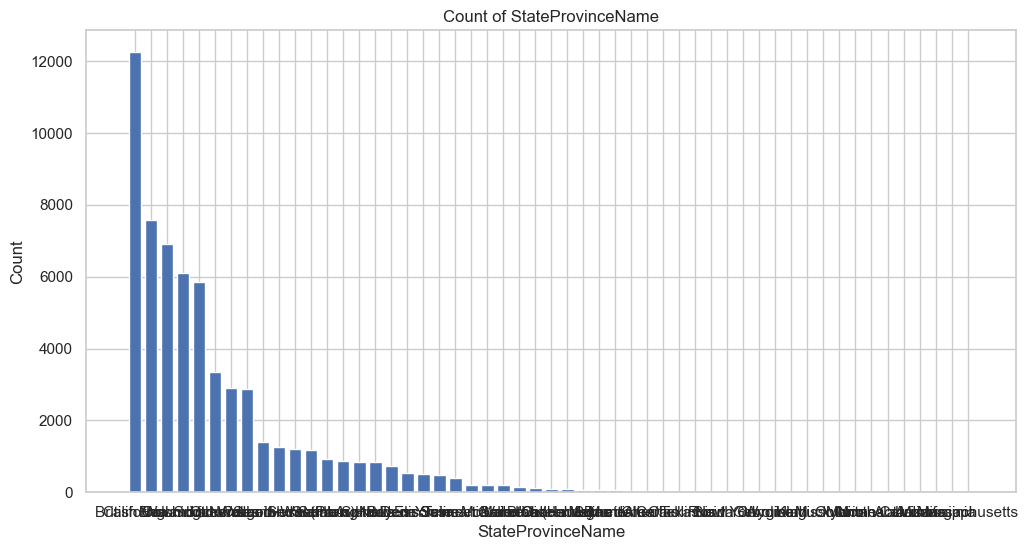

Count Table for EnglishCountryRegionName:
+------------------------+-----+
|EnglishCountryRegionName|count|
+------------------------+-----+
|           United States|21344|
|               Australia|13345|
|                  Canada| 7620|
|          United Kingdom| 6906|
|                 Germany| 5625|
|                  France| 5558|
+------------------------+-----+



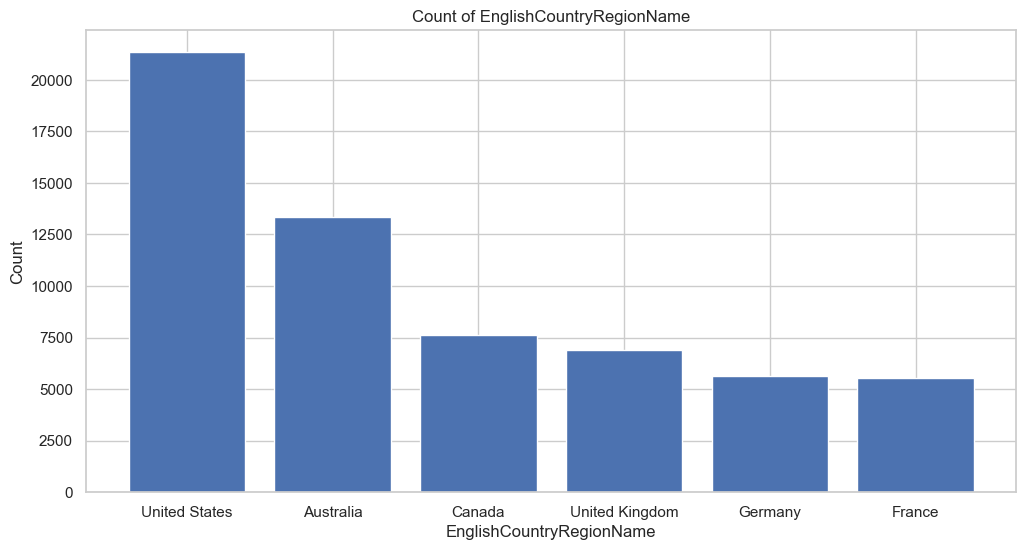

Count Table for City:
+-------------+-----+
|         City|count|
+-------------+-----+
|       London| 1579|
|        Paris| 1174|
|    Cliffside|  918|
|  Chula Vista|  583|
|       Berlin|  583|
|       Burien|  579|
|     Berkeley|  567|
|   Bellingham|  566|
|      Shawnee|  563|
|      Concord|  559|
| N. Vancouver|  552|
|    Beaverton|  547|
|   Bellflower|  537|
|   Burlingame|  535|
|      Burbank|  532|
|      Langley|  516|
|    Metchosin|  503|
| Port Hammond|  502|
|    Bremerton|  494|
|Beverly Hills|  485|
+-------------+-----+
only showing top 20 rows



C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


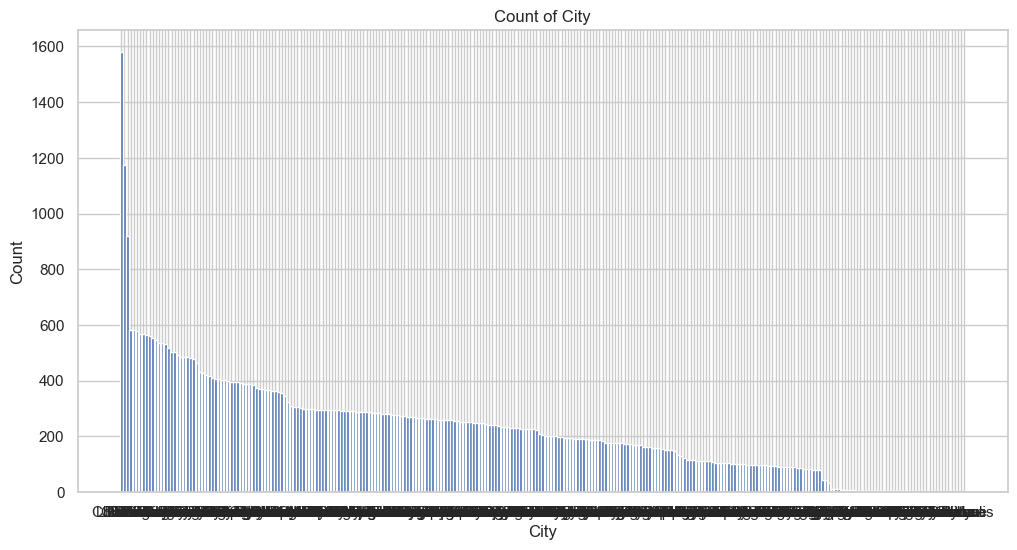

Count Table for OrderYear:
+---------+-----+
|OrderYear|count|
+---------+-----+
|     2013|52801|
|     2012| 3397|
|     2011| 2216|
|     2014| 1970|
|     2010|   14|
+---------+-----+



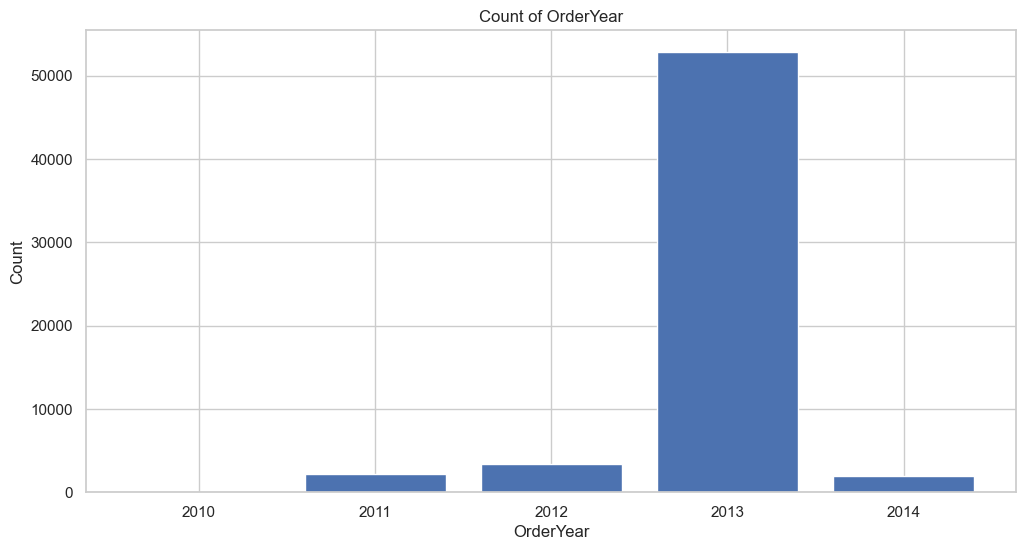

Count Table for OrderMonth:
+----------+-----+
|OrderMonth|count|
+----------+-----+
|        12| 6239|
|        10| 5834|
|        11| 5756|
|         6| 5573|
|         8| 5352|
|         7| 5105|
|         9| 5070|
|         5| 4780|
|         3| 4449|
|         4| 4355|
|         1| 4028|
|         2| 3857|
+----------+-----+



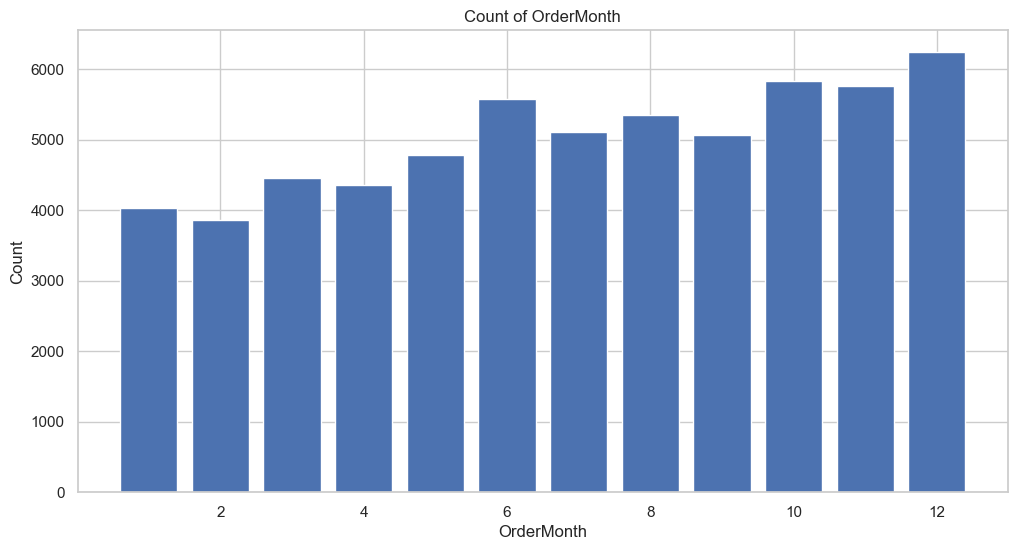

Count Table for DayOfWeek:
+---------+-----+
|DayOfWeek|count|
+---------+-----+
|        3| 8949|
|        2| 8732|
|        1| 8596|
|        4| 8585|
|        5| 8550|
|        6| 8504|
|        7| 8482|
+---------+-----+



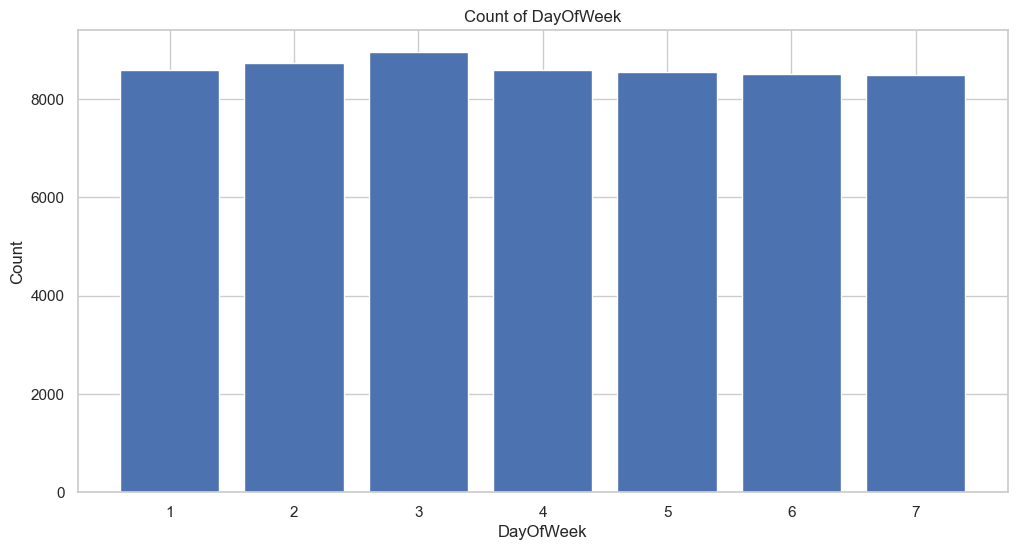

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt


# List of columns to consider
columns_of_interest = [
    'EnglishProductName', 'MaritalStatus', 'Gender', 'TotalChildren', 'NumberChildrenAtHome',
    'CommuteDistance', 'EnglishEducation', 'HouseOwnerFlag', 'NumberCarsOwned',
    'EnglishPromotionName', 'CurrencyName', 'SalesTerritoryRegion', 'SalesTerritoryCountry',
    'SalesTerritoryGroup', 'StateProvinceName', 'EnglishCountryRegionName', 'City',
    'OrderYear', 'OrderMonth', 'DayOfWeek'
]

# Create a count table and bar plot for each column
for column in columns_of_interest:
    # Count table
    count_table = joined_df.groupBy(column).count().orderBy('count', ascending=False)
    
    # Display count table
    print(f"Count Table for {column}:")
    count_table.show()

    # Convert the Spark DataFrame column to a Pandas DataFrame for plotting
    column_data = count_table.toPandas()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(column_data[column], column_data['count'])
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


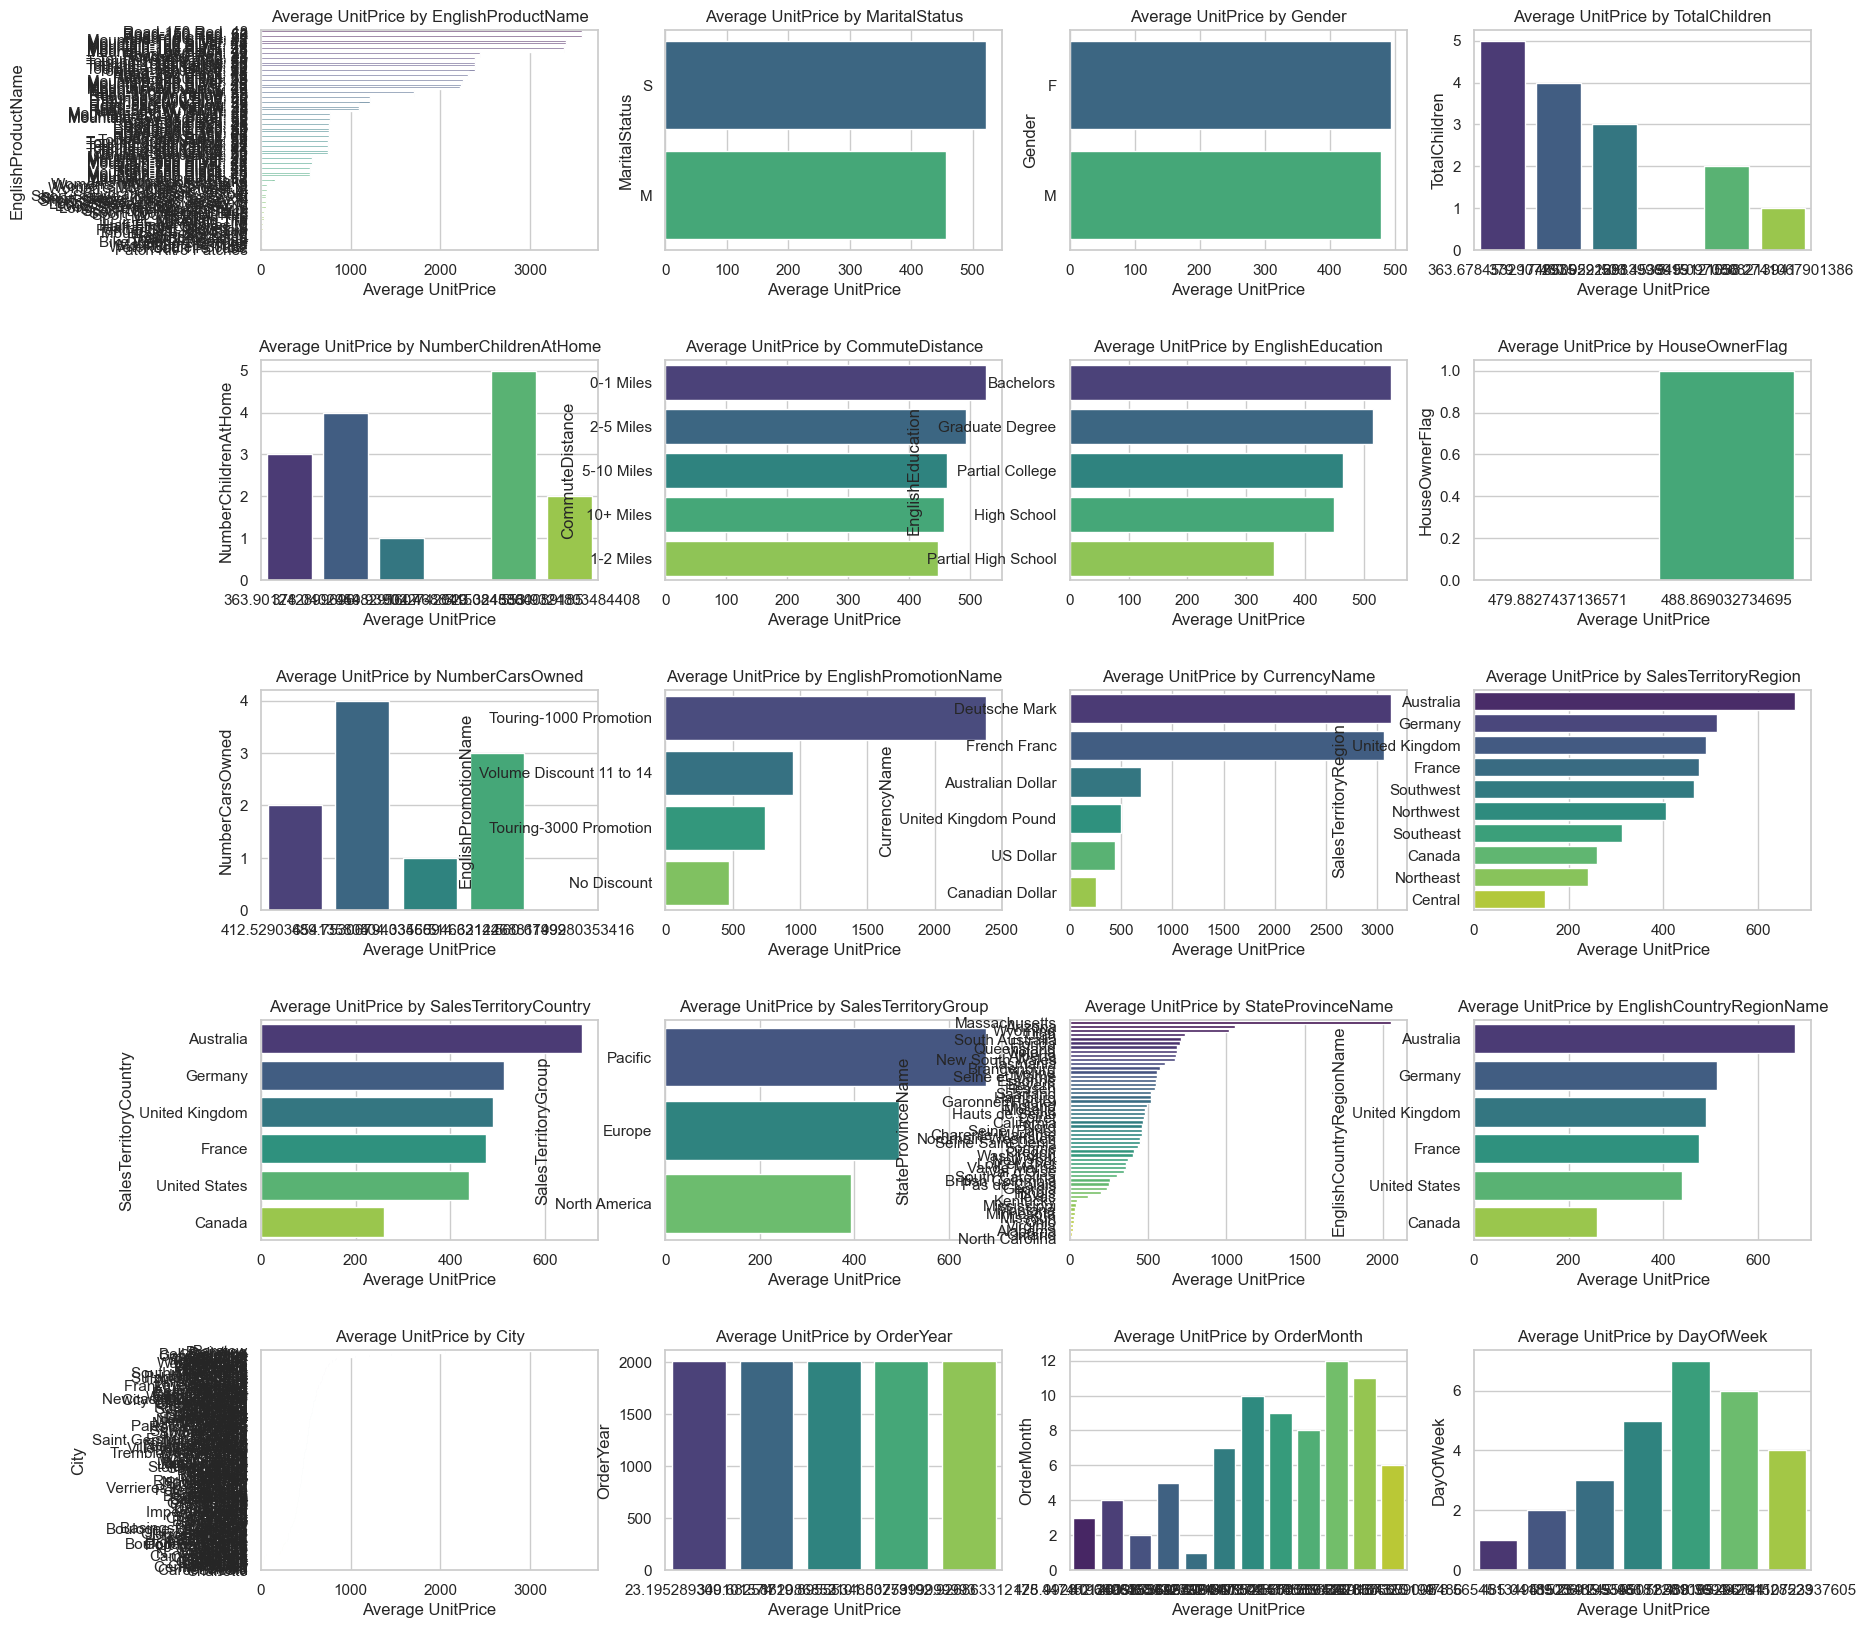

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg



# List of columns for which you want to create bar plots
columns_to_plot = [
    'EnglishProductName', 'MaritalStatus', 'Gender', 'TotalChildren', 'NumberChildrenAtHome',
    'CommuteDistance', 'EnglishEducation', 'HouseOwnerFlag', 'NumberCarsOwned',
    'EnglishPromotionName', 'CurrencyName', 'SalesTerritoryRegion', 'SalesTerritoryCountry',
    'SalesTerritoryGroup', 'StateProvinceName', 'EnglishCountryRegionName', 'City',
    'OrderYear', 'OrderMonth', 'DayOfWeek'
]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through columns and create bar plots
for i, column in enumerate(columns_to_plot):
    # Calculate the average UnitPrice for each unique value in the column
    average_price_by_column = joined_df.groupBy(column).agg(avg("UnitPrice").alias("AverageUnitPrice"))

    # Convert PySpark DataFrame to Pandas DataFrame
    average_price_by_column_pd = average_price_by_column.toPandas()

    # Sort the Pandas DataFrame by AverageUnitPrice in descending order
    average_price_by_column_pd = average_price_by_column_pd.sort_values(by='AverageUnitPrice', ascending=False)

    # Create a bar plot
    sns.barplot(ax=axes[i], x='AverageUnitPrice', y=column, data=average_price_by_column_pd, palette='viridis')
    axes[i].set_title(f'Average UnitPrice by {column}')
    axes[i].set_xlabel('Average UnitPrice')
    axes[i].set_ylabel(column)

# Show the plots
plt.show()


Table for EnglishProductName:
        EnglishProductName  AverageUnitPrice
99        Road-150 Red, 48           3578.27
54        Road-150 Red, 62           3578.27
110       Road-150 Red, 56           3578.27
64        Road-150 Red, 44           3578.27
106       Road-150 Red, 52           3578.27
..                     ...               ...
43       Touring Tire Tube              4.99
107     Mountain Tire Tube              4.99
29   Water Bottle - 30 oz.              4.99
122         Road Tire Tube              3.99
38     Patch Kit/8 Patches              2.29

[130 rows x 2 columns]


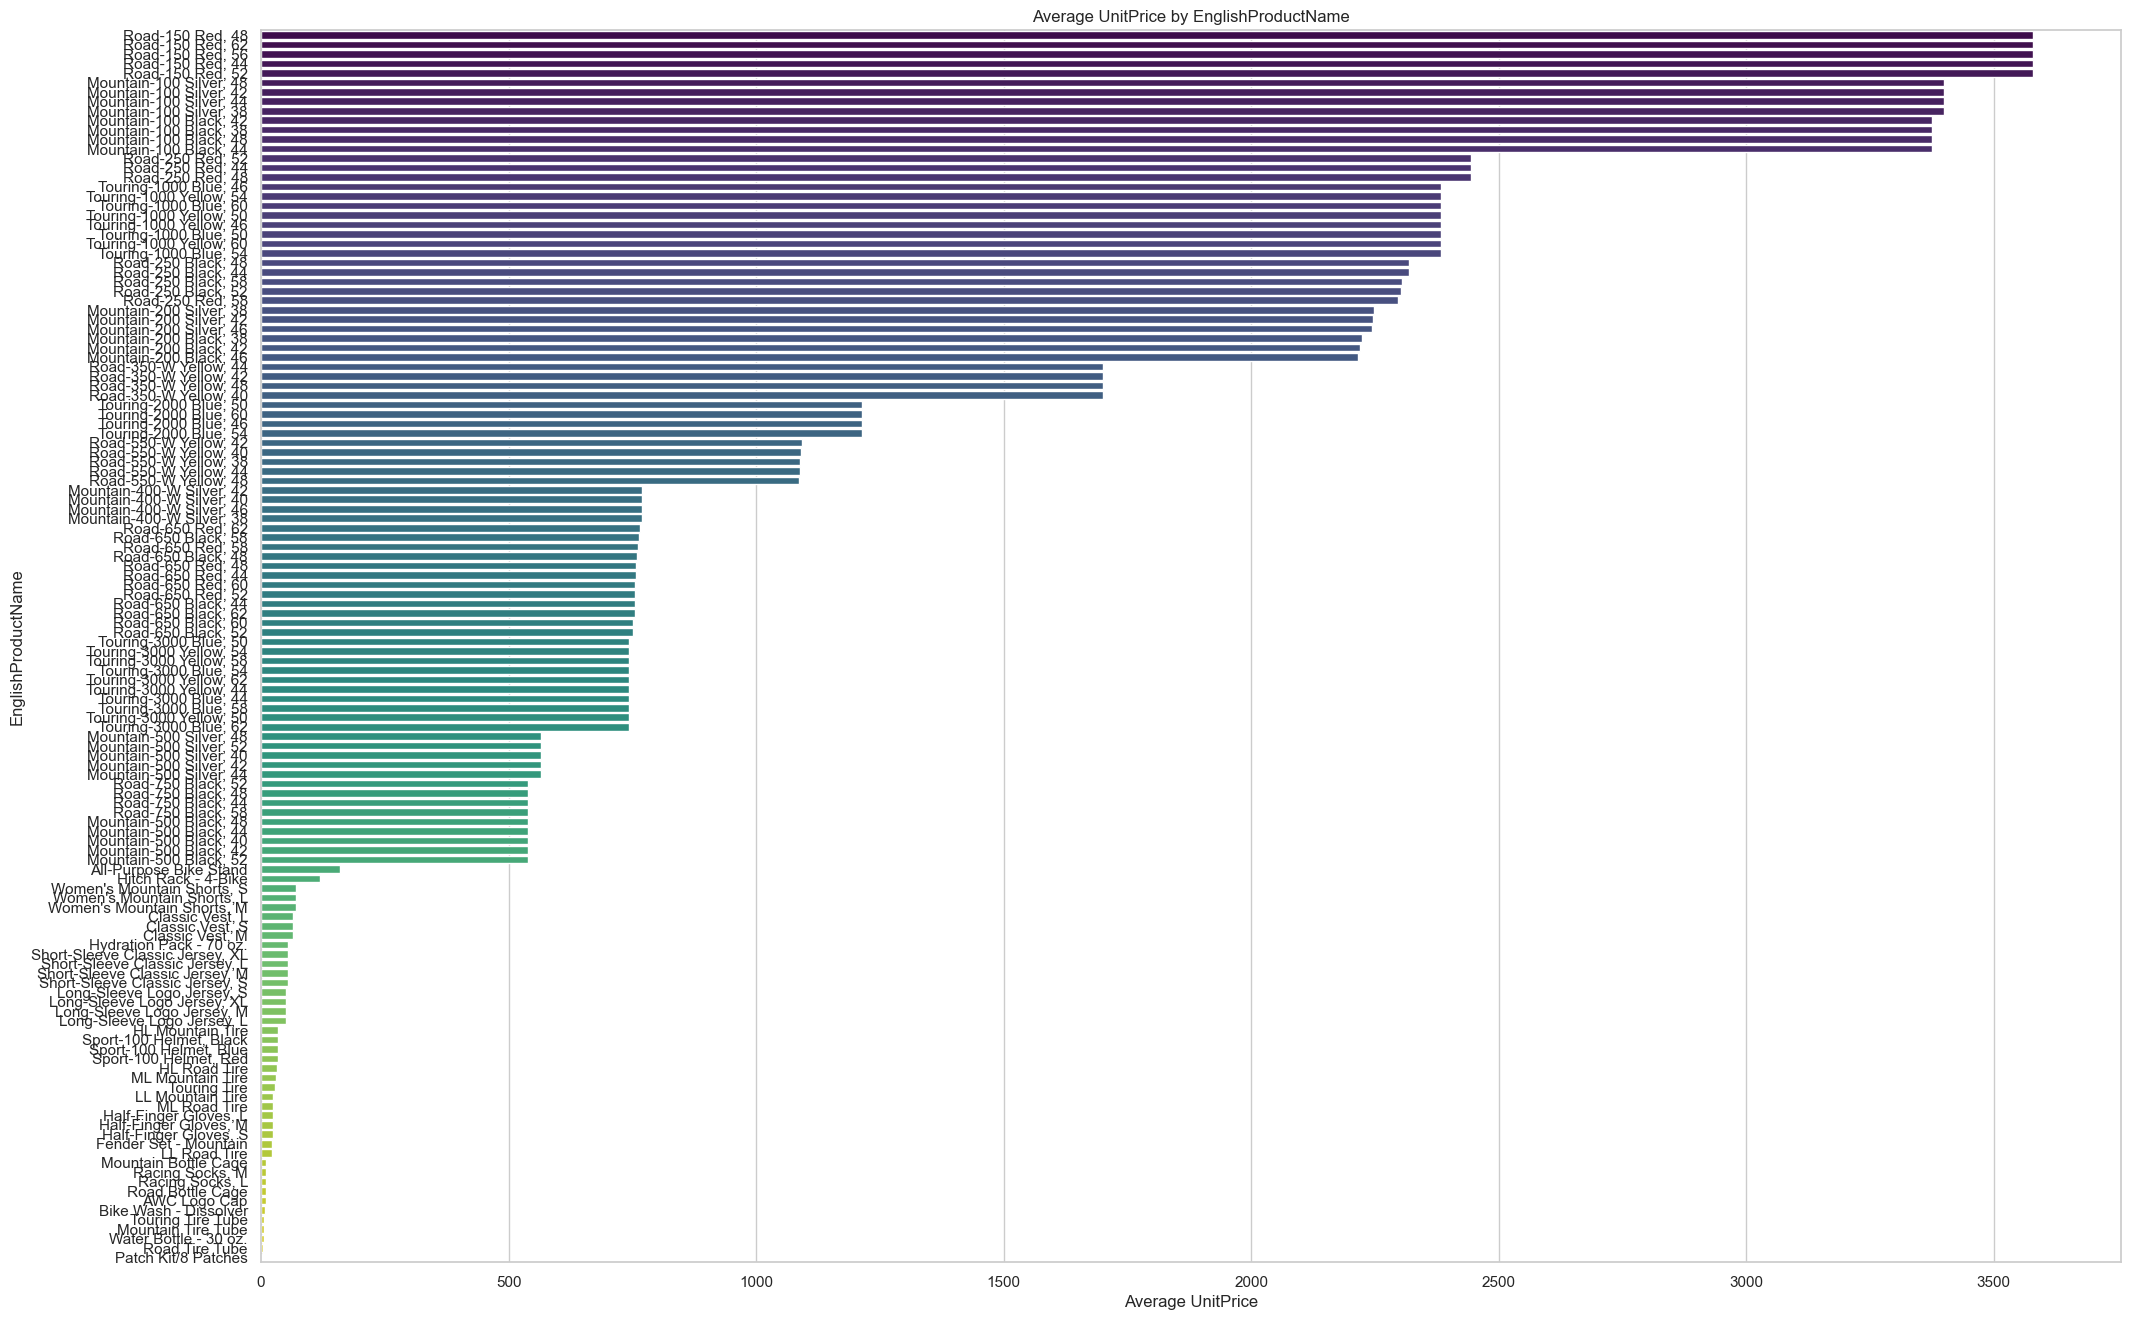

Table for MaritalStatus:
  MaritalStatus  AverageUnitPrice
1             S        522.444294
0             M        456.447442


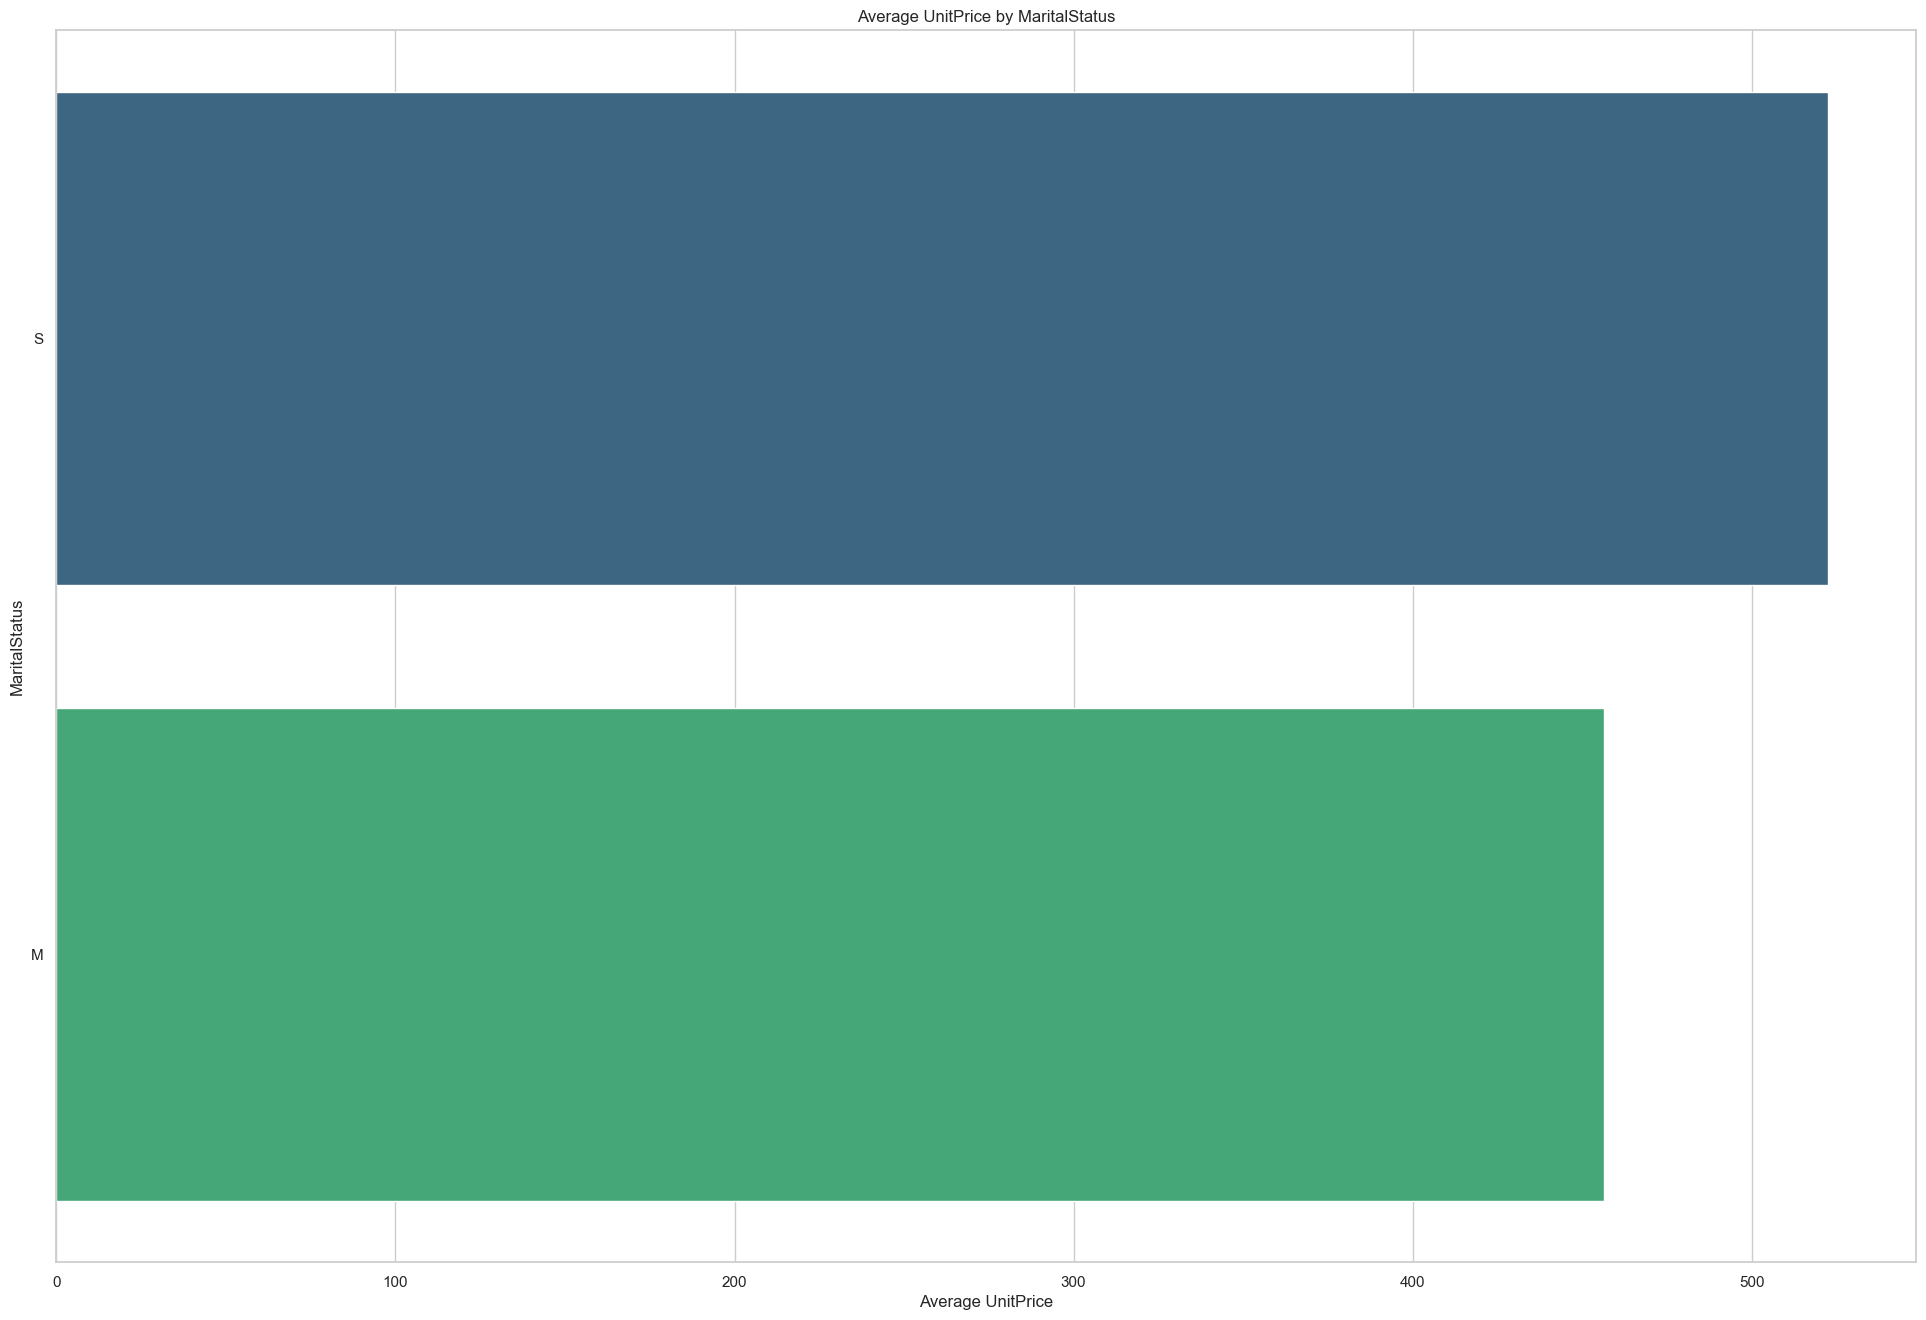

Table for Gender:
  Gender  AverageUnitPrice
0      F        493.507635
1      M        478.755095


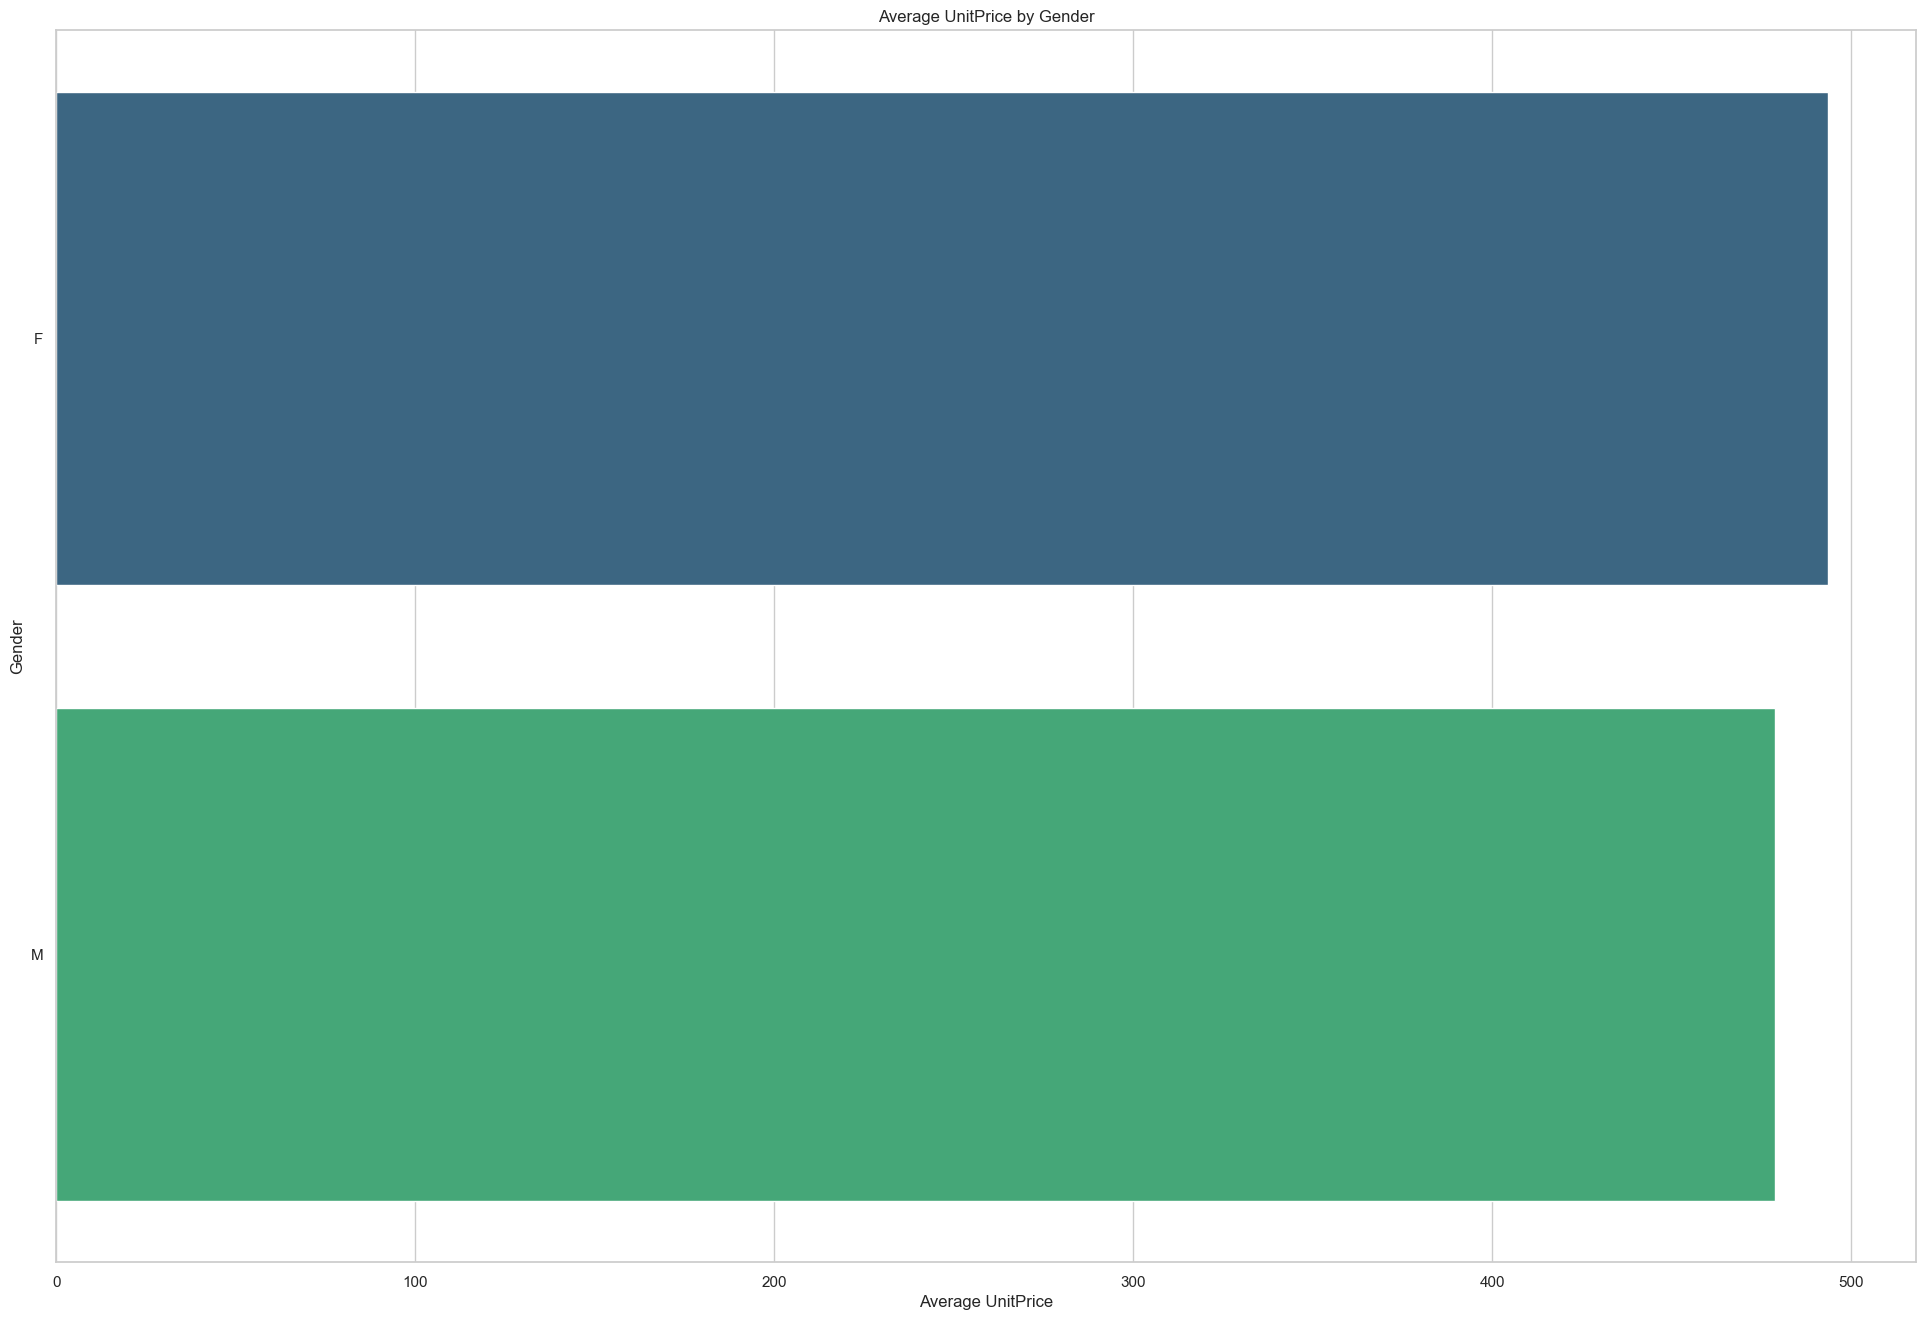

Table for TotalChildren:
   TotalChildren  AverageUnitPrice
0              1        550.274107
4              2        515.097087
5              0        506.453950
1              3        480.052130
3              4        379.174651
2              5        363.678453


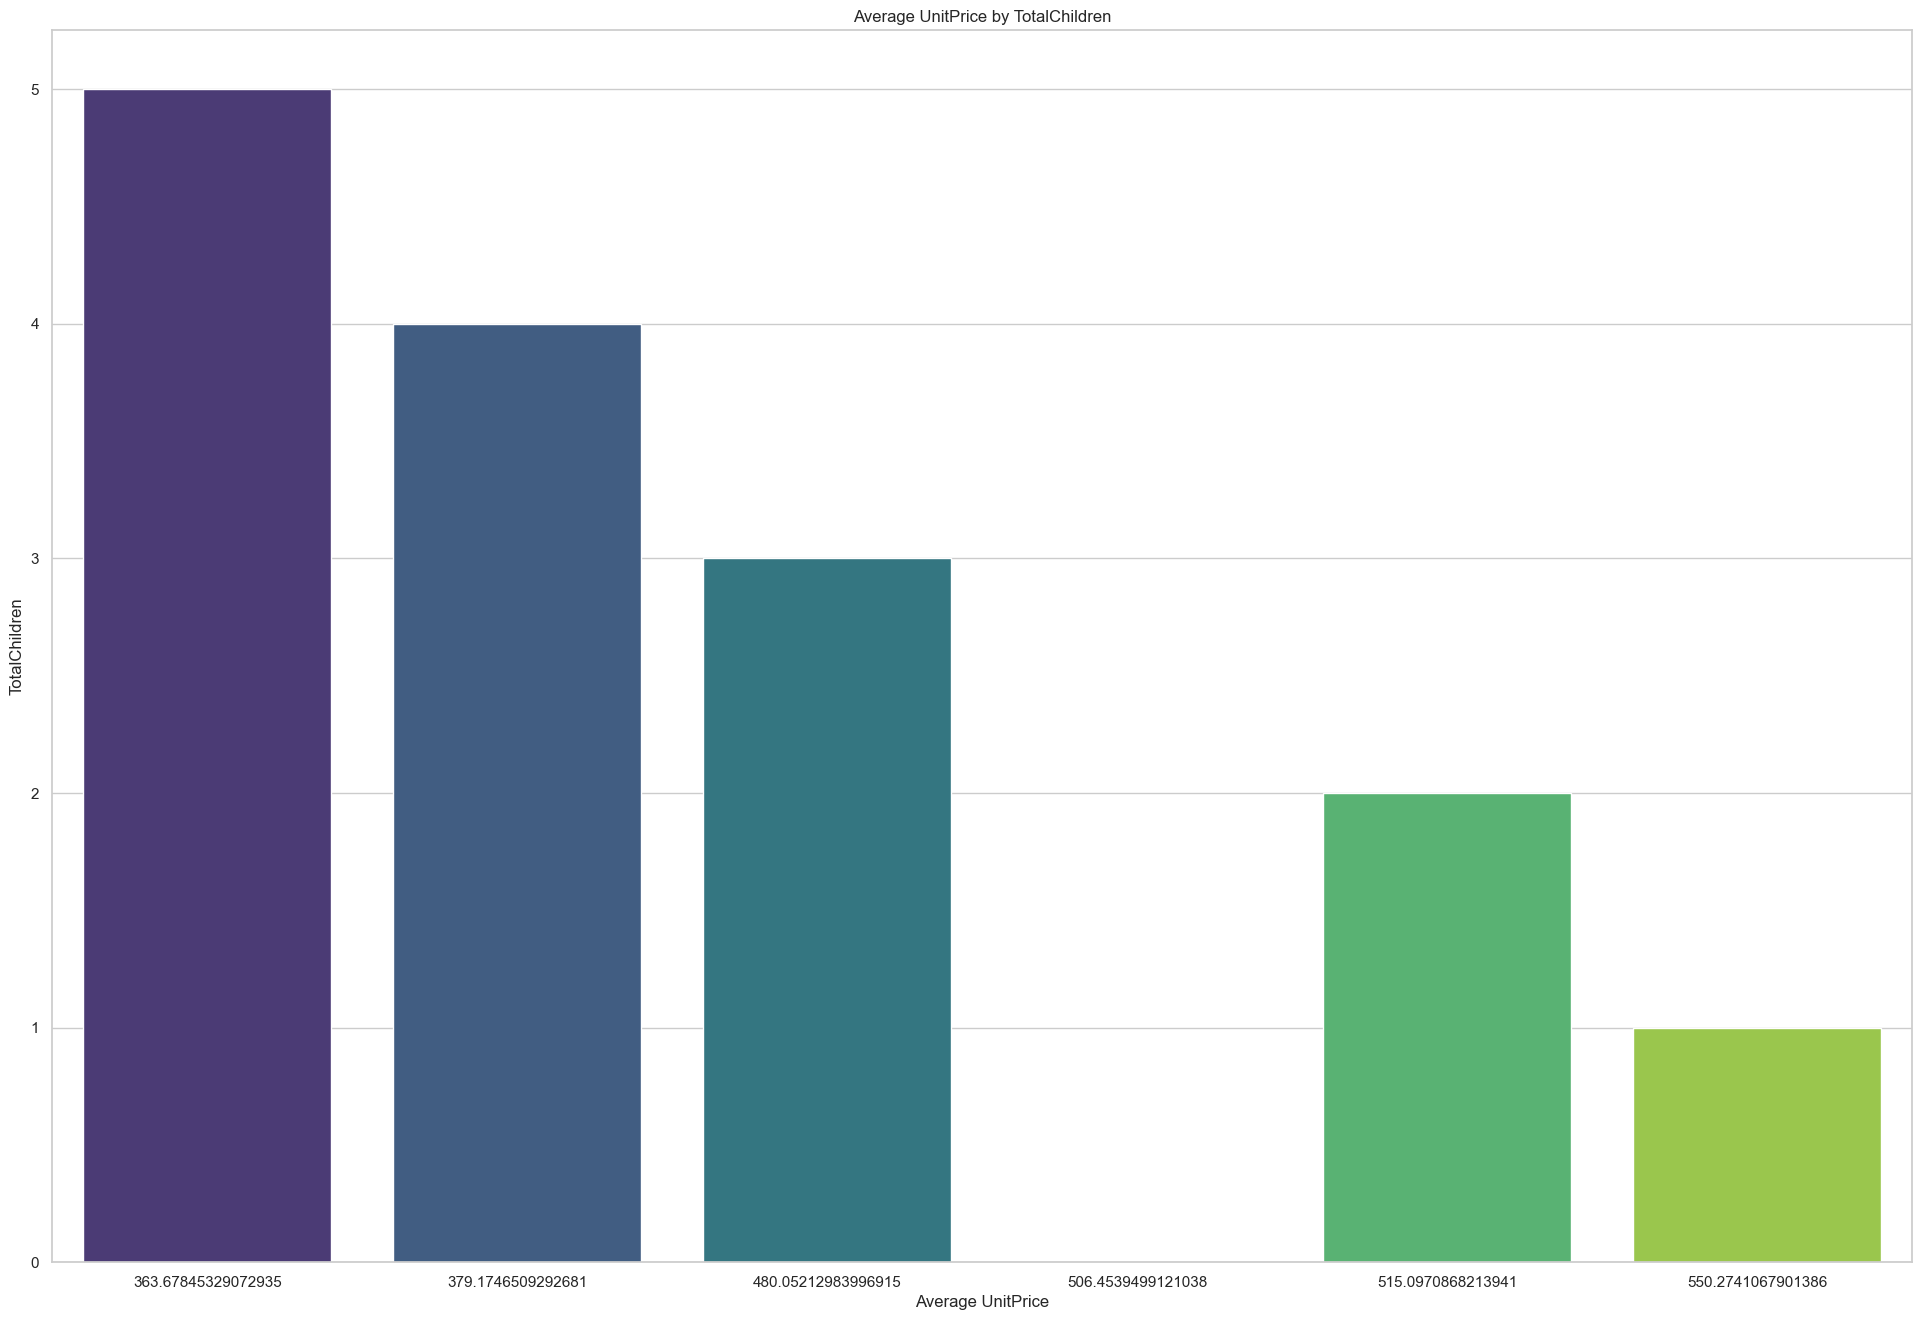

Table for NumberChildrenAtHome:
   NumberChildrenAtHome  AverageUnitPrice
4                     2        553.932480
2                     5        523.324838
5                     0        504.468842
0                     1        459.939023
3                     4        378.040204
1                     3        363.901243


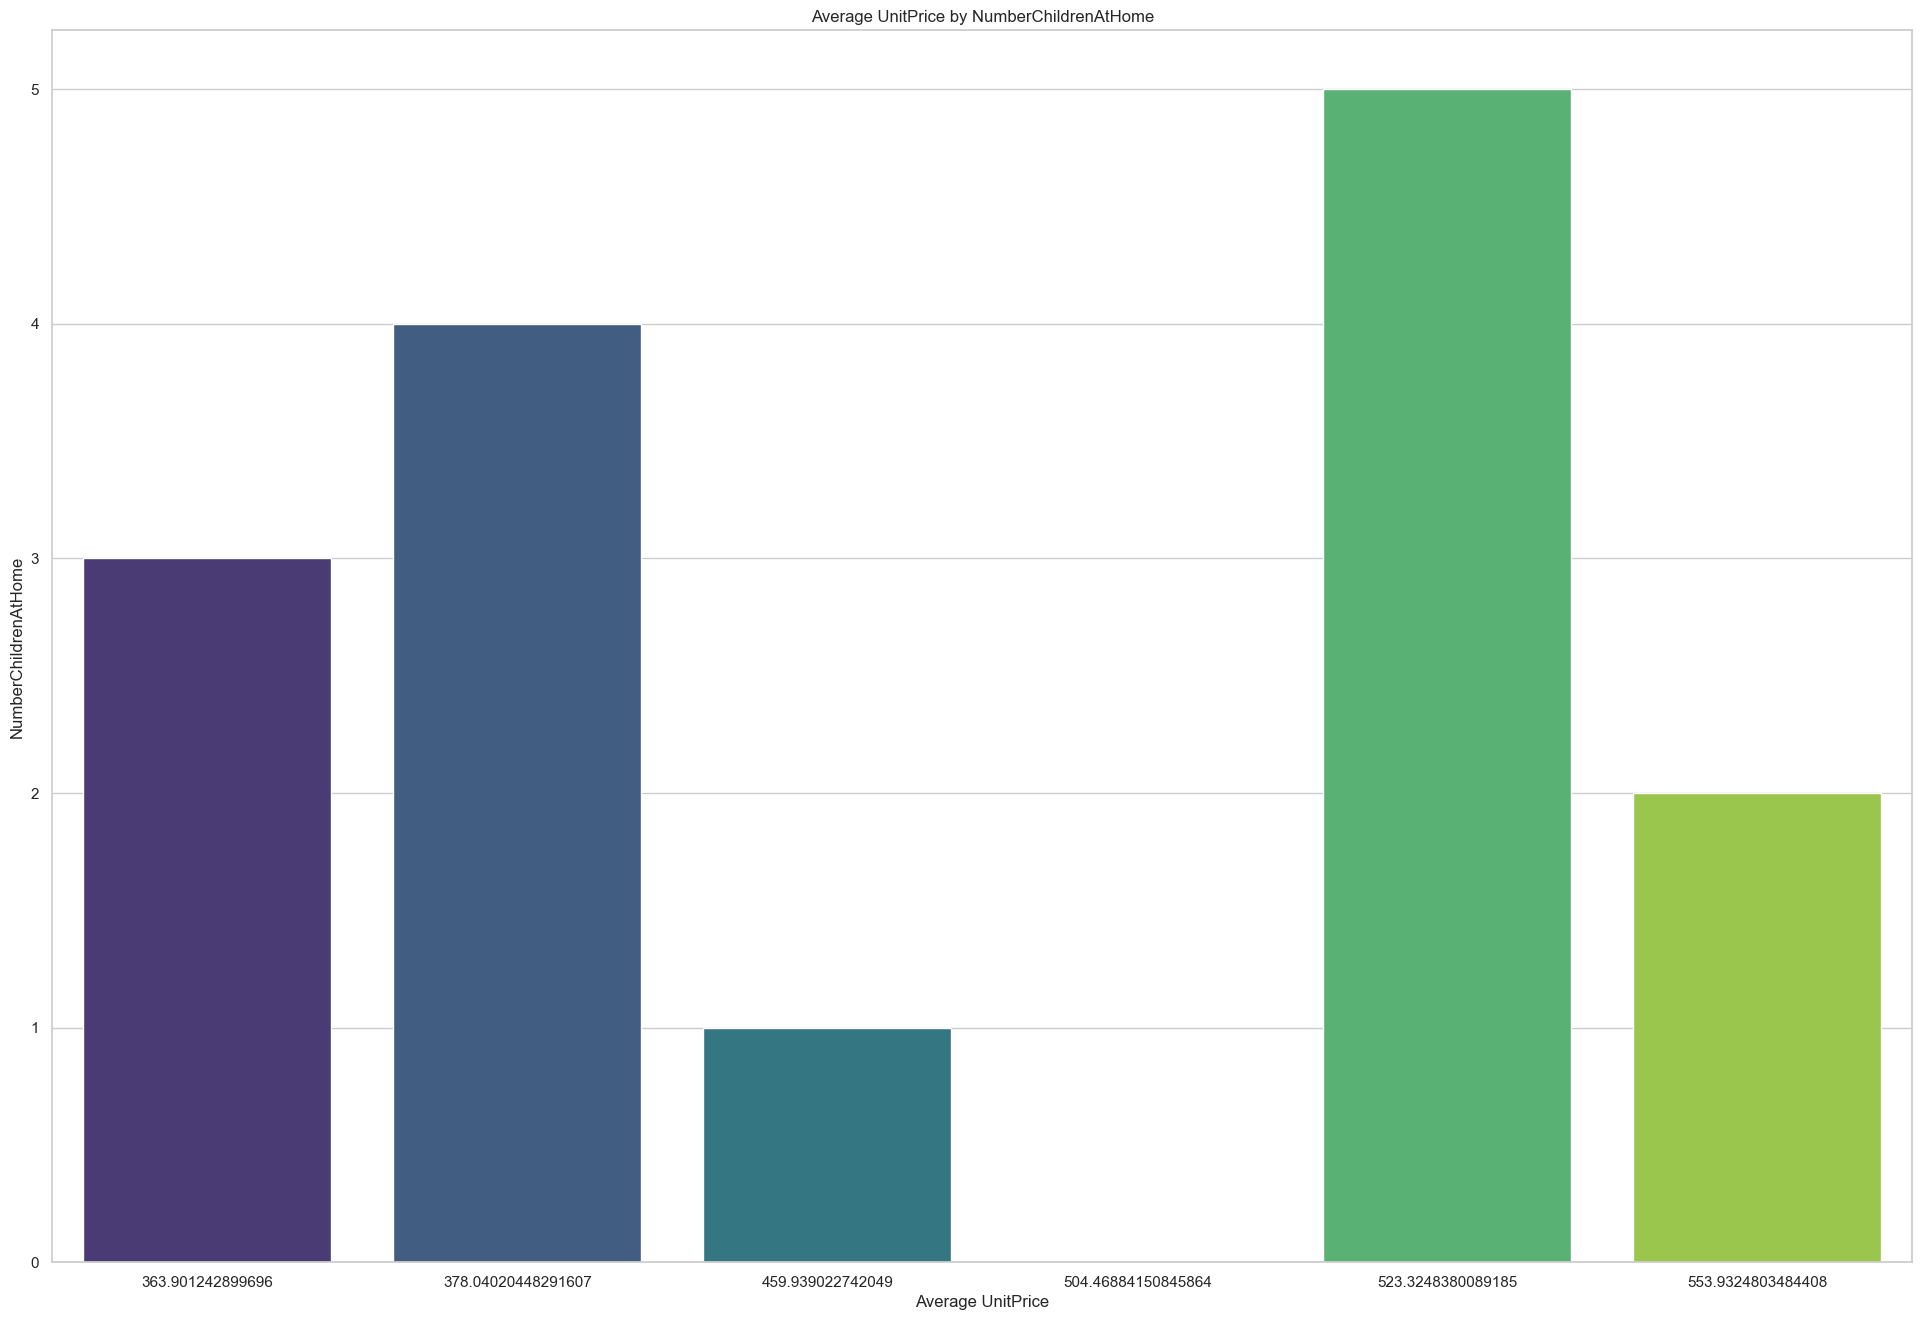

Table for CommuteDistance:
  CommuteDistance  AverageUnitPrice
0       0-1 Miles        526.005173
2       2-5 Miles        492.415156
3      5-10 Miles        460.965430
1       10+ Miles        456.192455
4       1-2 Miles        446.569140


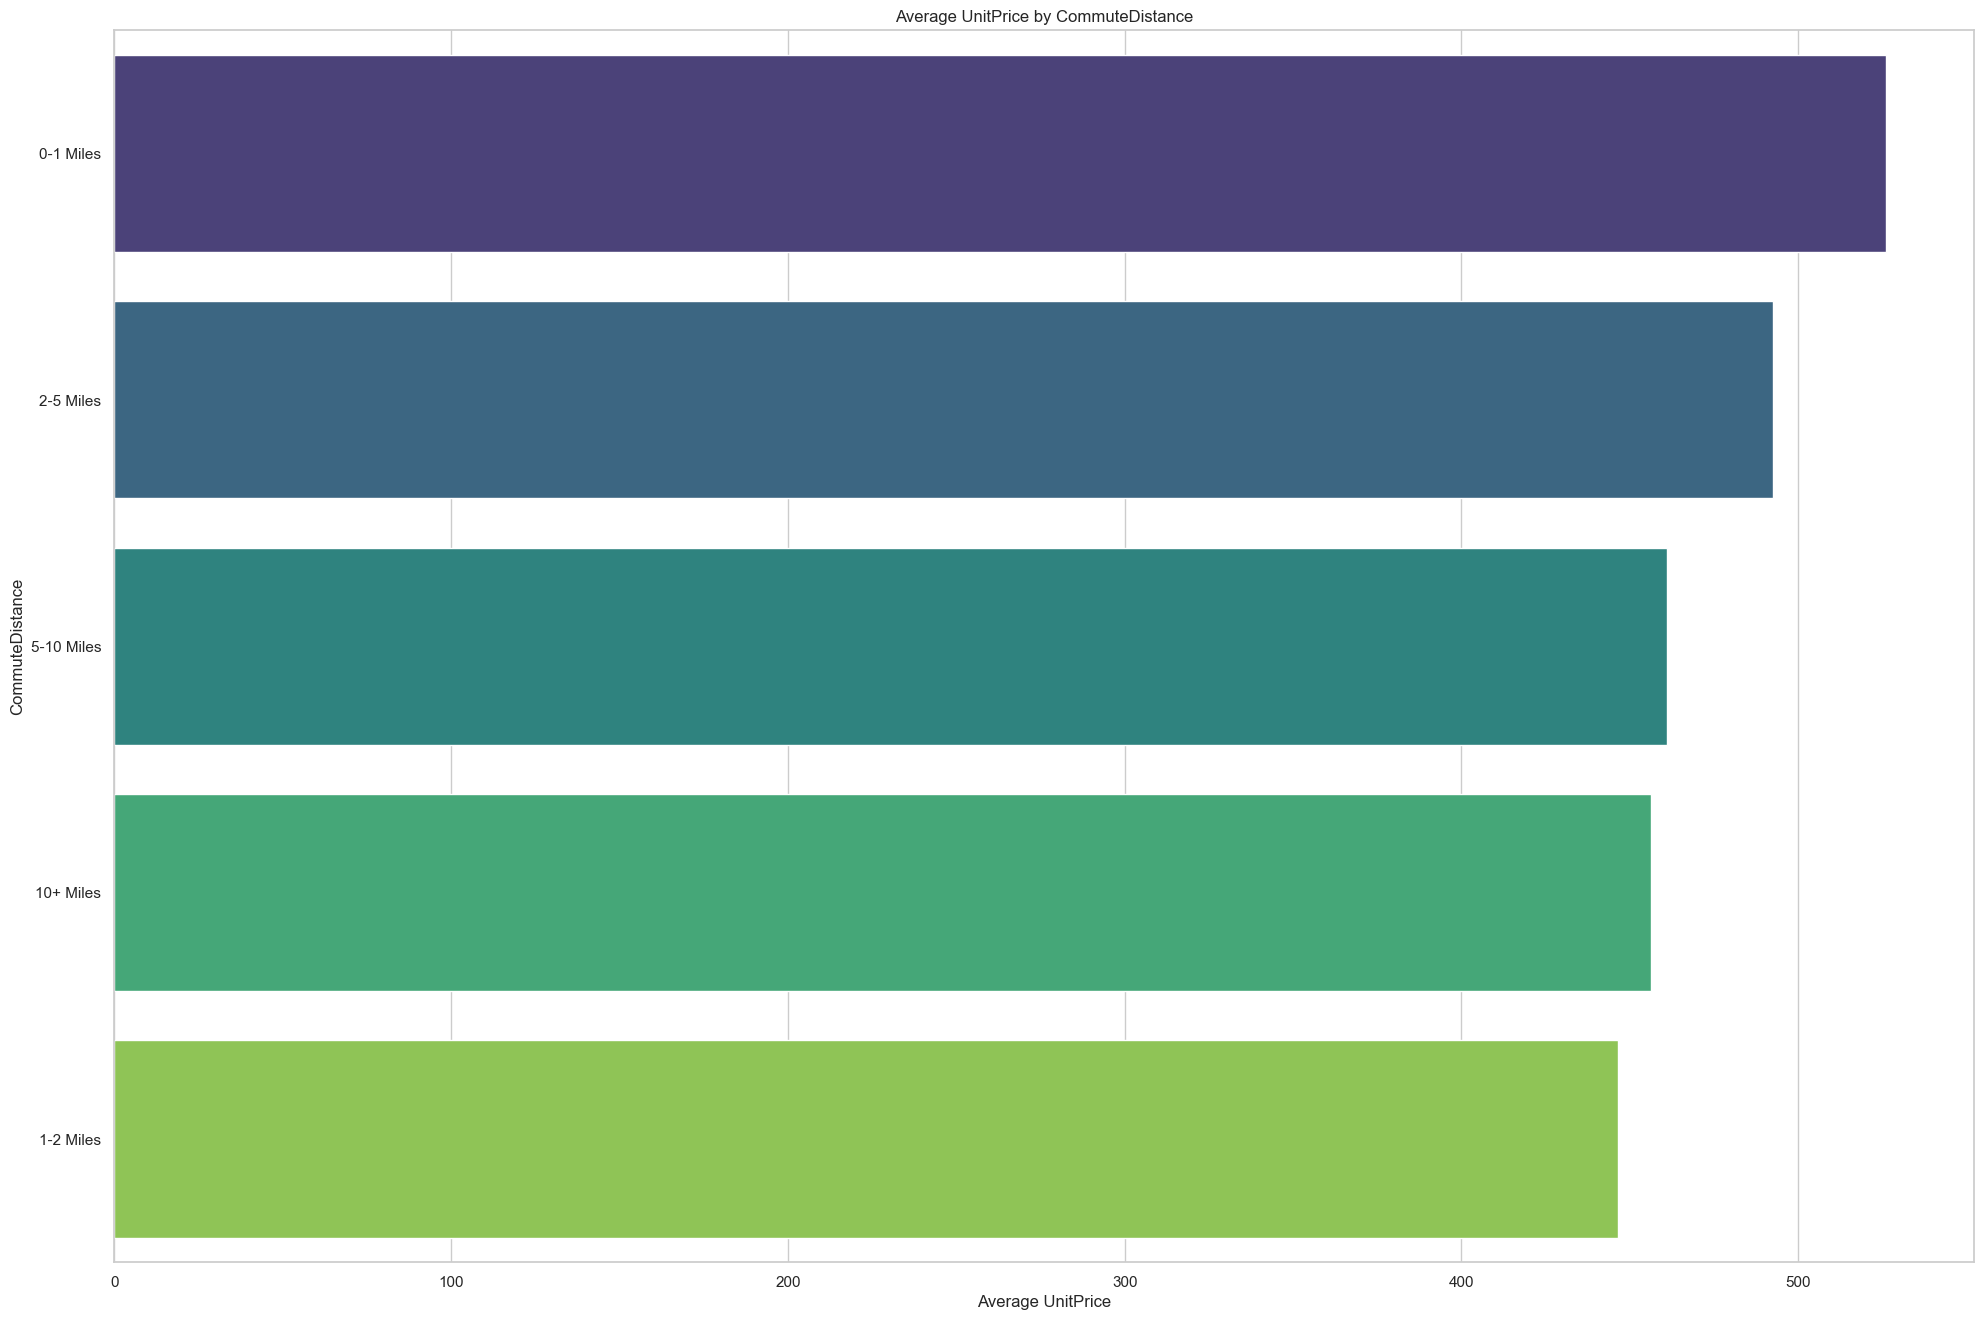

Table for EnglishEducation:
      EnglishEducation  AverageUnitPrice
4            Bachelors        545.642789
2      Graduate Degree        515.001438
3      Partial College        464.629903
0          High School        449.421131
1  Partial High School        347.579707


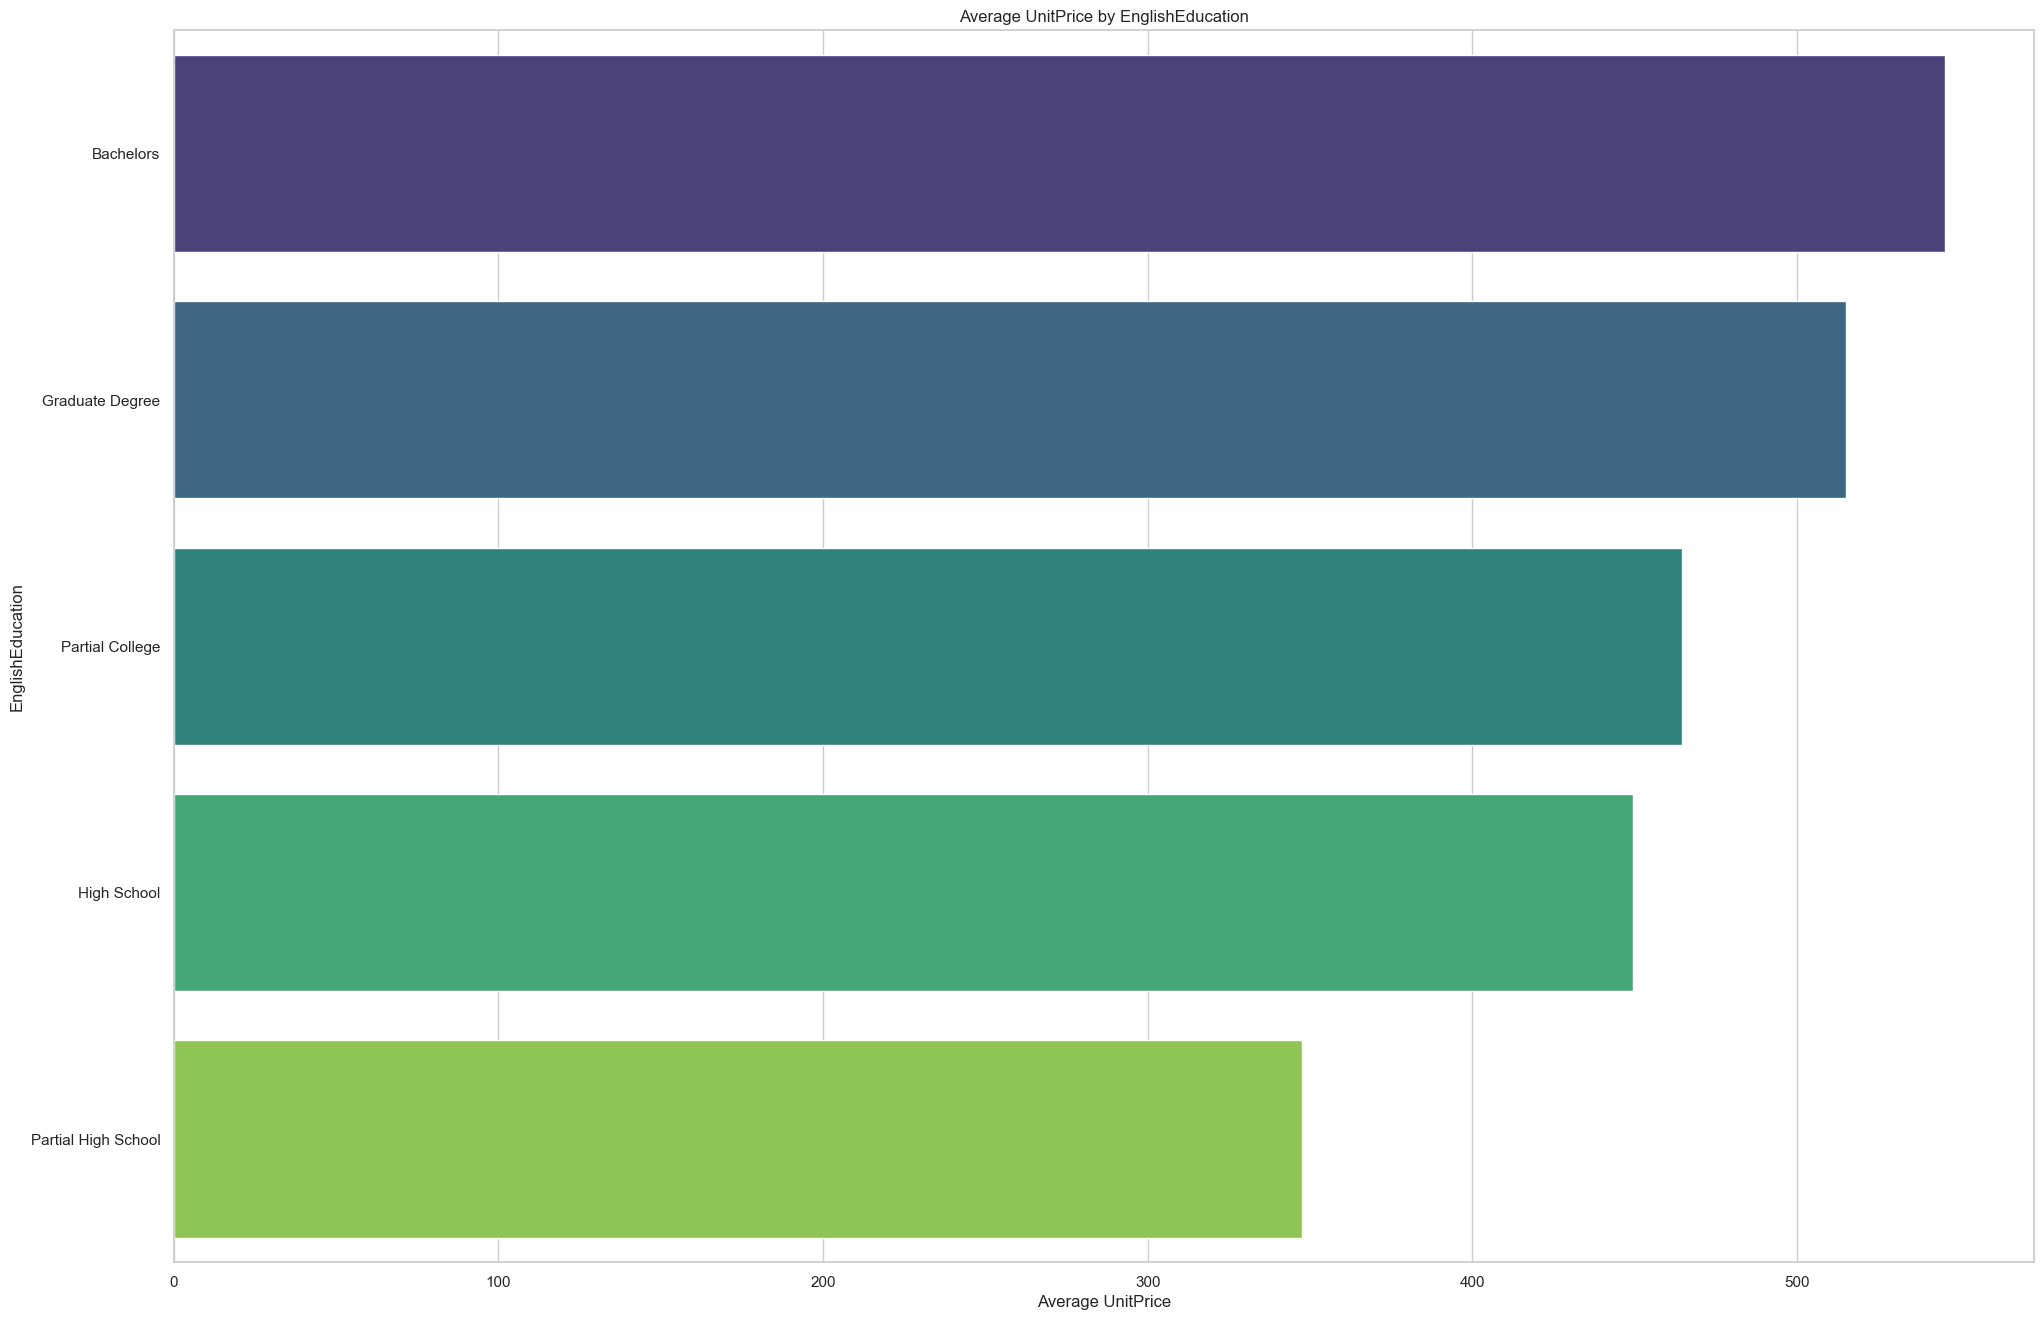

Table for HouseOwnerFlag:
   HouseOwnerFlag  AverageUnitPrice
0               1        488.869033
1               0        479.882744


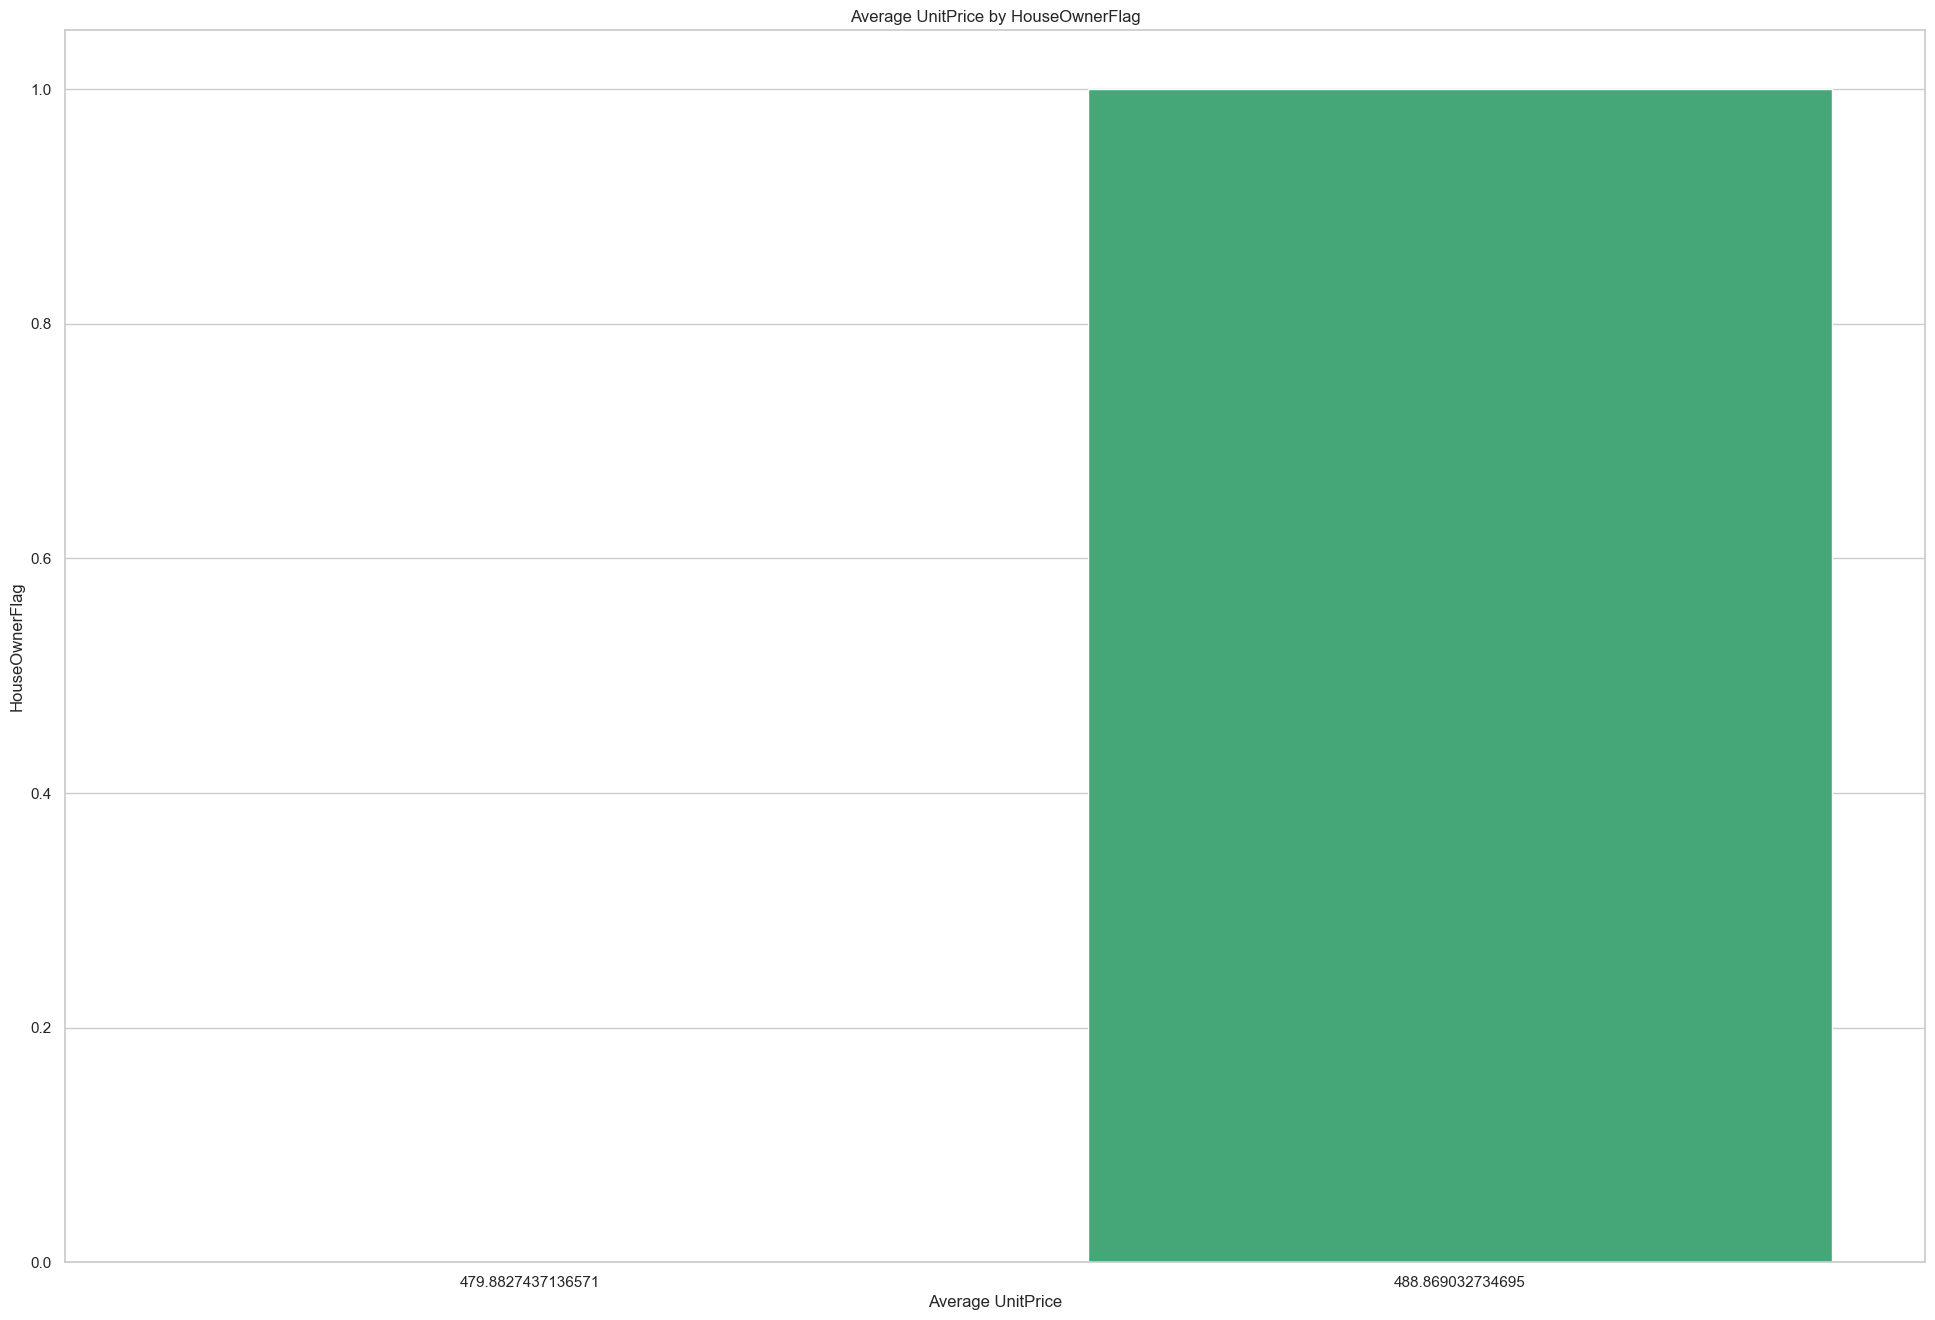

Table for NumberCarsOwned:
   NumberCarsOwned  AverageUnitPrice
4                0        560.679928
1                3        514.321427
0                1        504.034569
2                4        489.753068
3                2        412.529037


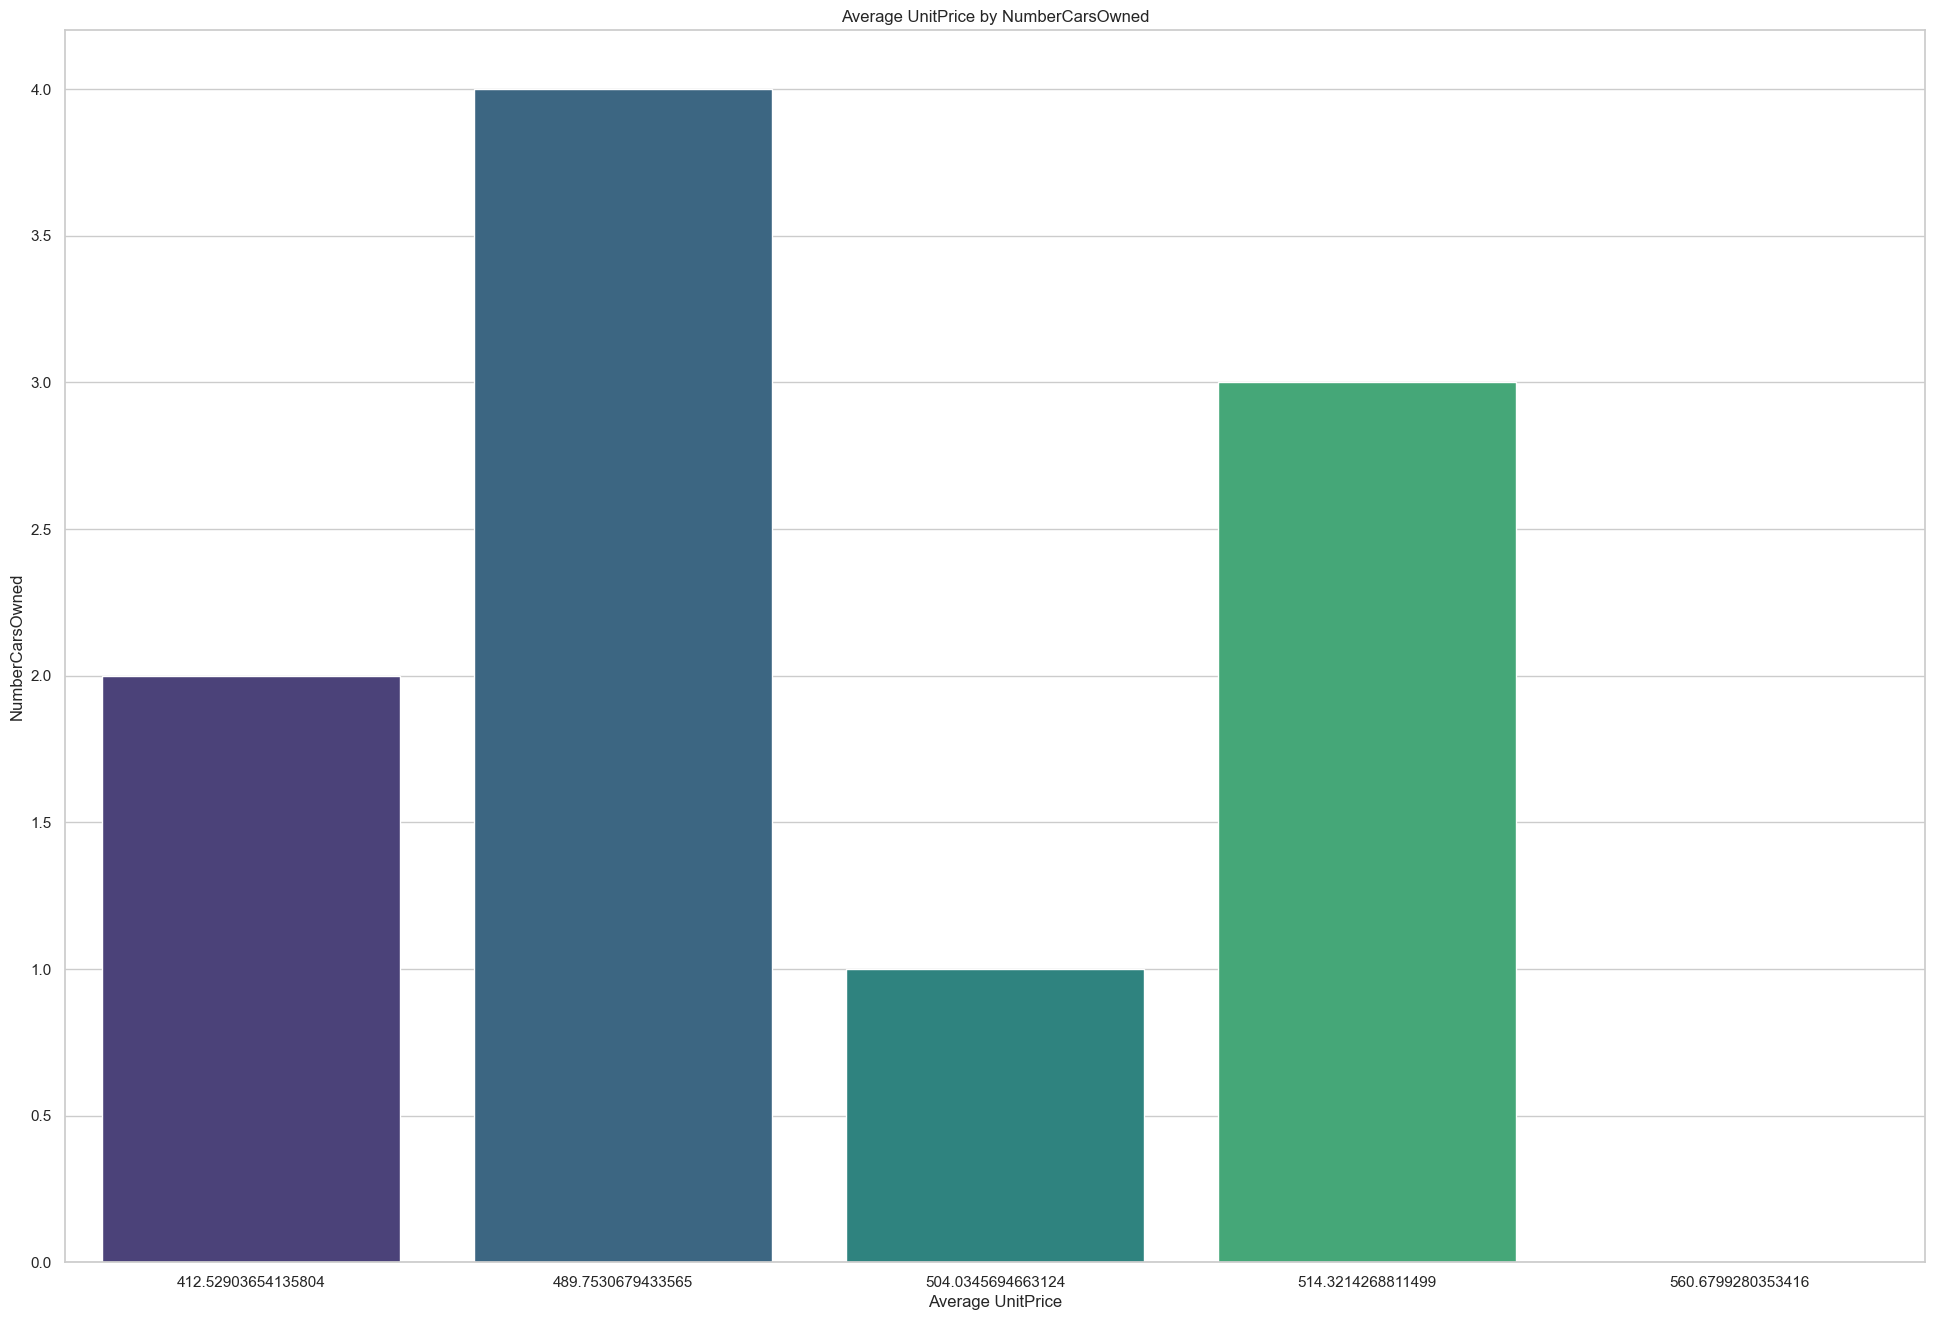

Table for EnglishPromotionName:
       EnglishPromotionName  AverageUnitPrice
3    Touring-1000 Promotion       2384.070000
2  Volume Discount 11 to 14        946.756482
1    Touring-3000 Promotion        742.350000
0               No Discount        468.824267


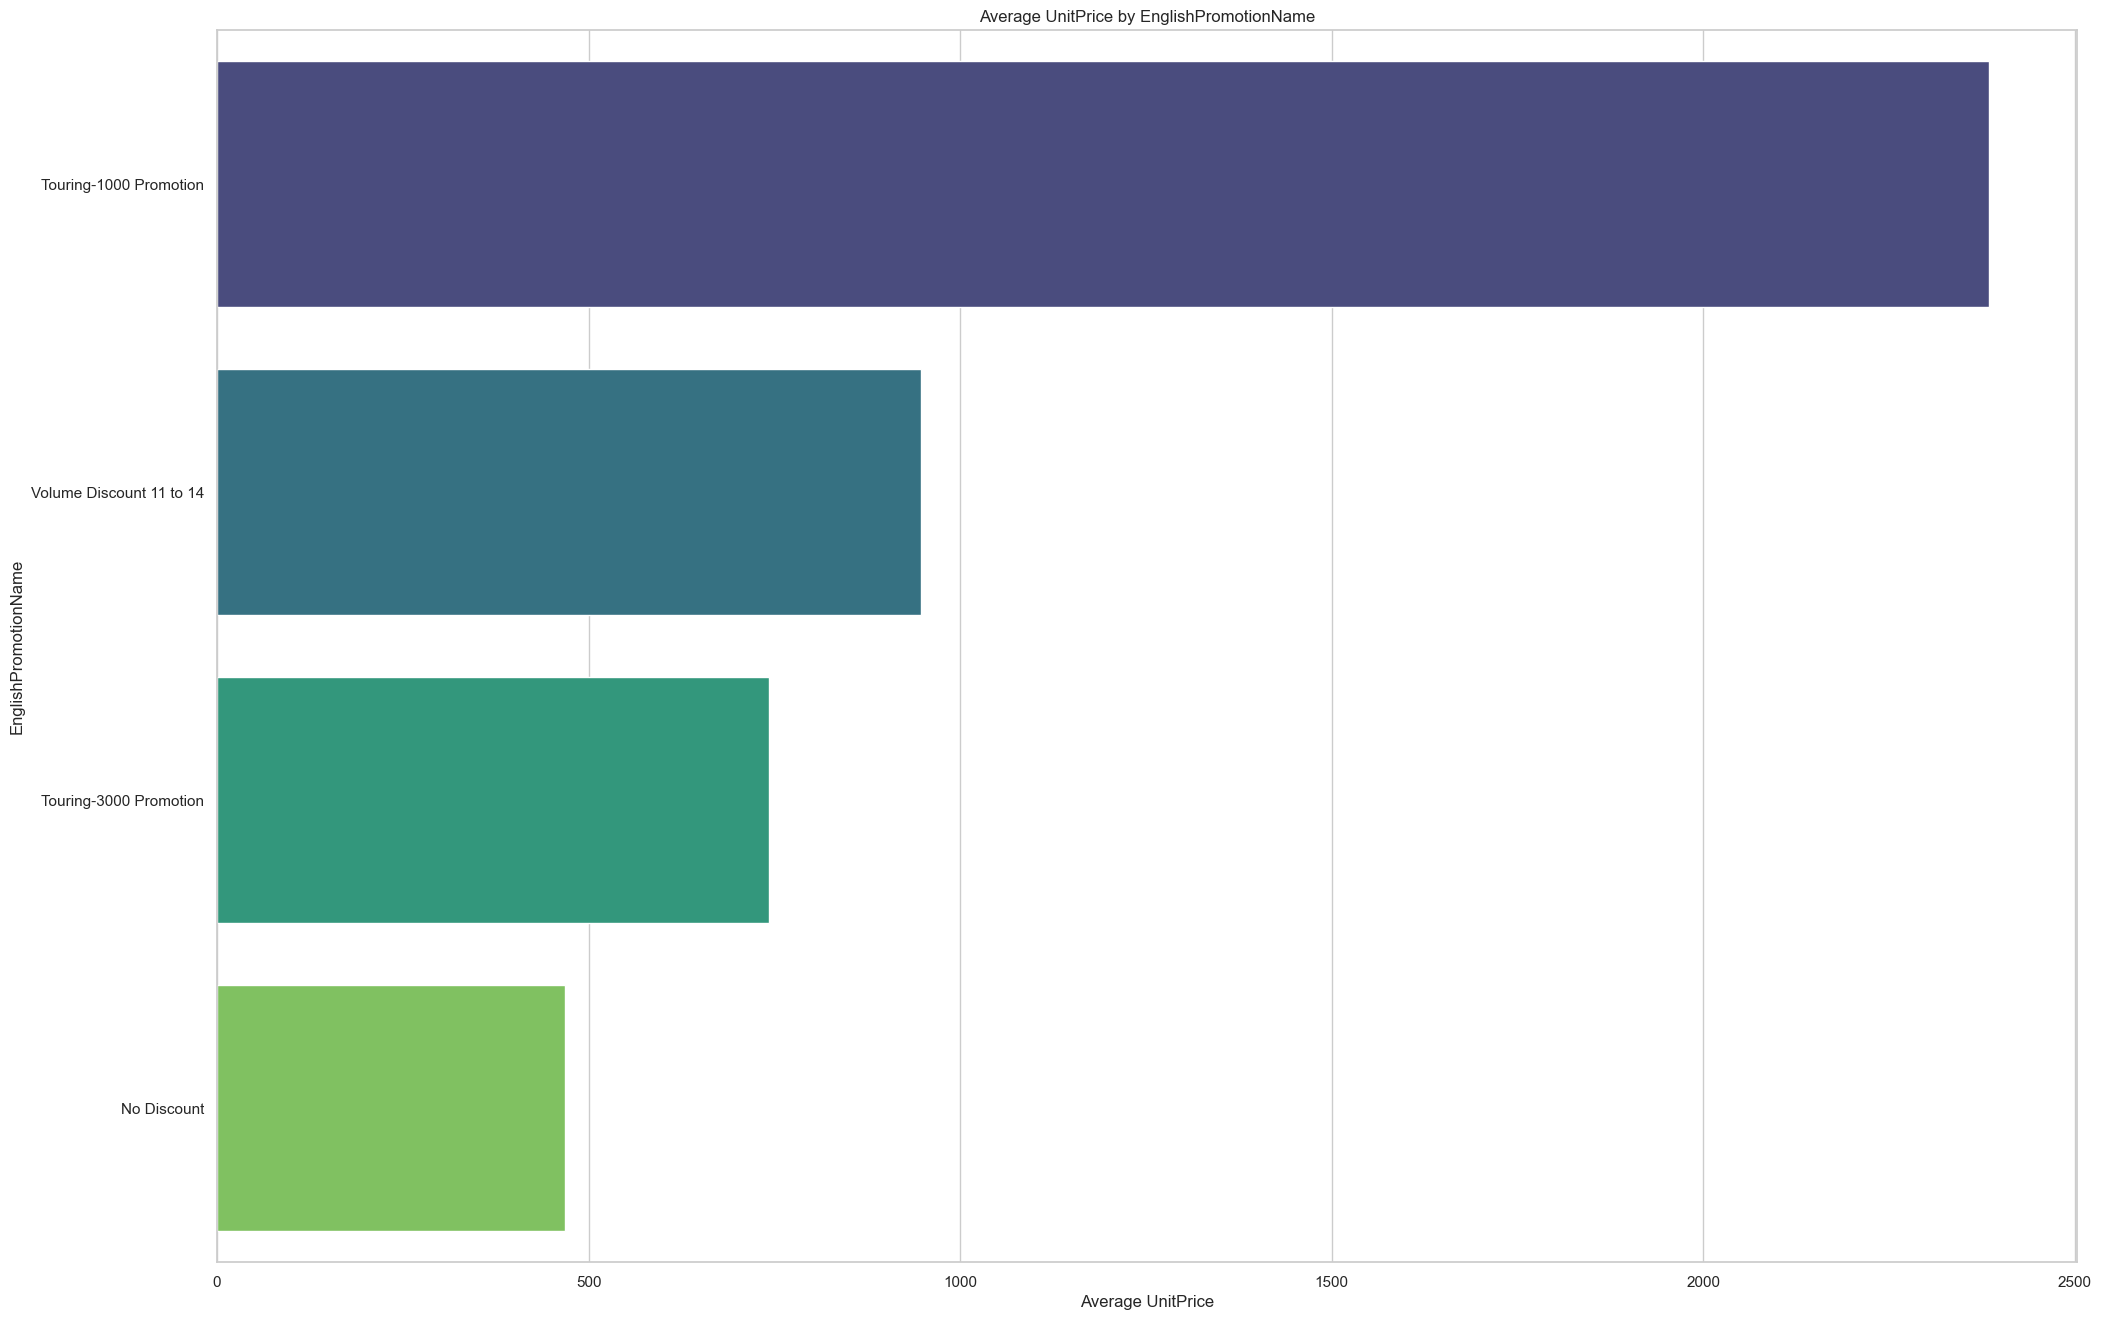

Table for CurrencyName:
           CurrencyName  AverageUnitPrice
4         Deutsche Mark       3128.749871
1          French Franc       3060.537153
0     Australian Dollar        696.950114
3  United Kingdom Pound        502.722506
5             US Dollar        439.924111
2       Canadian Dollar        253.190952


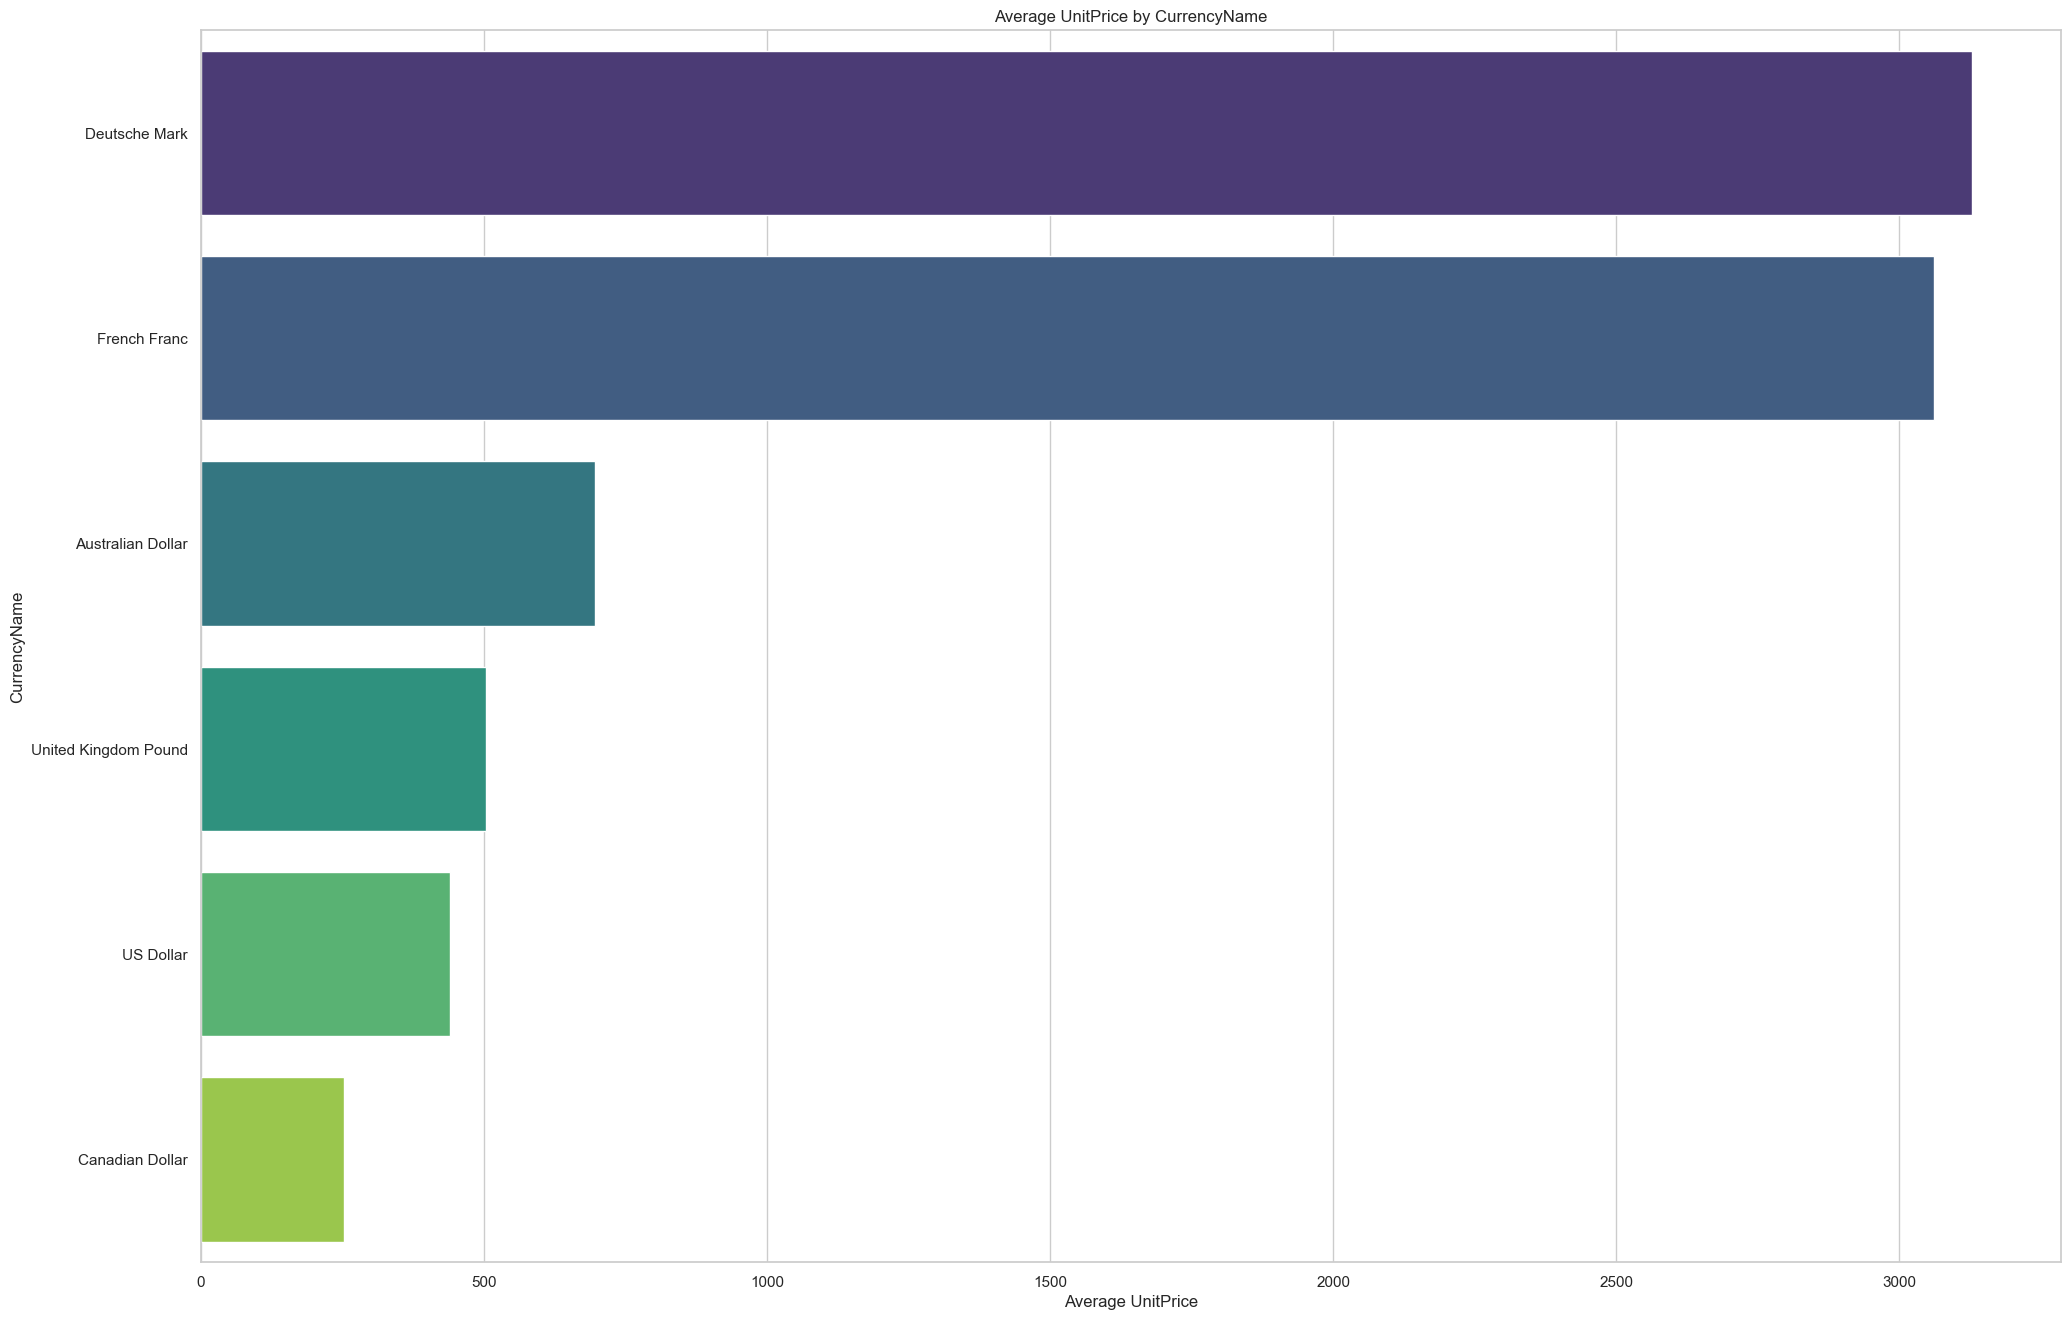

Table for SalesTerritoryRegion:
  SalesTerritoryRegion  AverageUnitPrice
7            Australia        678.980936
0              Germany        514.544416
8       United Kingdom        491.125429
1               France        475.713874
6            Southwest        466.216944
2            Northwest        405.856394
3            Southeast        313.816656
5               Canada        259.559693
9            Northeast        241.943267
4              Central        150.041480


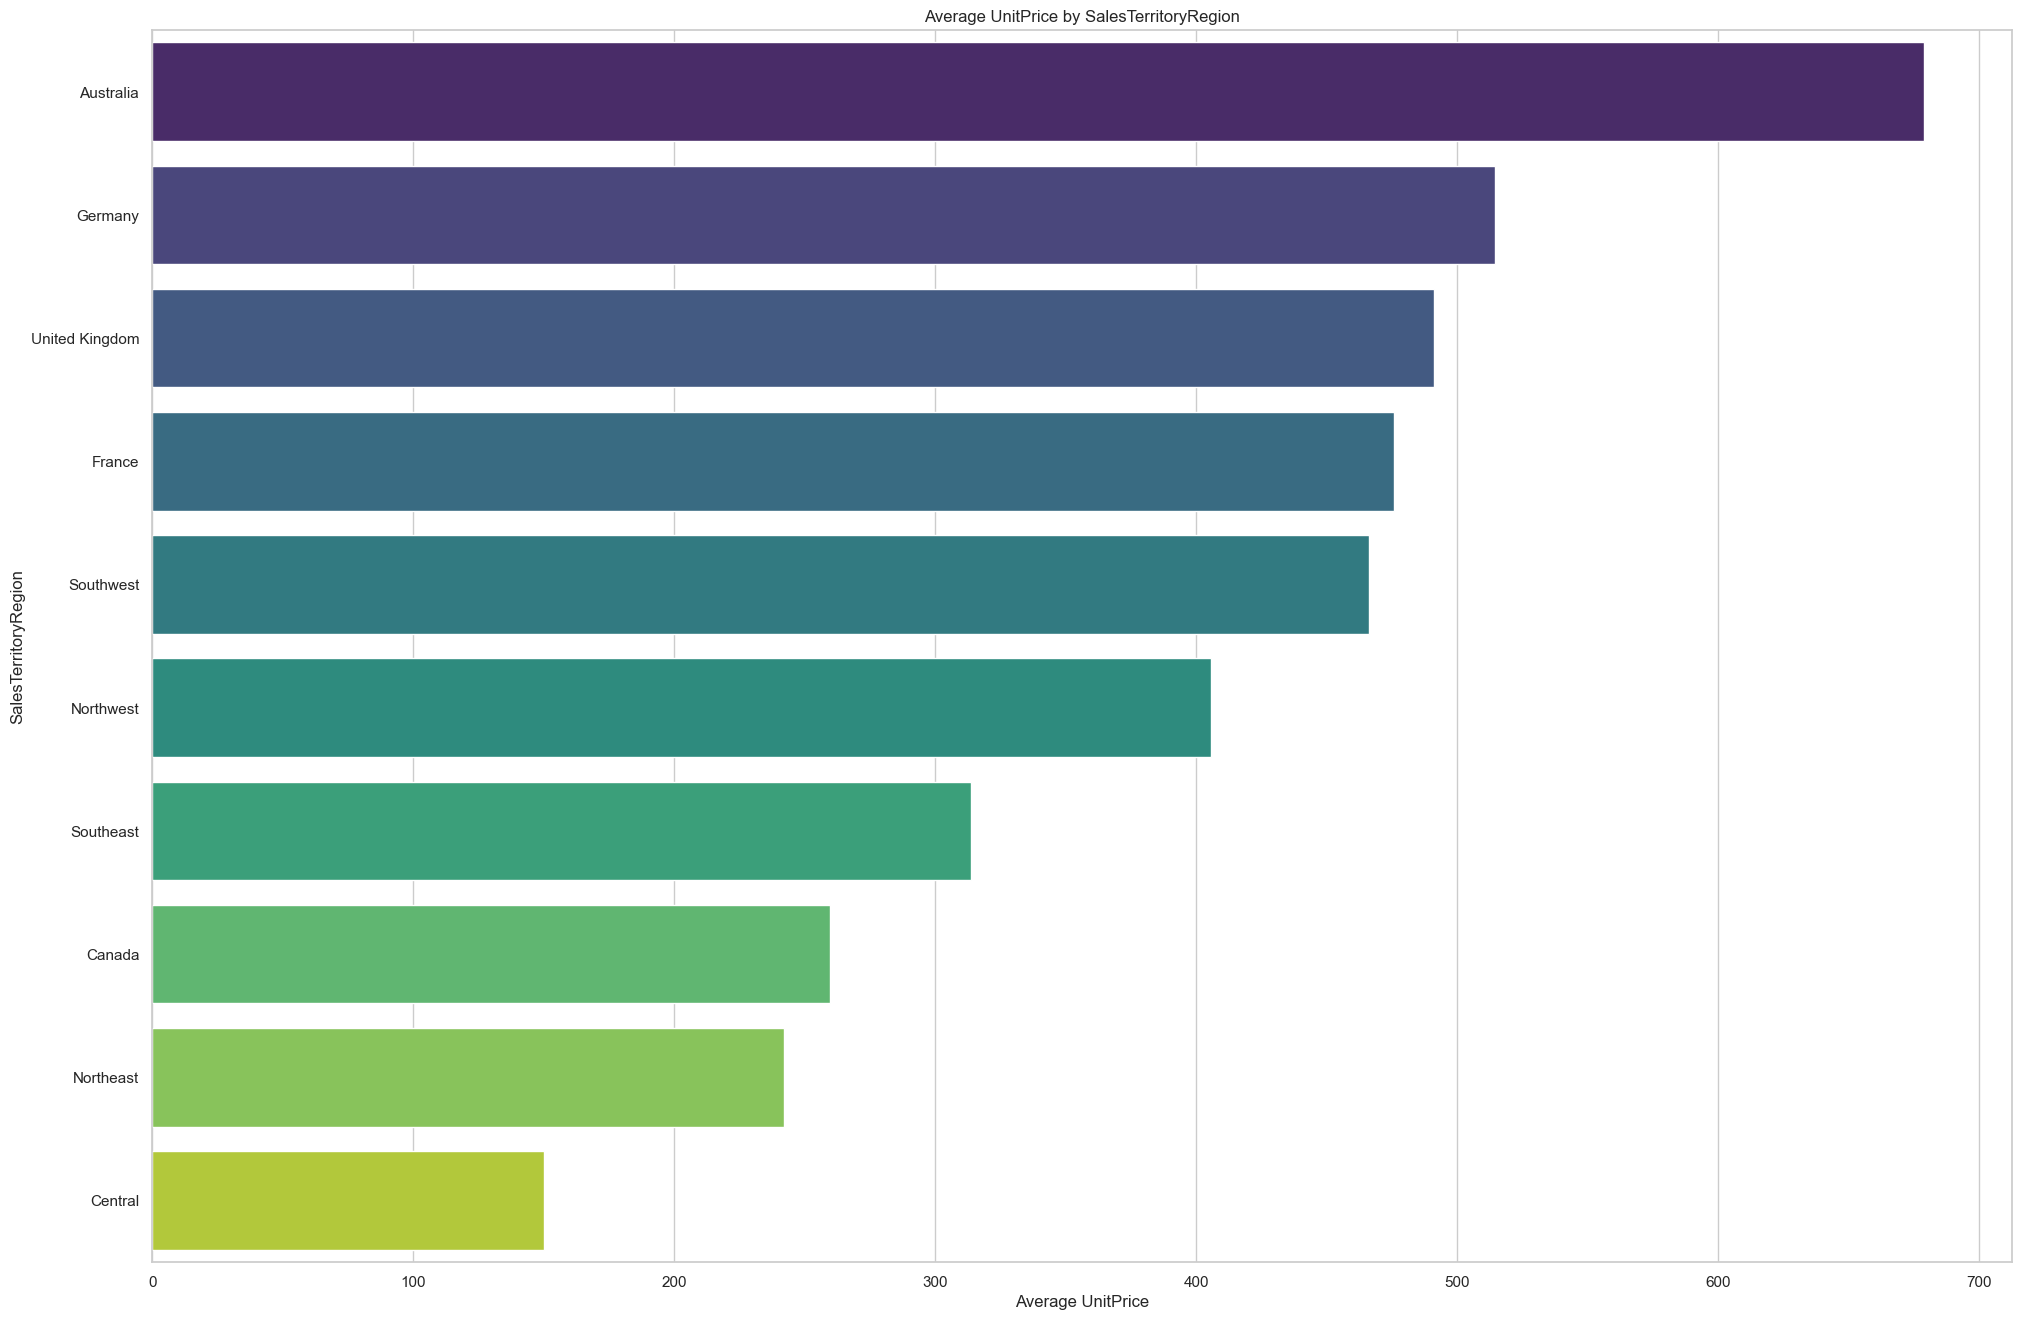

Table for SalesTerritoryCountry:
  SalesTerritoryCountry  AverageUnitPrice
4             Australia        678.980936
0               Germany        514.544416
5        United Kingdom        491.125429
1                France        475.713874
2         United States        439.926420
3                Canada        259.559693


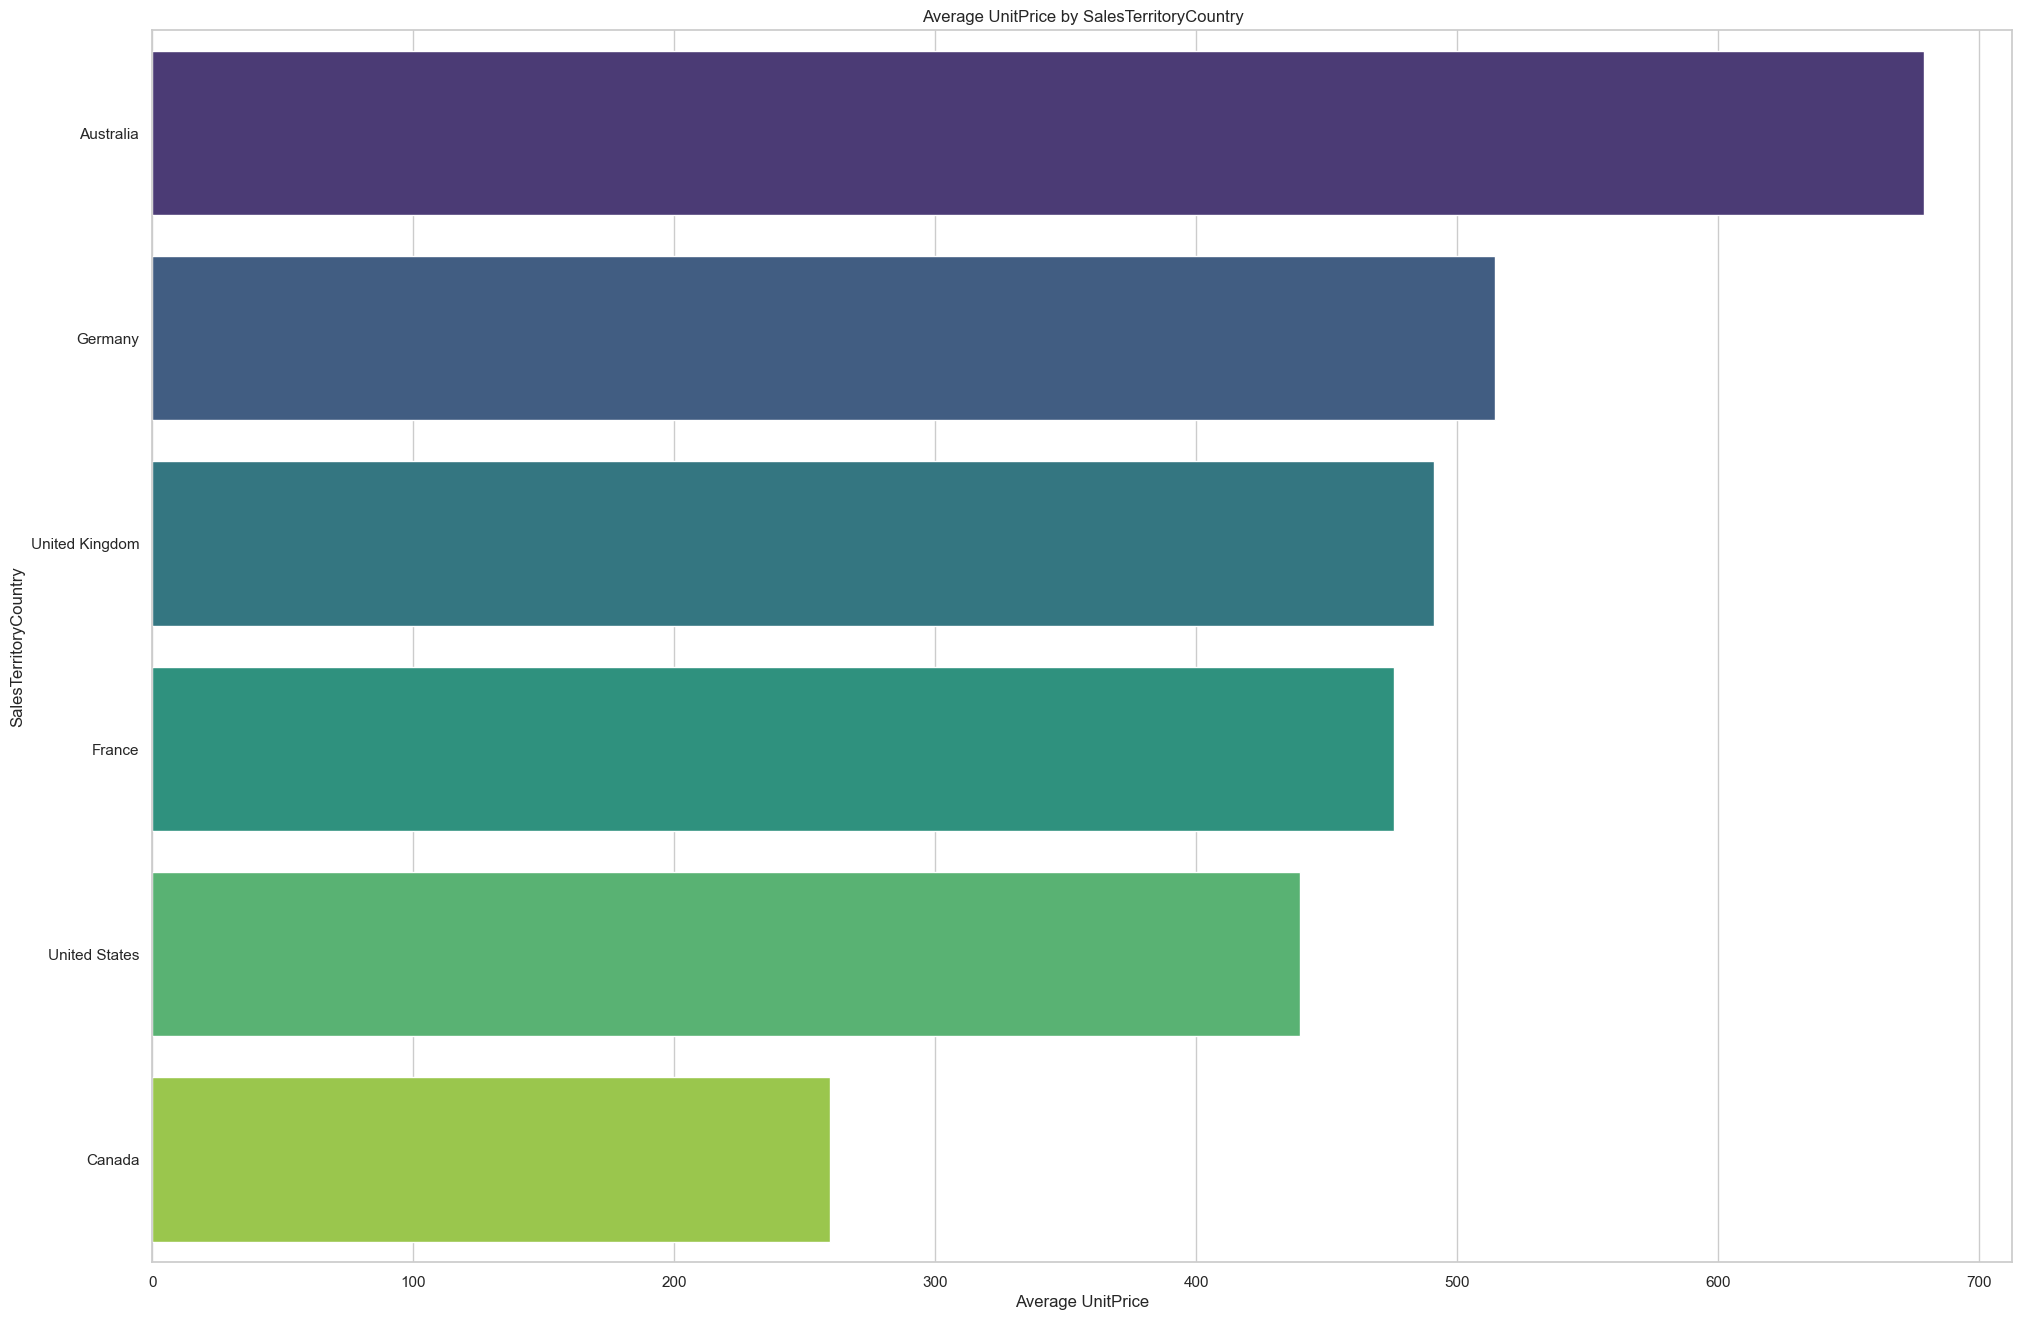

Table for SalesTerritoryGroup:
  SalesTerritoryGroup  AverageUnitPrice
2             Pacific        678.980936
0              Europe        493.672523
1       North America        392.474602


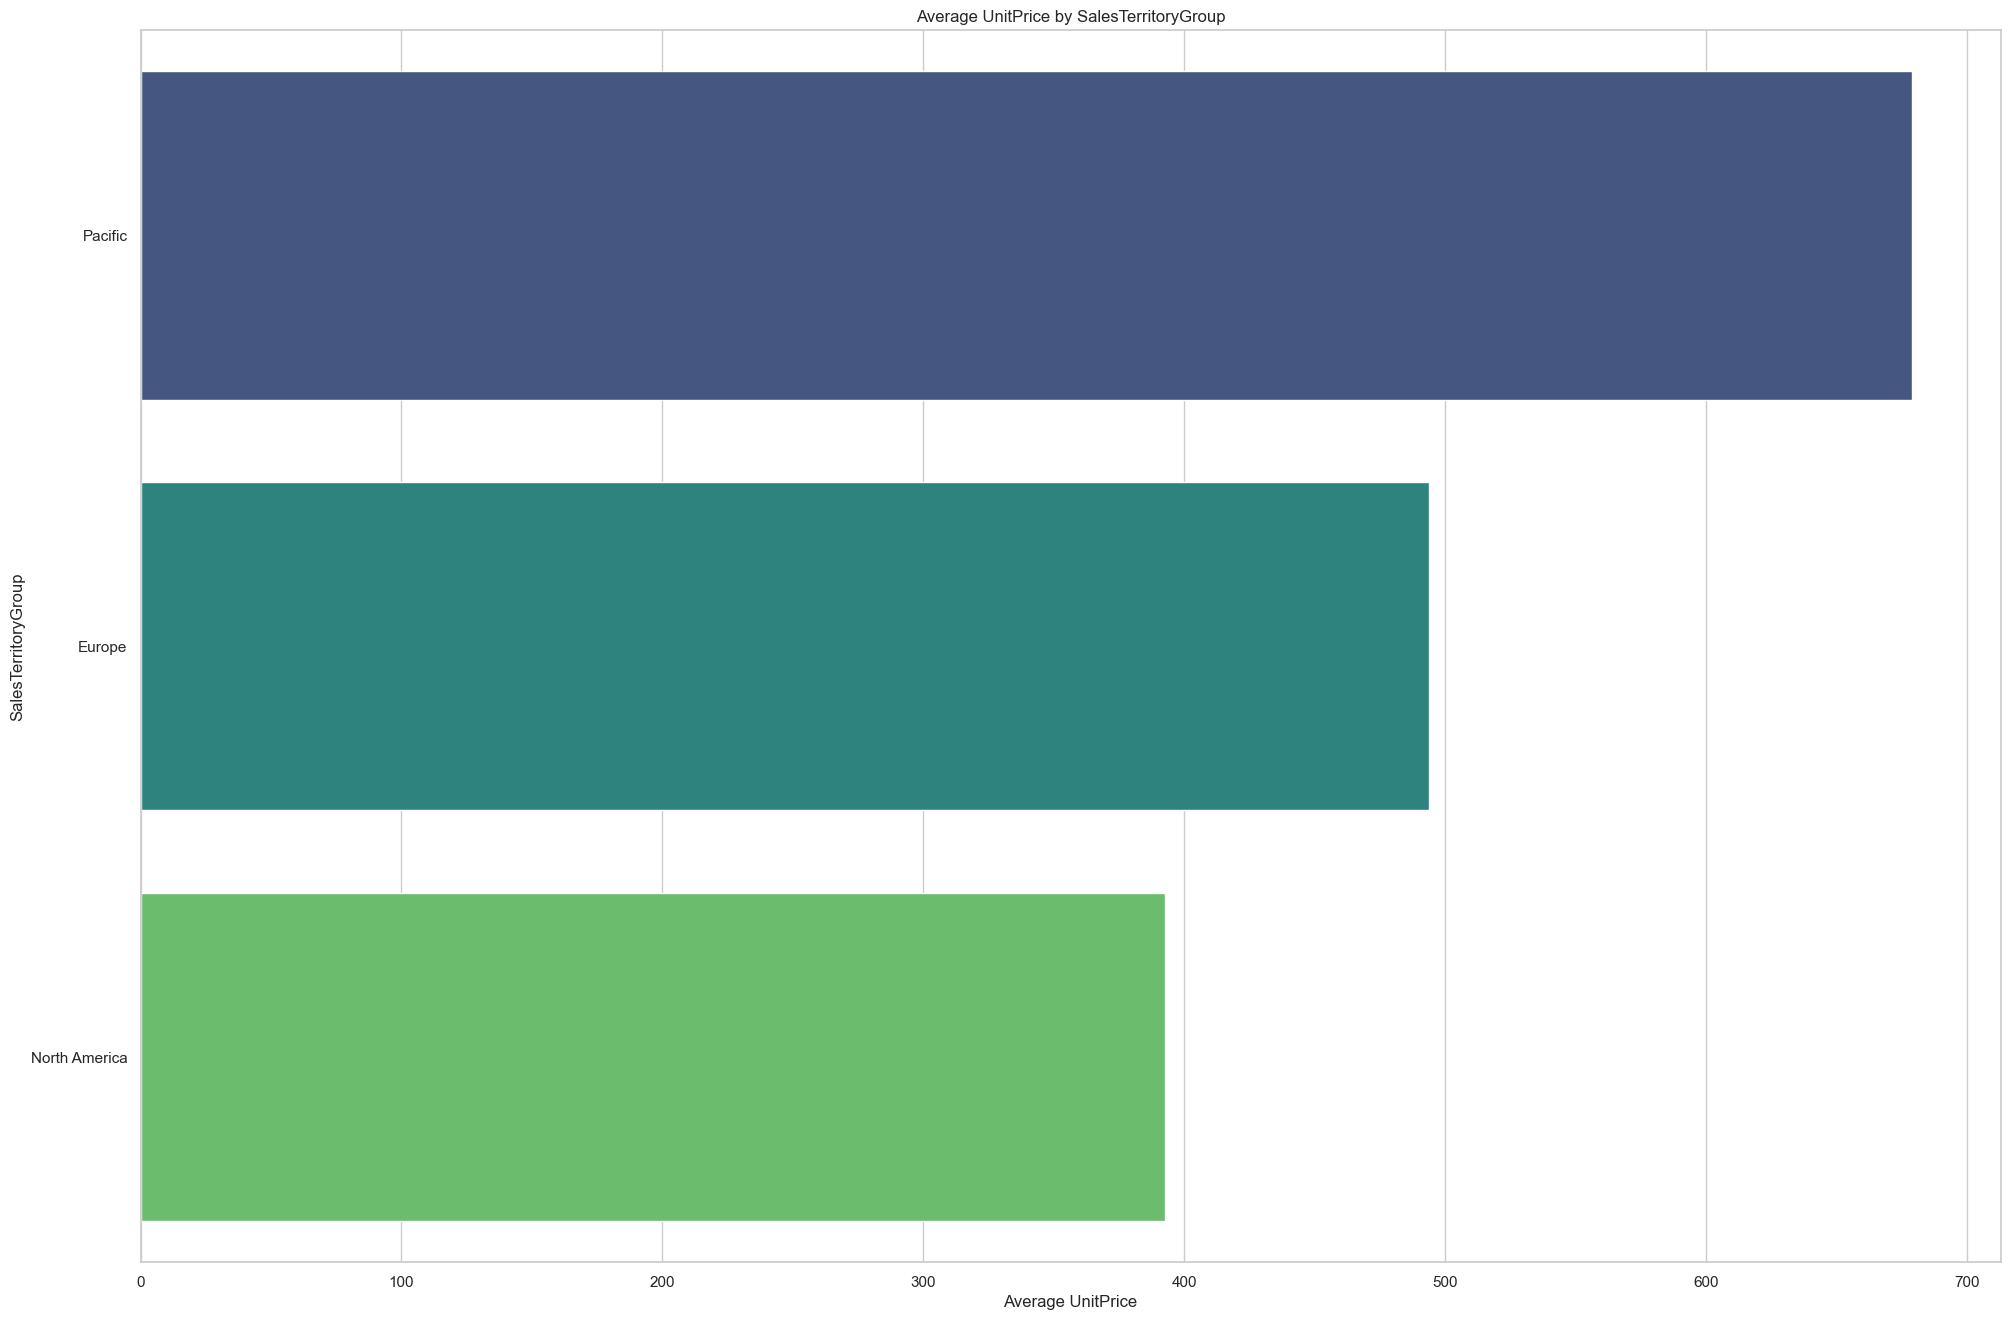

Table for StateProvinceName:
      StateProvinceName  AverageUnitPrice
35        Massachusetts       2049.098200
33              Arizona       1052.009800
30              Wyoming       1016.430000
0                  Utah        736.596667
6       South Australia        713.097880
38              Florida        705.537236
40           Queensland        684.951784
7              Victoria        681.994036
12              Alberta        680.842500
14      New South Wales        673.828691
37             Tasmania        610.529016
5           Brandenburg        579.192085
44              Yveline        555.092553
18       Seine et Marne        554.218376
31              Essonne        553.063730
9                Bayern        548.651279
25               Hessen        547.192807
42             Saarland        519.659948
17              Hamburg        517.414548
48      Garonne (Haute)        515.487955
39              England        491.125429
20              Moselle        479.827702
11   

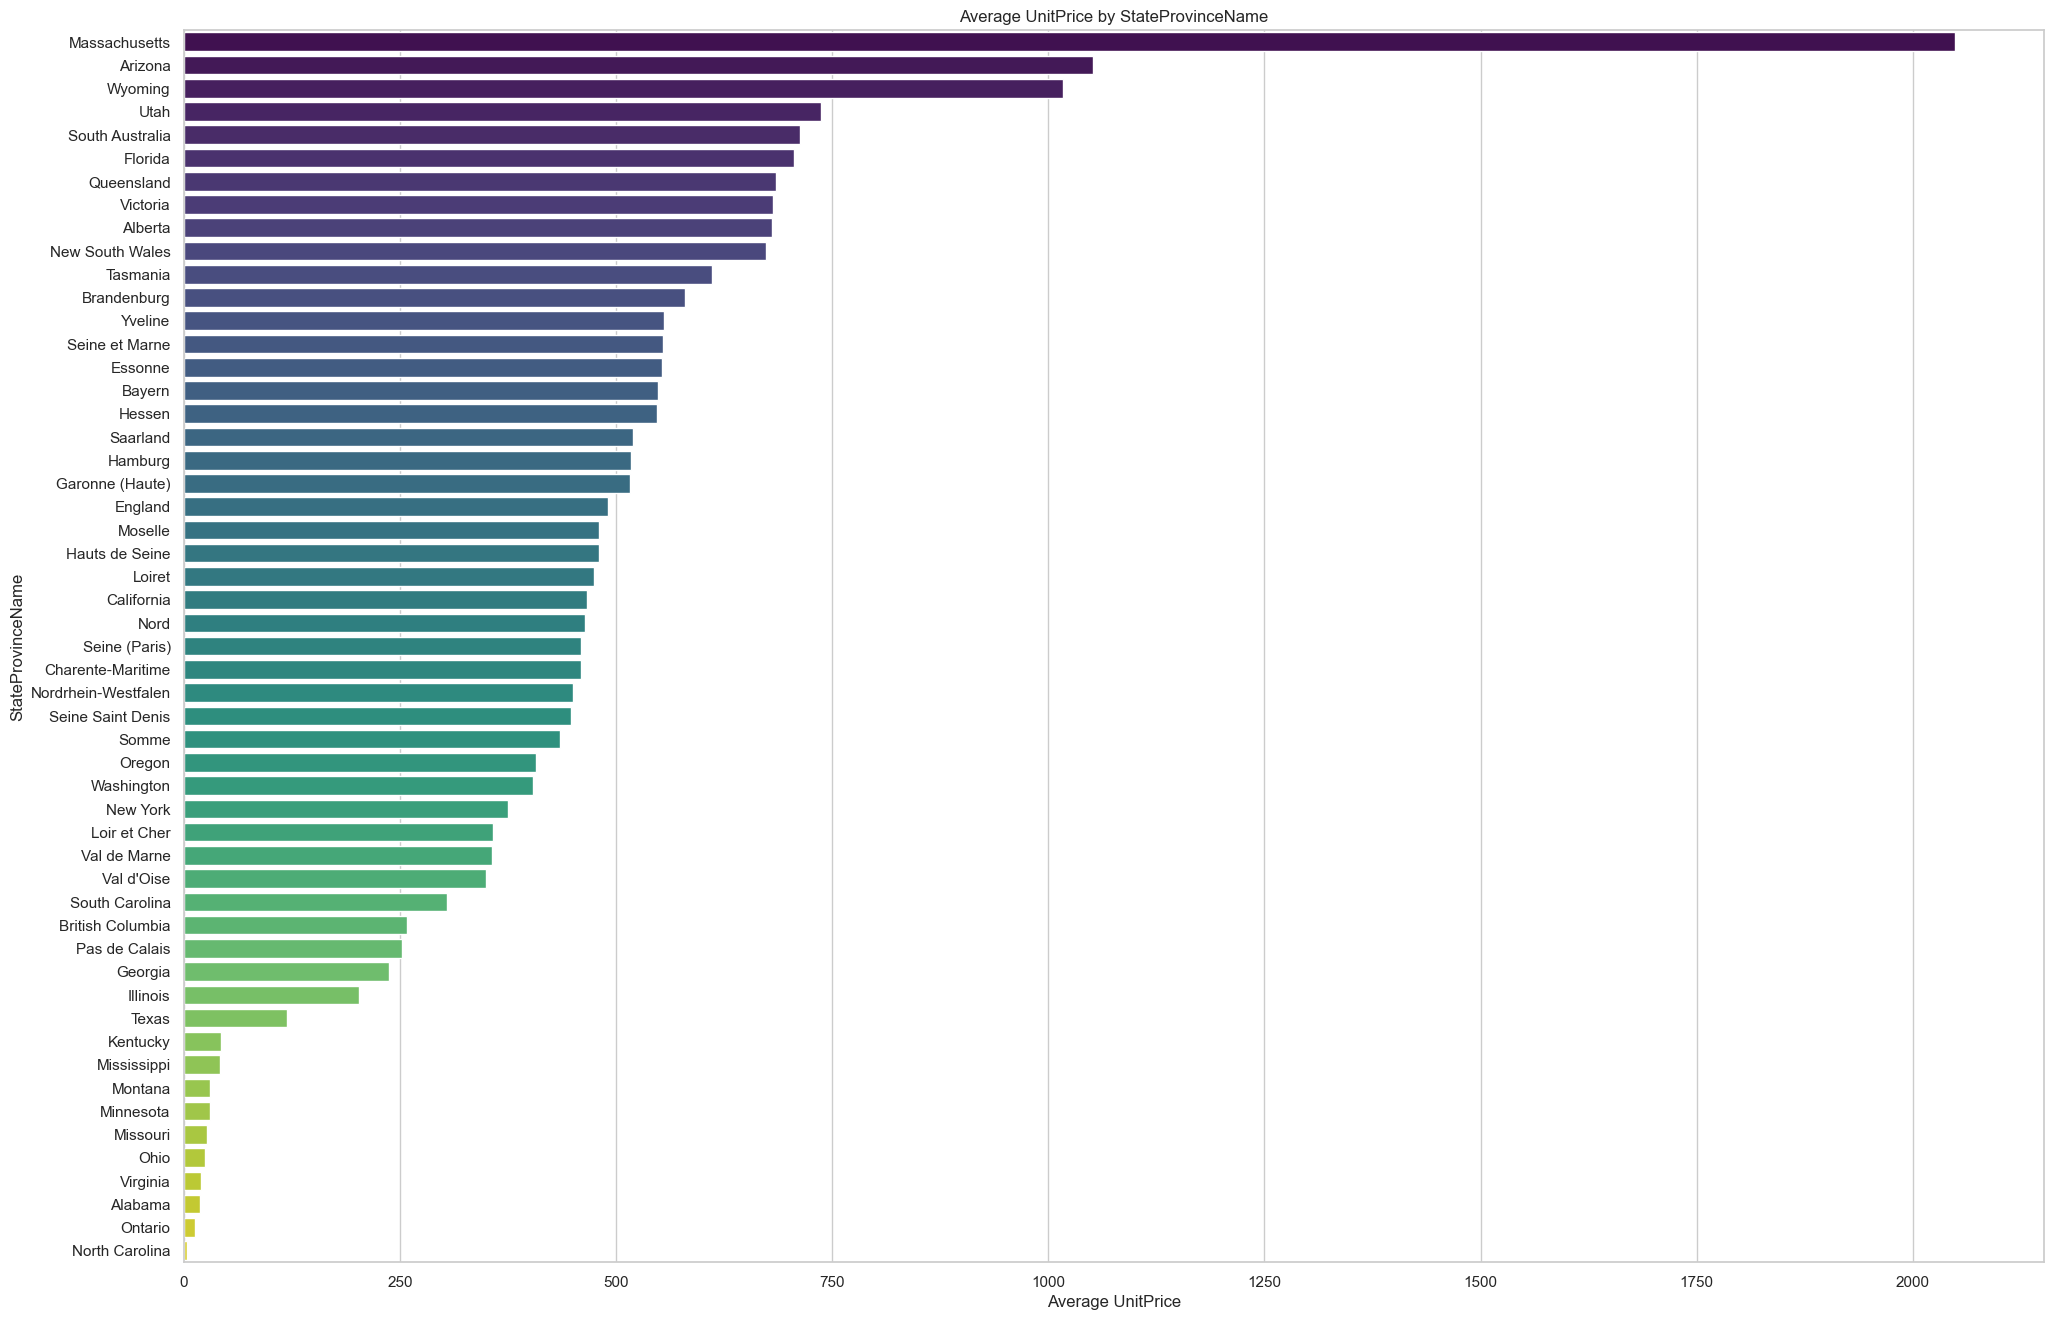

Table for EnglishCountryRegionName:
  EnglishCountryRegionName  AverageUnitPrice
4                Australia        678.980936
0                  Germany        514.544416
5           United Kingdom        491.125429
1                   France        475.713874
2            United States        439.926420
3                   Canada        259.559693


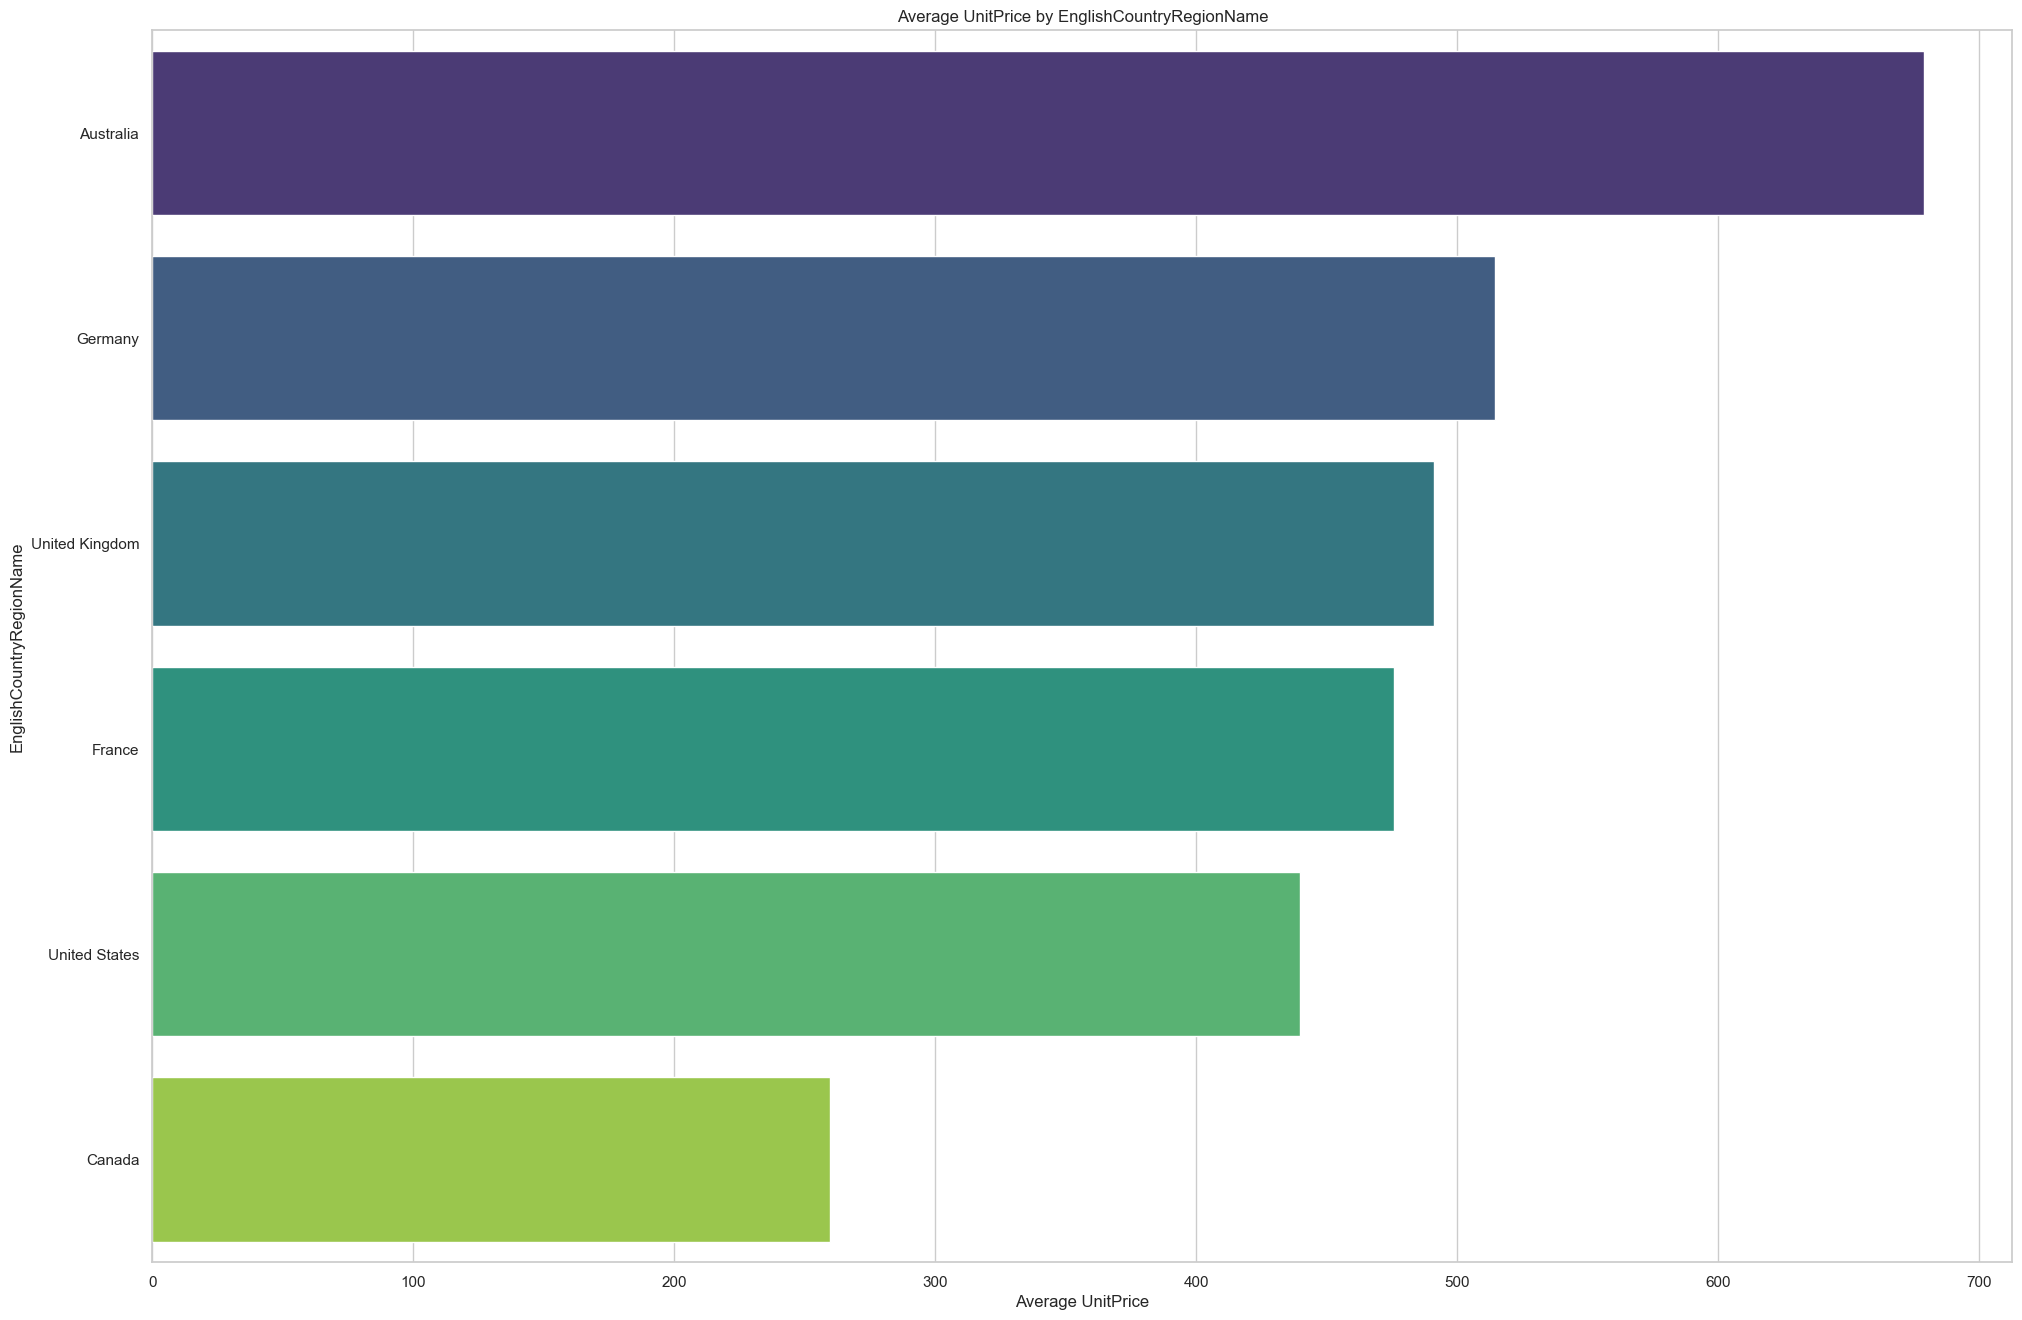

Table for City:
               City  AverageUnitPrice
55          Barstow       3578.270000
161       Braintree       2049.098200
192        Bellevue       2049.098200
60     Bell Gardens       1973.413333
65         Cheyenne       1966.850000
..              ...               ...
262  Central Valley         10.188000
257           Byron          4.990000
264        Chehalis          4.990000
129    Carol Stream          3.640000
237       Charlotte          3.640000

[269 rows x 2 columns]


C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


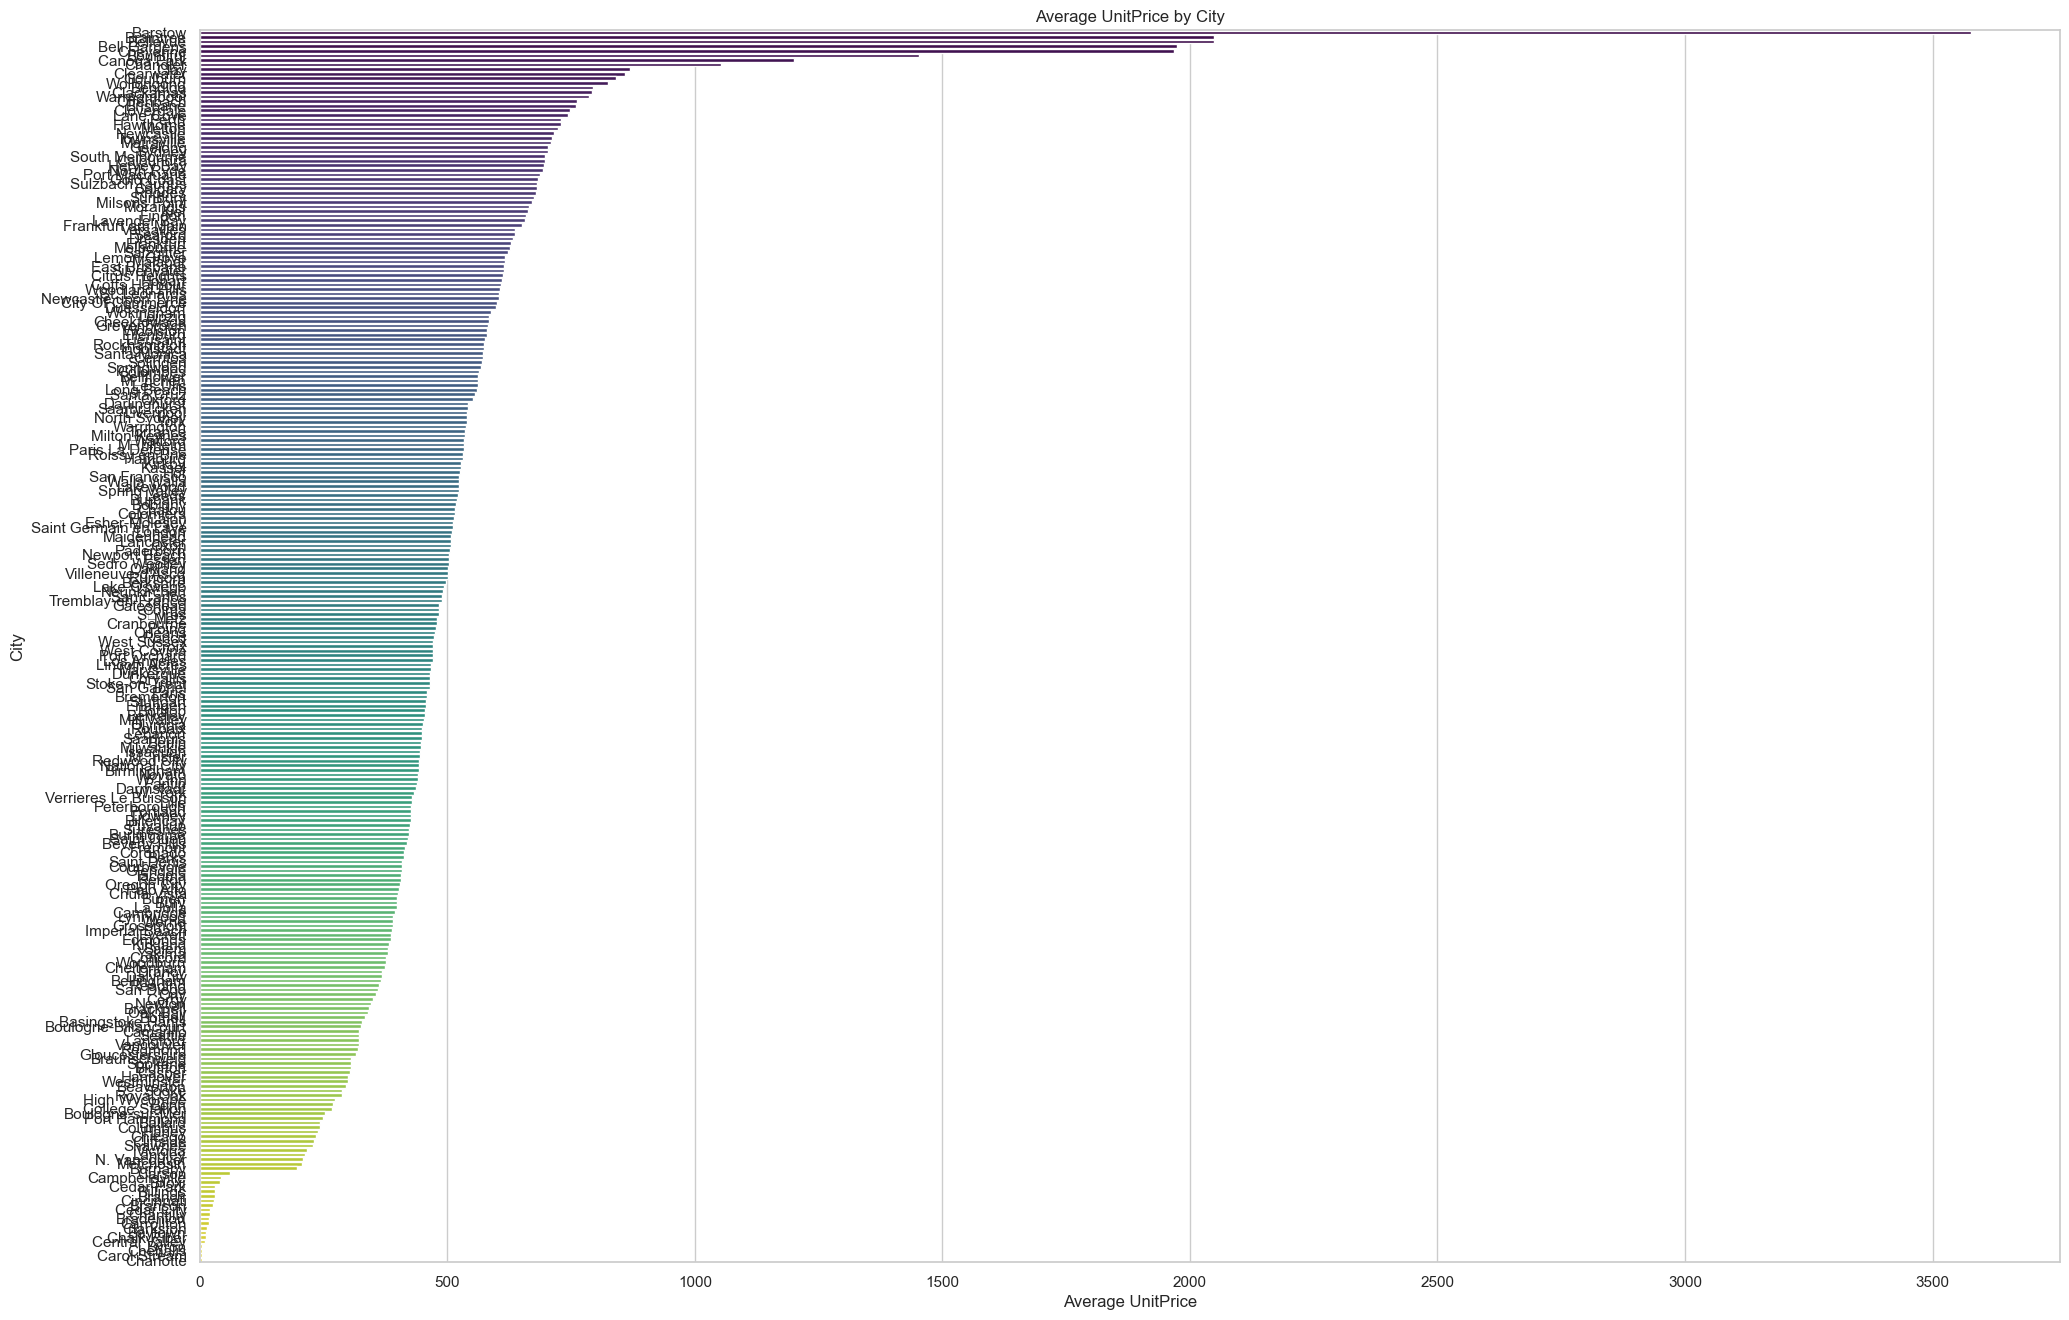

Table for OrderYear:
   OrderYear  AverageUnitPrice
3       2011       3192.926863
2       2010       3101.502600
1       2012       1719.895553
0       2013        309.682588
4       2014         23.195289


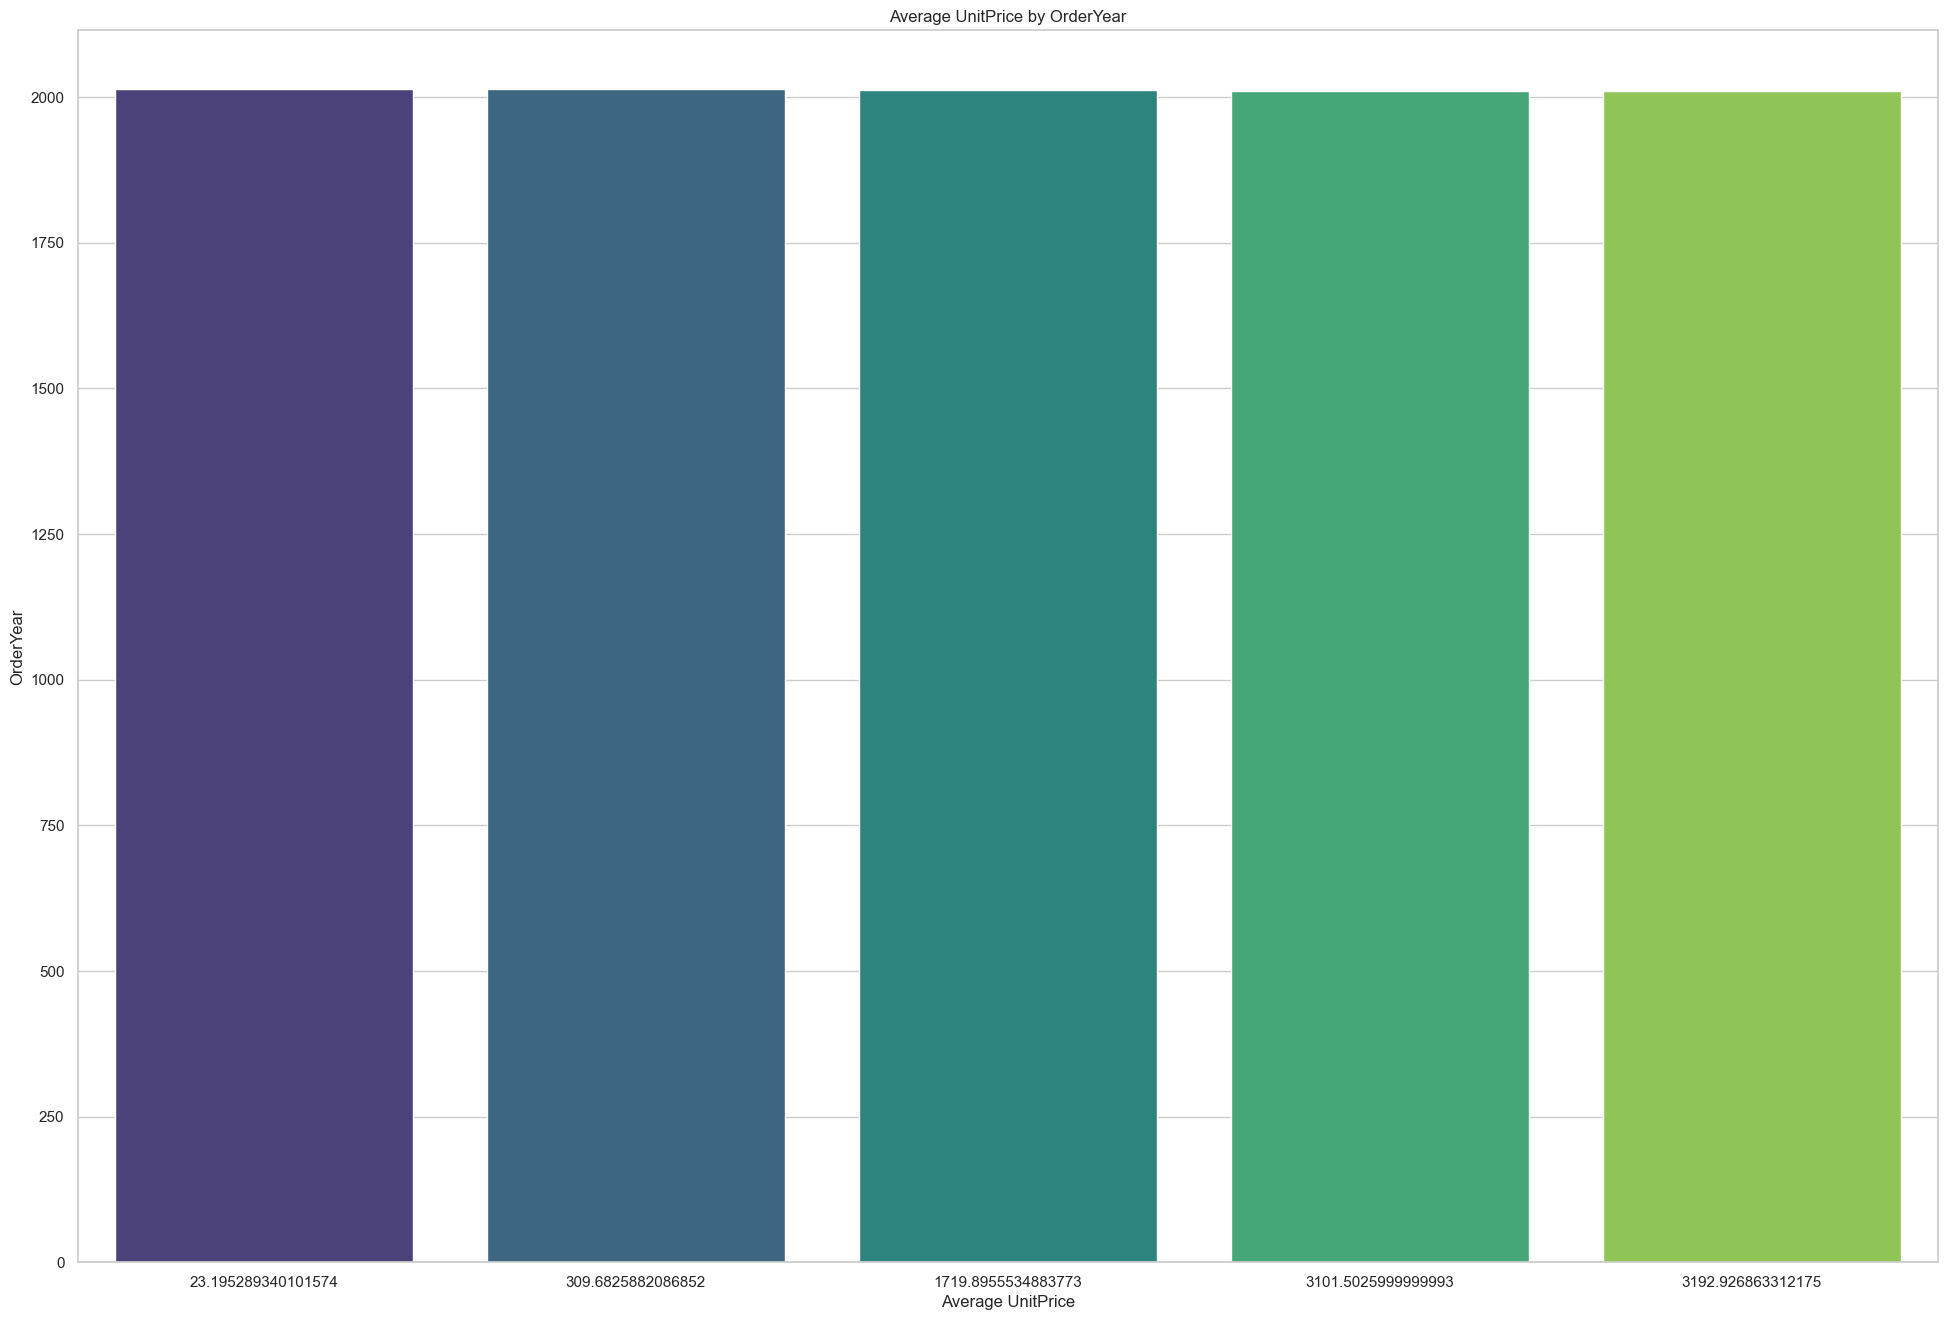

Table for OrderMonth:
    OrderMonth  AverageUnitPrice
2            6        526.857661
10          11        517.620116
0           12        514.780413
7            8        502.530059
5            9        500.346477
9           10        499.941875
8            7        472.670048
1            1        463.895896
4            5        461.328932
11           2        452.340635
6            4        447.401201
3            3        428.992820


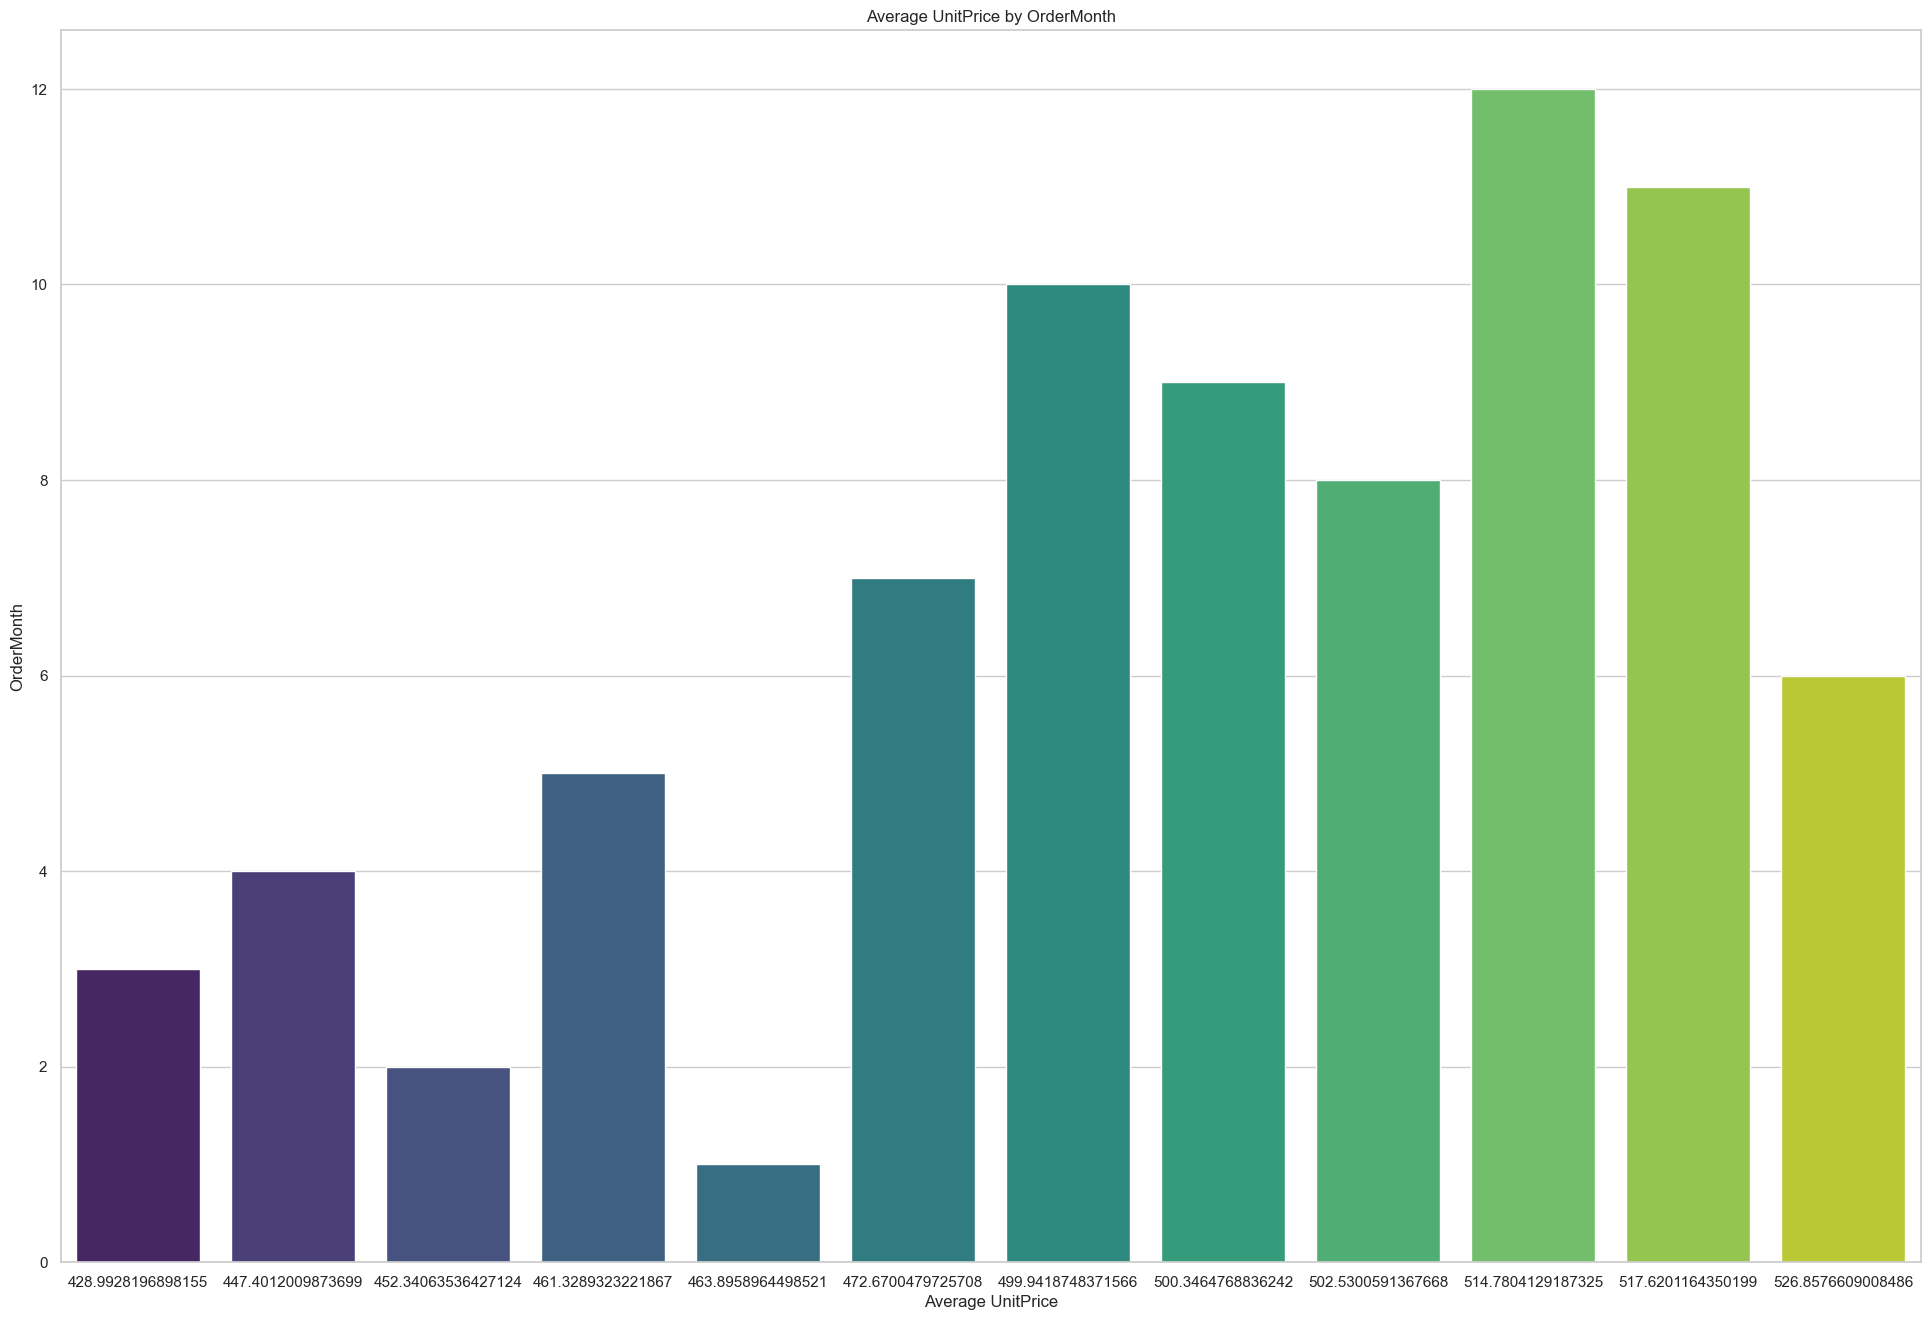

Table for DayOfWeek:
   DayOfWeek  AverageUnitPrice
4          4        492.911072
1          6        488.369343
5          7        486.585092
3          5        485.955507
2          3        485.269195
6          2        485.041891
0          1        478.565451


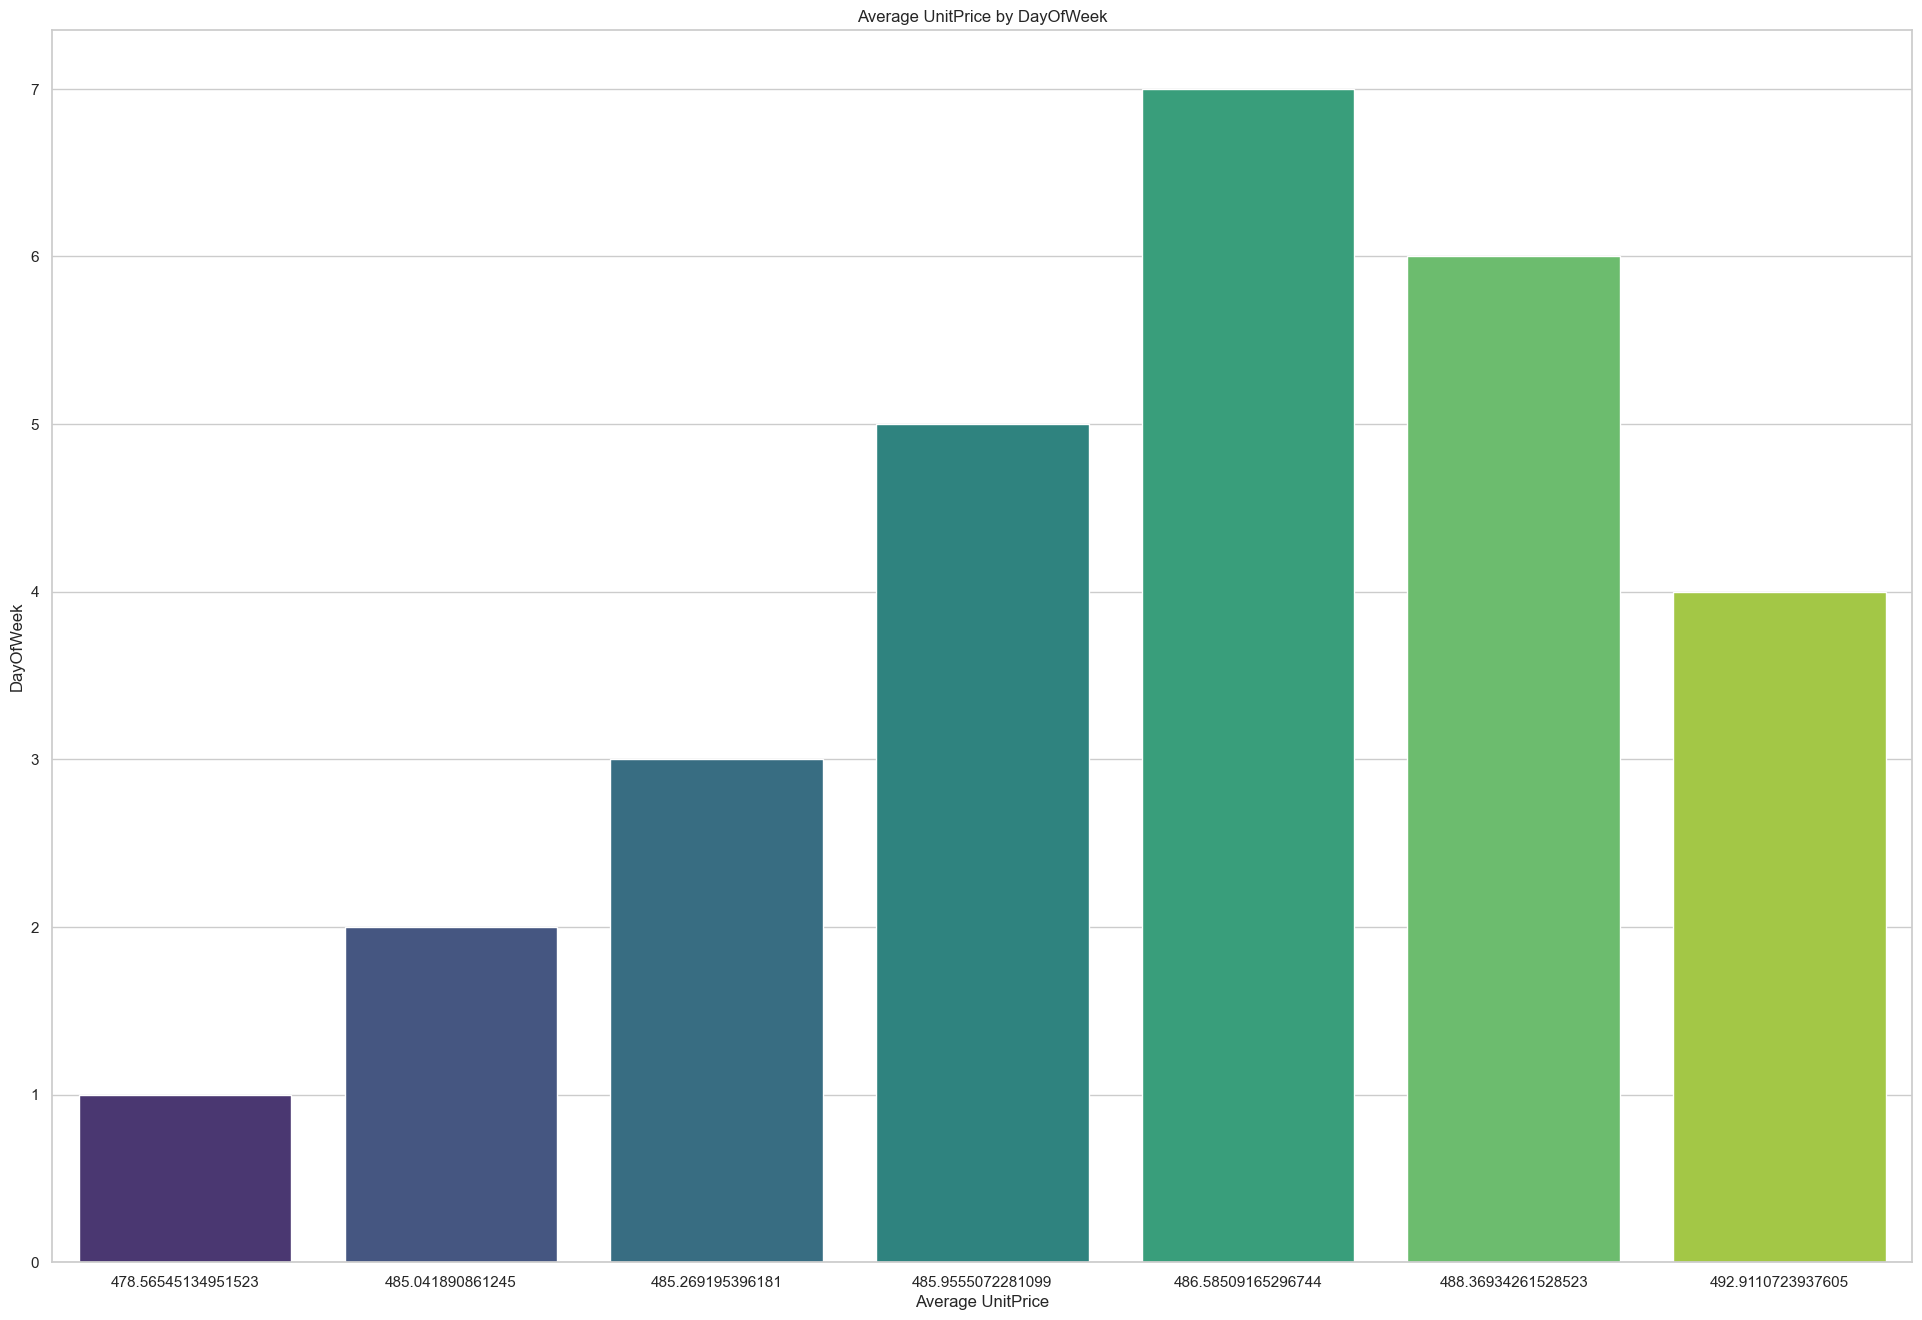

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg



# Columns to plot against the average UnitPrice
columns_to_plot = [
    'EnglishProductName', 'MaritalStatus', 'Gender', 'TotalChildren', 'NumberChildrenAtHome',
    'CommuteDistance', 'EnglishEducation', 'HouseOwnerFlag', 'NumberCarsOwned',
    'EnglishPromotionName', 'CurrencyName', 'SalesTerritoryRegion', 'SalesTerritoryCountry',
    'SalesTerritoryGroup', 'StateProvinceName', 'EnglishCountryRegionName', 'City',
    'OrderYear', 'OrderMonth', 'DayOfWeek'
]

for column_to_plot in columns_to_plot:
    # Calculate the average UnitPrice for each unique value in the column
    average_price_by_column = joined_df.groupBy(column_to_plot).agg(avg("UnitPrice").alias("AverageUnitPrice"))

    # Convert PySpark DataFrame to Pandas DataFrame
    average_price_by_column_pd = average_price_by_column.toPandas()

    # Sort the Pandas DataFrame by AverageUnitPrice in descending order
    average_price_by_column_pd = average_price_by_column_pd.sort_values(by='AverageUnitPrice', ascending=False)

    # Print the table for each plot
    print(f"Table for {column_to_plot}:")
    print(average_price_by_column_pd)

    # Set the style of seaborn for better visualization
    sns.set(style="whitegrid")

    # Create a bar plot
    plt.figure(figsize=(24, 16))
    sns.barplot(x='AverageUnitPrice', y=column_to_plot, data=average_price_by_column_pd, palette='viridis')
    plt.title(f'Average UnitPrice by {column_to_plot}')
    plt.xlabel('Average UnitPrice')
    plt.ylabel(column_to_plot)
    plt.show()


# model 

##  LOGISTICS REGRESSION

### OBJECTIVES 

The main objective of my logistic regression model is to predict the probability that a given observation belongs to a particular category or class. In this case, I'm using the "Gender_index" as the target variable, and my goal is to predict the probability of each observation being classified as a specific gender.

To achieve this, I start by indexing the "Gender_index" column to convert categorical gender labels into numerical values. This step is necessary as logistic regression typically requires numerical input.

Next, I assemble the feature columns, excluding "Gender_index," into a vector. This vector serves as the input for my logistic regression model.

I then train the logistic regression model using the assembled features and the indexed gender labels. The model learns to predict the probability of an observation belonging to a particular gender.

To streamline the entire process, I've encapsulated it in a pipeline, which includes string indexing, vector assembling, and model training. This makes the workflow more manageable and reproducible.

To evaluate the performance of my model, I use the Area Under the ROC Curve (AUC-ROC), a common metric for binary classification models. This metric assesses the trade-off between the true positive rate and false positive rate, providing insights into the model's effectiveness.

In summary, my logistic regression model aims to provide a probabilistic prediction of gender based on the input features, facilitating the binary classification of observations into specific gender categories.


1. **Area Under ROC Curve (AUC):**
   - **Value:** 0.5434
   - **Explanation:** The AUC is a metric that quantifies the ability of a binary classification model to distinguish between the positive and negative classes. A value of 0.5 suggests no discrimination (random guessing), and a value of 1.0 indicates perfect discrimination. Your AUC of 0.5434 suggests a model that has some ability to discriminate, but the performance may not be very strong.

2. **Coefficients:**
   - **Values:** An array of numerical coefficients for each feature.
   - **Explanation:** These coefficients represent the weights assigned to each feature by the logistic regression model. Positive coefficients indicate a positive correlation with the log-odds of the positive class, while negative coefficients indicate a negative correlation. Features with larger absolute values have a stronger impact on the prediction.

3. **Intercept:**
   - **Value:** -50.96727297970031
   - **Explanation:** The intercept represents the log-odds of the positive class when all features are zero. In logistic regression, the logistic function is applied to the linear combination of features and coefficients, and the intercept is added. The result is transformed into probabilities.

In summary, your model has been trained to predict the target variable `Gender_index`. The AUC suggests modest discriminative ability, and the coefficients provide insights into how each feature contributes to the prediction. If you have specific questions about certain coefficients or features, feel free to ask!

In [13]:
from pyspark.sql import SparkSession
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame
df_pandas = joined_df_transformed.toPandas()

# Specify the path where you want to save the Excel file
excel_output_path = "joined_df_transformed.xlsx"

# Save the Pandas DataFrame to Excel
df_pandas.to_excel(excel_output_path, index=False, header=True)


In [14]:
import pandas as pd

# Specify the path where the Excel file is located
excel_input_path = "joined_df_transformed.xlsx"

# Read the Excel file into a Pandas DataFrame
df_pandas = pd.read_excel(excel_input_path)

# Now, you can use df_pandas as a regular Pandas DataFrame
print(df_pandas.head())


   UnitPrice  ExtendedAmount  UnitPriceDiscountPct  DiscountAmount  \
0  3578.2700       3578.2700                     0               0   
1  3399.9900       3399.9900                     0               0   
2  3399.9900       3399.9900                     0               0   
3   699.0982        699.0982                     0               0   
4  3399.9900       3399.9900                     0               0   

   ProductStandardCost  TotalProductCost  SalesAmount    TaxAmt  Freight  \
0            2171.2942         2171.2942    3578.2700  286.2616  89.4568   
1            1912.1544         1912.1544    3399.9900  271.9992  84.9998   
2            1912.1544         1912.1544    3399.9900  271.9992  84.9998   
3             413.1463          413.1463     699.0982   55.9279  17.4775   
4            1912.1544         1912.1544    3399.9900  271.9992  84.9998   

   TotalChildren  ...  CommuteDistance_index  EnglishEducation_index  \
0              5  ...                      4      

# confuion matrix explaination

## Logistics prediction model 
The logistic regression model's performance is evaluated through key metrics, primarily accuracy and the confusion matrix. The accuracy of the model is approximately 49.93%, indicating that roughly half of the predictions on the test set were correct. The confusion matrix provides a more detailed breakdown. On the positive side, the model successfully identified 2603 instances (True Positives), and on the negative side, it correctly identified 3429 instances (True Negatives). However, there were misclassifications: 2594 instances were incorrectly labeled as positive (False Positives), and 3454 instances were incorrectly labeled as negative (False Negatives). These metrics offer a comprehensive view of the model's performance, highlighting its strengths and areas for improvement. It's essential to interpret these results in the context of the specific application and the consequences of false positives and false negatives in your particular use case.

C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['BirthYear' 'BirthMonth' 'BirthDayOfWeek' 'Age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['BirthYear' 'BirthMonth' 'BirthDayOfWeek' 'Age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Accuracy: 49.93%
Confusion Matrix:
[[3429 2594]
 [3454 2603]]
Accuracy: 49.93%
Confusion Matrix:
[[3429 2594]
 [3454 2603]]


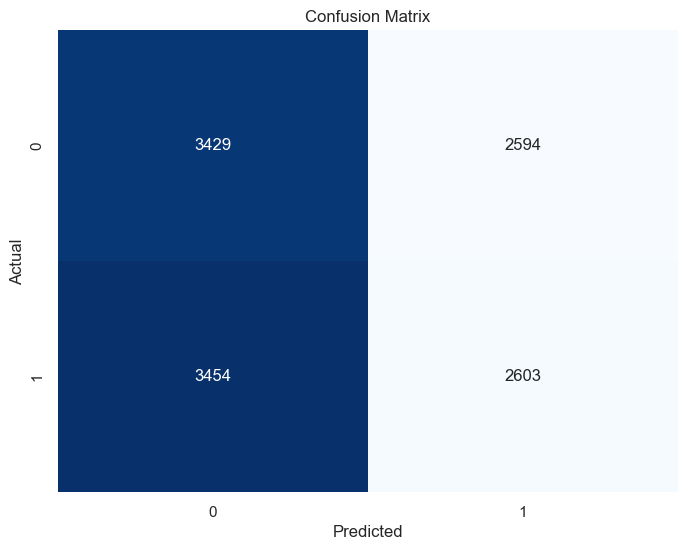

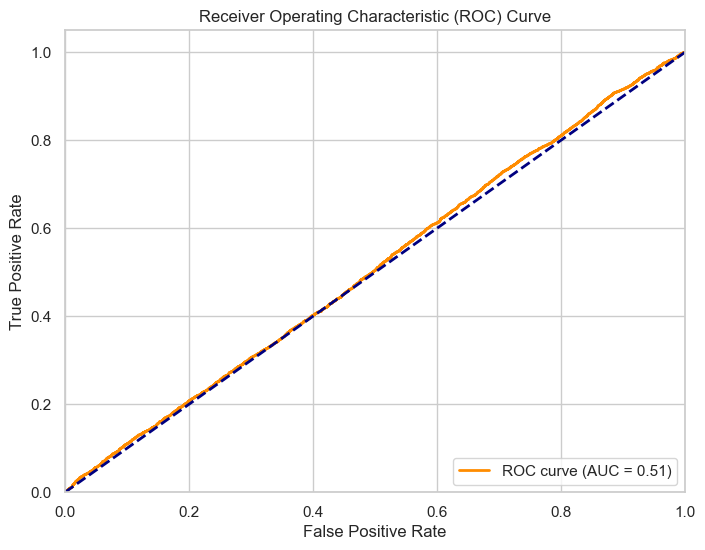

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Replace 'Gender_index' with your target column and other_cols with your feature columns
target_col = 'Gender_index'
feature_cols = [col for col in df_pandas.columns if col != target_col]

# Split the data into features (X) and target variable (y)
X = df_pandas[feature_cols]
y = df_pandas[target_col]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_imputed, Y_train)

# Make predictions on the test set
predictions = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)

# Display results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:")
print(conf_matrix)

import matplotlib.pyplot as plt
import seaborn as sns



# Display results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Make predictions on the test set probabilities
probabilities = model.predict_proba(X_test_imputed)[:, 1]

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## KNN

The main objective of the k-Nearest Neighbors (k-NN) model that I've implemented is to predict the 'Gender_index' variable based on the features present in the dataset. In this context, I used the 'joined_df_transformed' DataFrame, assuming it contains the necessary features and the target variable. The process involves setting up a pipeline that includes a StringIndexer (to handle non-numeric values in the 'Gender_index'), a VectorAssembler to bring together the feature columns, and the k-NN classifier for the actual prediction task.

After setting up the pipeline, the model is trained using the provided training data. Subsequently, predictions are generated for the testing data, allowing for an evaluation of the model's accuracy. The MulticlassClassificationEvaluator is employed to assess how well the k-NN model performs on unseen data, providing a quantitative measure of its predictive capabilities. This accuracy metric is crucial in determining the reliability and effectiveness of the k-NN model in classifying gender indices based on the given dataset features.


## model explaintion 


The k-Nearest Neighbors (k-NN) model has been evaluated with the provided testing data, and the results are summarized in the classification report and confusion matrix. The classification report displays various metrics such as precision, recall, and F1-score for each class (0.0 and 1.0) along with the overall accuracy. In this case, the model achieved an accuracy of approximately 52%, with balanced precision, recall, and F1-scores for both classes. The confusion matrix further details the number of true positive, true negative, false positive, and false negative instances, showing how well the model performed in classifying instances belonging to each class. The k-NN model's performance indicates a moderate level of effectiveness in predicting the 'Gender_index' variable based on the given features.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming 'df_pandas' is your DataFrame in Python
# Assuming 'Gender_index' is your target variable (Y) and the remaining columns are features (X)

# Separate features (X) and target variable (Y)
X = df_pandas.drop('Gender_index', axis=1)
Y = df_pandas['Gender_index']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 1: Impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_imputed, Y_train)

# Step 3: Make predictions on the test set
predictions = knn_classifier.predict(X_test_imputed)

# Step 4: Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['BirthYear' 'BirthMonth' 'BirthDayOfWeek' 'Age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['BirthYear' 'BirthMonth' 'BirthDayOfWeek' 'Age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Accuracy: 51.45%
Confusion Matrix:
[[3178 2845]
 [3020 3037]]


C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\neste\AppData\Local\Temp\ipykernel_9944\442758859.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pandas_cleaned['cluster'] = clusters


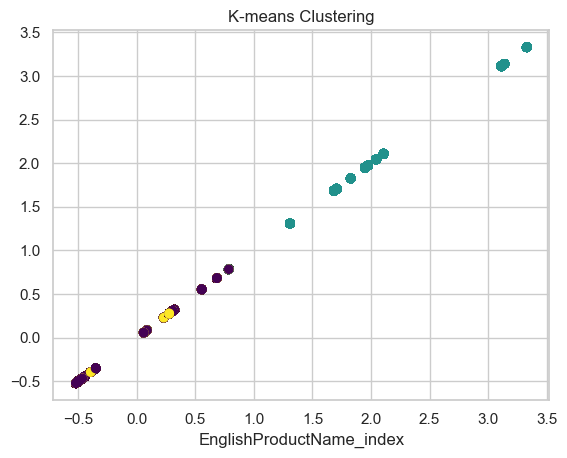

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'df_pandas' is your DataFrame in Python with numeric columns

# Step 1: Remove features with only missing values
df_pandas_cleaned = df_pandas.dropna(axis=1, how='all')

# Step 2: Impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_pandas_cleaned), columns=df_pandas_cleaned.columns)

# Step 3: Standardize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

# Step 4: Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose the number of clusters
clusters = kmeans.fit_predict(df_scaled)
df_pandas_cleaned['cluster'] = clusters

# Step 5: Plot the clusters
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=clusters, cmap='viridis')  # Replace with actual column indices
plt.title('K-means Clustering')
plt.xlabel('EnglishProductName_index')  # Replace with actual column name
plt.show()



# CONCLUSION 

Based on the evaluation results of the k-Nearest Neighbors (k-NN) model, it can be concluded that the model exhibits a moderate level of performance in predicting the 'Gender_index' variable. The overall accuracy of approximately 52% suggests that the model's ability to correctly classify instances is marginally better than random chance. However, the balanced precision, recall, and F1-scores for both classes (0.0 and 1.0) indicate that the model shows consistency in performance across different metrics.

The classification report and confusion matrix provide a detailed breakdown of the model's performance, showing that it is not biased toward any specific class. The model's ability to correctly identify instances belonging to both classes is reflected in the balanced nature of the evaluation metrics. While the model's performance is not exceptionally high, it still demonstrates a reasonable capability to make predictions based on the provided features.

It's important to note that the effectiveness of the model may depend on the specific characteristics of the dataset and the features used for prediction. Further refinement, feature engineering, or consideration of alternative modeling approaches could be explored to potentially enhance the predictive performance.

# 

# MODEL EXPLAINATIONS

## LOGISTICS REGRESISON


The logistic regression model has been trained on the provided dataset, and the output includes several important components that help us understand the relationships between the features and the target variable (label). I'll walk you through each part of the output.

**Area Under ROC Curve (AUC):**
The Area Under ROC Curve is a performance metric for binary classification models like logistic regression. It quantifies the model's ability to distinguish between the two classes (in this case, the predicted positive and negative instances). An AUC of 0.5352 suggests a moderate ability of the model to discriminate between the classes.

**Coefficients:**
The coefficients represent the weights assigned to each feature in the logistic regression model. These weights indicate the strength and direction of the relationship between each feature and the log-odds of the target variable being positive. Positive coefficients suggest a positive association with the target, while negative coefficients suggest a negative association.

- For instance, features like 'Age,' 'TotalProductCost,' 'SalesAmount,' and 'City_index' have positive coefficients. An increase in these features is associated with an increase in the log-odds of the positive class.

- On the other hand, features like 'ProductStandardCost,' 'DiscountAmount,' and 'MaritalStatus_index' have negative coefficients. An increase in these features is associated with a decrease in the log-odds of the positive class.

**Intercept:**
The intercept is the constant term in the logistic regression equation. It represents the log-odds of the positive class when all features are zero. In this case, the intercept is -78.4275. The magnitude of the intercept is not as interpretable as the coefficients, but it contributes to the baseline log-odds of the positive class.

In summary, the logistic regression output provides insights into how each feature contributes to the likelihood of an instance belonging to the positive class. Positive and negative coefficients indicate the direction of influence, and their magnitudes provide a sense of the strength of that influence. The AUC complements this information by assessing the overall discriminatory power of the model. It's important to note that interpretation should consider the specific context and domain knowledge.

## KNN MODEL

**Classification Report:**

The classification report offers a comprehensive evaluation of the KNN model's performance across different metrics, including precision, recall, and F1-score, for each class (0.0 and 1.0). These metrics provide insights into the model's ability to correctly classify instances of each class.

In my analysis of the report, I notice that the precision, recall, and F1-score for both classes are approximately 0.52, indicating a balanced performance. Precision refers to the accuracy of positive predictions, recall represents the sensitivity or true positive rate, and the F1-score is the harmonic mean of precision and recall. The values being similar suggest that the model is maintaining a consistent trade-off between precision and recall for both classes.

The overall accuracy of the model is reported as 0.52, indicating that it correctly predicts the class of instances 52% of the time. While accuracy is an important metric, it might not be sufficient in the context of imbalanced datasets.

**Confusion Matrix:**

The confusion matrix provides a more detailed breakdown of the model's predictions. In my examination of the matrix, I observe that for class 0.0, there are 3151 true positives and 2905 true negatives, while for class 1.0, there are 3114 true positives and 2910 true negatives.

It's noteworthy that the confusion matrix reveals the number of instances the model misclassifies, with 2905 instances of class 0.0 being predicted as class 1.0 and 2910 instances of class 1.0 being predicted as class 0.0. This information is crucial for understanding the model's specific errors.

In conclusion, the KNN model, as evaluated by the classification report and confusion matrix, demonstrates a balanced performance across both classes. However, further investigation into potential improvements and considerations for the specific context of the data may be warranted to enhance its predictive capabilities.

